# Omdena Liverpool Chapter - Predicting RTC Severity

## Table of Contents
- [Project Overview](#project-overview)
- [Predicting RTC Severity - EDA](#predicting-rtc-severity---eda)
- [Features](#features---accident_dataparquet)
  - [Junction Map](#map-showing-how-to-code-the-roads-at-a-roundabout-and-slip-roads)
- [Project Dependencies](#import-dependencies)
- [Importing and Loading the Dataset](#importing-and-loading-data-into-dataframe)
  - [Data Shape](#data-shape)
  - [Data Types](#data-types)
- [Data Cleaning](#data-cleaning)
  - [Missing Values](#missing-values)
  - [Dropping Columns](#dropping-columns)
  - [1st and 2nd Road Classes](#1st_road_class)
  - [Duplicates](#duplicates)
    - [Data Types and Formatting](#data-types-and-formatting)
- [Average Counts](#average-counts)
- [Collision Severity Spread](#collision-severity-spread)
- [Features](#features)
  - [1st and 2nd Road Class](#feature-1st_road_class-and-2nd_road_class)
  - [Accident Severity](#feature---accident_severity)
  - [Date and Time](#features---date-and-time)
  - [Hour](#feature---hour)
  - [Day of Week](#feature---day_of_week)
  - [Day](#feature---day)
  - [Month](#feature---month)
  - [Season](#feature---season)
  - [Bank Holidays](#feature---bank_holidays)
  - [Junction Control](#feature---junction_control)
  - [Carriageway Hazards](#feature---carriageway_hazards)
  - [Special Conditions](#feature---special_conditions_at_site)
  - [Light Conditions](#feature---light_conditions)
  - [Pedestrian Control Human Control](#feature---pedestrian_crossing_human_control)
  - [Pedestrian Control Physical Facilities](#feature---pedestrian_crossing_physical_facilities)
  - [Road Surface Conditions](#feature---road_surface_conditions)
  - [Road Type](#feature---road_type)
  - [Special Conditions at Sight](#feature---special_conditions_at_site)
  - [Urban or Rural Area](#feature---urban_or_rural_area)
  - [Weather Conditions](#feature---weather_conditions)
  - [Number of Casualties](#feature---number_of_casualties)
  - [Number of Vehicles](#feature---number_of_vehicles)
  - [Speed Limit](#feature---speed_limit)
  - [Local Authority District](#features---local_authority_district)
  - [Police Force](#features---police_force)
  - [Latitude and Longitude](#features---latitude-and-longitude)
- [Conclusions](#conclusions)

## Project Overview
Over the last few years improvements to roads in the UK have been implemented across the country in order to create a safer roading system with some great effect.  
The number of RTC's (road traffic collisions) are reported to be in decline.  
  
However there still seems to be a rise in severe and fatal collisions.  
  
Using datasets from the Department of Transport, we hope to be able to uncover the probability of the severity of a collision.  
Using Data Science we will develop and deploy a machine learning model in an effort to predict RTC severity:
- Preprocessing
- Exploratory Data Analysis
- Feature Engineering
- Modeling
- Machine Learning
  
The project has been broken down into six pipelines:
1. Data Engineering
2. Group 1 Predicting RTC Severity
3. Group 2 Geospatial Heatmap
4. Group 3 Time Series Analysis
5. Group 4 Vehicle Analysis and Predictions
6. Solution Deployment
  
**Pipeline 1** prepares the datasets for groups 1 - 4  
  
**Pipelines 2 - 5** will run concurrently and have three tasks:
- EDA
- Feature Engineering
- Model Development and Evaluation
  
**Pipeline 6** will bring together the models and create the solution to be deployed.  
  
Each Pipeline will produce a Jupyter notebook, based on the findings of each of the team members notebooks, for their task.  
The task lead will then produce a combined notebook, being passed on to the next task until completion of all three tasks.  
The notebooks will be published on the Omdena Liverpool GitHub site.  
  
This is one of the **Pipeline 2, Group 1, Predicting RTC Severity EDA's** notebooks.

## Predicting RTC Severity - EDA

Group 1 is tasked with predicting the road traffic collision severity.  
We will be using a dataset from the Department of Transport, consisting of over a million rows and 34 columns.  
It has a date range from 2005 to 2010.  

## Features - accident_data.parquet
We have a reasonable set of features, lets take a look.

**Accident_Index**
- Unique number linking accident with vehicles and casualties.

**1st_Road_Class**
- Motorway
- A(M)
- A
- B
- C
- Unclassified

**1st_Road_Number**
- Number of road if applicable (not all roads have a number)

**2nd_Road_Class**
- None
- Motorway
- A(M)
- A
- B
- C
- Unclassified

**2nd_Road_Number**
- Number of road if applicable (not all roads have a number)

**Accident_Severity**
- Fatal
- Serious
- Slight

**Carriageway_Hazards**
- None
- Vehicle load on road
- Other object on road
- Previous accident
- Dog on road
- Other animal on road
- Pedestrian in carriageway - not injured
- Any animal in carriageway (except ridden horse)
- Data missing or out of range
- unknown (self reported)

**Date**
- Date of accident

**Day_of_Week**
- Day of accident - Monday to Sunday

**Did_Police_Officer_Attend_Scene_of_Accident**
- Yes
- No
- No - accident was reported using a self completion  form (self rep only)

**Junction_Control**
- Not at junction or within 20 metres
- Authorised person
- Auto traffic signal
- Stop sign
- Give way or uncontrolled
- Data missing or out of range
- unknown (self reported)

**Junction_Detail**
- Not at junction or within 20 metres
- Roundabout
- Mini-roundabout
- T or staggered junction
- Slip road
- Crossroads
- More than 4 arms (not roundabout)
- Private drive or entrance
- Other junction
- unknown (self reported)

**Latitude**
- Geographical information

**Light_Conditions**
- Daylight
- Darkness - lights lit
- Darkness - lights unlit
- Darkness - no lighting
- Darkness - lighting unknown
- Data missing or out of range

**Local_Authority_(District)**
- Geographical list of Districts

**Local_Authority_(Highway)**
- Geographical list of Local Highway Authorities

**Location_Easting_OSGR**
- Geographical information

**Location_Northing_OSGR**
- Geographical information

**Longitude**
- Geographical information

**LSOA_of_Accident_Location**
- Statistical location for Local Government

**Number_of_Casualties**
- Number or persons injured or killed

**Number_of_Vehicles**
- Number of vehicles involved in the accident

**Pedestrian_Crossing-Human_Control**
- None within 50 metres
- Control by school crossing patrol
- Control by other authorised person
- Data missing or out of range
- unknown (self reported)

**Pedestrian_Crossing-Physical_Facilities**
- No physical crossing facilities within 50 metres
- Zebra
- Pelican, puffin, toucan or similar non-junction pedestrian light crossing
- Pedestrian phase at traffic signal junction
- Footbridge or subway
- Central refuge
- Data missing or out of range
- unknown (self reported)

**Police_Force**
- List of Police Forces across England, Wales and Scotland

**Road_Surface_Conditions**
- Dry
- Wet or damp
- Snow
- Frost or ice
- Flood over 3cm. deep
- Oil or diesel
- Mud
- Data missing or out of range
- unknown (self reported)

**Road_Type**
- Roundabout
- One way street
- Dual carriageway
- Single carriageway
- Slip road
- Unknown
- One way street/Slip road

**Special_Conditions_at_Site**
- None
- Auto traffic signal - out
- Auto signal part defective
- Road sign or marking defective or obscured
- Roadworks
- Road surface defective
- Oil or diesel
- Mud
- Data missing or out of range
- unknown (self reported)

**Speed_limit**
- 20, 30, 40, 50, 60, 70 are the only valid speed limits on public highways

**Time**
- Time of accident

**Urban_or_Rural_Area**
- Urban
- Rural
- Unallocated
- Data missing or out of range

**Weather_Conditions**
- Fine no high winds
- Raining no high winds
- Snowing no high winds
- Fine + high winds
- Raining + high winds
- Snowing + high winds
- Fog or mist
- Other
- Unknown
- Data missing or out of range

**Year**
- Year of accident

**InScotland**
- In Scotland or not

#### Map showing how to code the roads at a roundabout and slip roads.

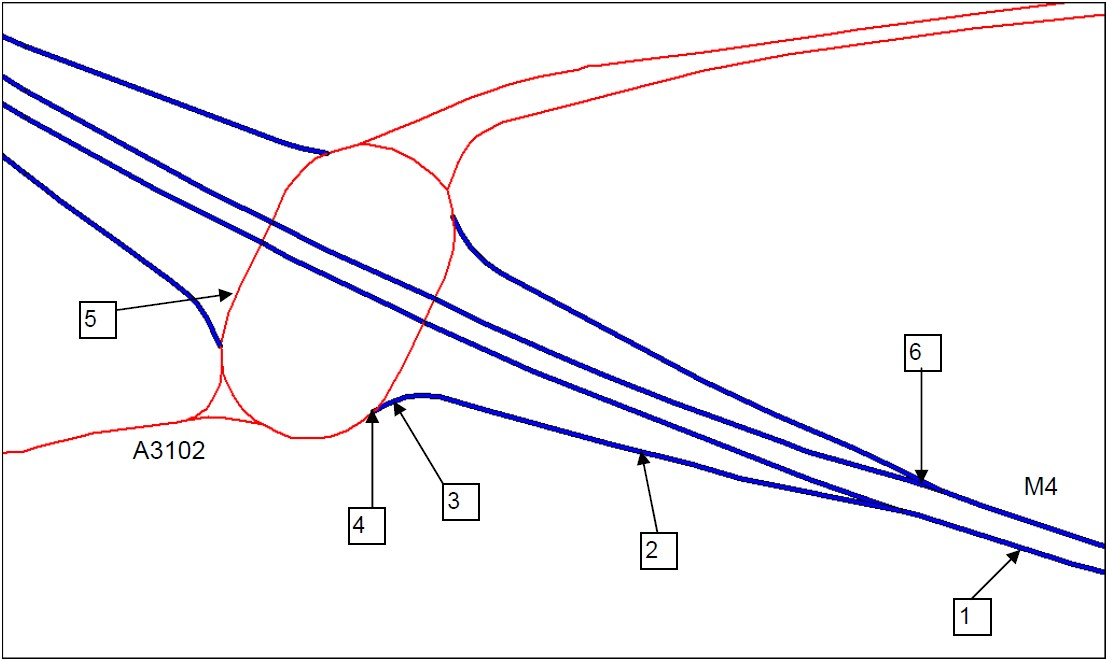

| Acc | Description | 1.12 | 1.13 | 1.14 | 1.16 | 1.17 | 1.18 | 1.19 | | Veh | 2.7 | 2.10 |
|-----|-------------|------|------|------|------|------|------|------|--- |-----|-----|------|
| 1 | Veh 1 hits offside of Veh 2 <br /> whilst moving to nearside lane <br /> on main carriageway of motorway, <br /> 100 metres from junction | 1 | 4 | 3 | 00 | | | | | 001 <br /> 002 | 11 <br /> 18 | 0 <br /> 0 |
| | | | | | | | | | | | | |
| 2 | Veh 1 crashes on exit slip road, <br /> 50m. from junction with motorway <br /> main carriageway and 50m. from roundabout | 1 | 4 | 7 | 00 | | | | | | 001 | 18 | 0 |
| | | | | | | | | | | | | |
| 3 | Veh 1 crashes into rear of Veh 2 <br /> which is waiting in queue on slip road, <br /> 10m from junction with roundabout | 1 | 4 | 7 | 01 | 2 | 3 | 3102 | | 001 <br /> 002 | 04 <br /> 03 | 1 <br /> 1 |
| | | | | | | | | | | | | |
| 4 | Veh 1 pulls out from slip road onto <br /> roundabout and hits nearside of Veh 2 | 3 | 3102 | 1 | 01 | 2 | 1 | 4 | | 001 <br /> 002 | 18 <br /> 04 | 4 <br /> 8 |
| | | | | | | | | | | | | |
| 5 | Veh 1 crashes into rear of Veh 2 <br /> which brakes suddenly on roundabout,<br /> more than 20m. from any entry/exit roads | 3 | 3102 | 1  | | | | | | 001 <br /> 002 | 18 <br /> 04 | 0 <br /> 0 |
| | | | | | | | | | | | | |
| 6 | Veh 1 joining main carriageway of <br /> motorway from entry slip collides <br /> with Veh 2 which is in nearside lane | 1 | 4 | 3 | 05 | 4 | 1 | 4 | | 001 <br /> 002 | 12 <br /> 18 | 7 <br /> 8 |

## Import Dependencies

Lets import the modules we will be using, and add a little global styling.

In [144]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno
import os

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns
# conda install -c conda-forge folium
import folium as flm

from datetime import datetime
import statistics

# from time import sleep
# from tqdm import tqdm
# from tqdm.notebook import tqdm

# apply some cool styling
rcParams['figure.figsize'] = (12,  6)
sns.set(style='darkgrid', palette='pastel', font_scale=1)

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

## Importing and Loading Data into DataFrame

Lets import the dataset using pandas `pd.read_parquet` as `df_accident`, and have a quick look at some random rows.

In [145]:
df_accident = pd.read_parquet(
    '../DATA/parquet/Group1/full_accident_data_set.parquet')

In [146]:
# I like to use this method as it shows random rows.
df_accident.sample(n=10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1231316,201201XH30610,Unclassified,0.0,Unclassified,0.0,Slight,None,2012-10-12,Friday,1.0,Give way or uncontrolled,T or staggered junction,51.525521,Daylight,Hillingdon,Hillingdon,508640.0,181900.0,-0.435374,E01002423,1,1,0.0,0.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,11:11,Urban,Fine no high winds,2012,No
1038596,201054EA39110,B,3107.0,B,3105.0,Slight,None,2010-11-03,Wednesday,1.0,Give way or uncontrolled,T or staggered junction,51.349348,Daylight,Wiltshire,Wiltshire,384750.0,161170.0,-2.220381,E01032058,2,3,0.0,0.0,Wiltshire,Wet or damp,Single carriageway,None,60.0,08:43,Rural,Fine no high winds,2010,No
1922728,2017010027144,Unclassified,0.0,Unclassified,0.0,Slight,None,2017-03-22,Wednesday,1.0,Give way or uncontrolled,T or staggered junction,51.585209,Daylight,Waltham Forest,Waltham Forest,536190.0,189200.0,-0.035640,E01004393,1,1,0.0,0.0,Metropolitan Police,Wet or damp,One way street,None,30.0,08:54,Urban,Fine no high winds,2017,No
830350,2009330905653,C,7406.0,None,0.0,Slight,None,2009-09-24,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,52.508954,Darkness - no lighting,Harborough,Leicestershire,474110.0,290680.0,-0.909481,E01025797,4,1,0.0,0.0,Leicestershire,Dry,Single carriageway,None,60.0,02:10,Rural,Fine no high winds,2009,No
949557,201011NE25090,A,1086.0,Unclassified,0.0,Slight,None,2010-10-14,Thursday,1.0,Give way or uncontrolled,T or staggered junction,54.740487,Daylight,County Durham,County Durham,446750.0,538630.0,-1.275370,E01020736,1,1,0.0,0.0,Durham,Wet or damp,Single carriageway,None,30.0,15:44,Rural,Raining no high winds,2010,No
1314448,2012440397706,Unclassified,0.0,None,0.0,Slight,None,2012-10-11,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,50.799879,Daylight,New Forest,Hampshire,437243.0,100175.0,-1.472904,E01022999,2,1,0.0,0.0,Hampshire,Wet or damp,Single carriageway,None,30.0,11:00,Rural,Raining no high winds,2012,No
1087354,201104EL11144,B,6231.0,None,0.0,Slight,None,2011-12-02,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,53.766413,Daylight,Hyndburn,Lancashire,375169.0,430074.0,-2.378188,E01025034,1,3,0.0,0.0,Lancashire,Dry,Single carriageway,None,30.0,13:15,Urban,Fine no high winds,2011,No
1896908,201650KH2D001,A,30.0,None,0.0,Slight,None,2016-01-31,Sunday,1.0,Data missing or out of range,Not at junction or within 20 metres,50.813458,Darkness - lights lit,East Devon,Devon,317850.0,102202.0,-3.167460,E01019938,1,1,0.0,0.0,Devon and Cornwall,Wet or damp,Single carriageway,None,40.0,21:07,Rural,Raining + high winds,2016,No
112131,2005350317805,B,1040.0,B,660.0,Slight,None,2005-07-01,Friday,1.0,Give way or uncontrolled,T or staggered junction,52.475275,Daylight,Huntingdonshire,Cambridgeshire,525590.0,287980.0,-0.152317,E01018157,2,2,0.0,0.0,Cambridgeshire,Dry,Single carriageway,None,40.0,16:15,Rural,Fine no high winds,2005,No
1857729,2016350045416,B,1043.0,Unclassified,0.0,Serious,None,2016-03-29,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,52.232668,Daylight,Huntingdonshire,Cambridgeshire,518670.0,260810.0,-0.263748,E01018190,1,1,0.0,0.0,Cambridgeshire,Dry,Single carriageway,None,30.0,15:30,Urban,Fine no high winds,2016,No


### Data Shape
Lets have a look ar the shape of the data.

In [147]:
df_accident.shape

(2047256, 34)

We have 1,048,575 rows (values) and 34 columns (features).

### Data Types
Lets have a look at the data types.

In [148]:
df_accident.info()
df_accident.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

object     21
float64    10
int64       3
dtype: int64

#### Data Types
|Data Type | Number|
|---|---:|
|object | 21|
|float | 9|
|integer | 4 |

## Data Cleaning
We will check the data for missing values, duplicates and incorrect data types.
- Missing Values - We will examine the missing values and use CCA to determine removal or replacement
- Duplicates - We will remove any duplicates
- Data Types - We will correct any data type errors, for example dates and times, as we go through the features

### Missing Values
Lets check for missing data.

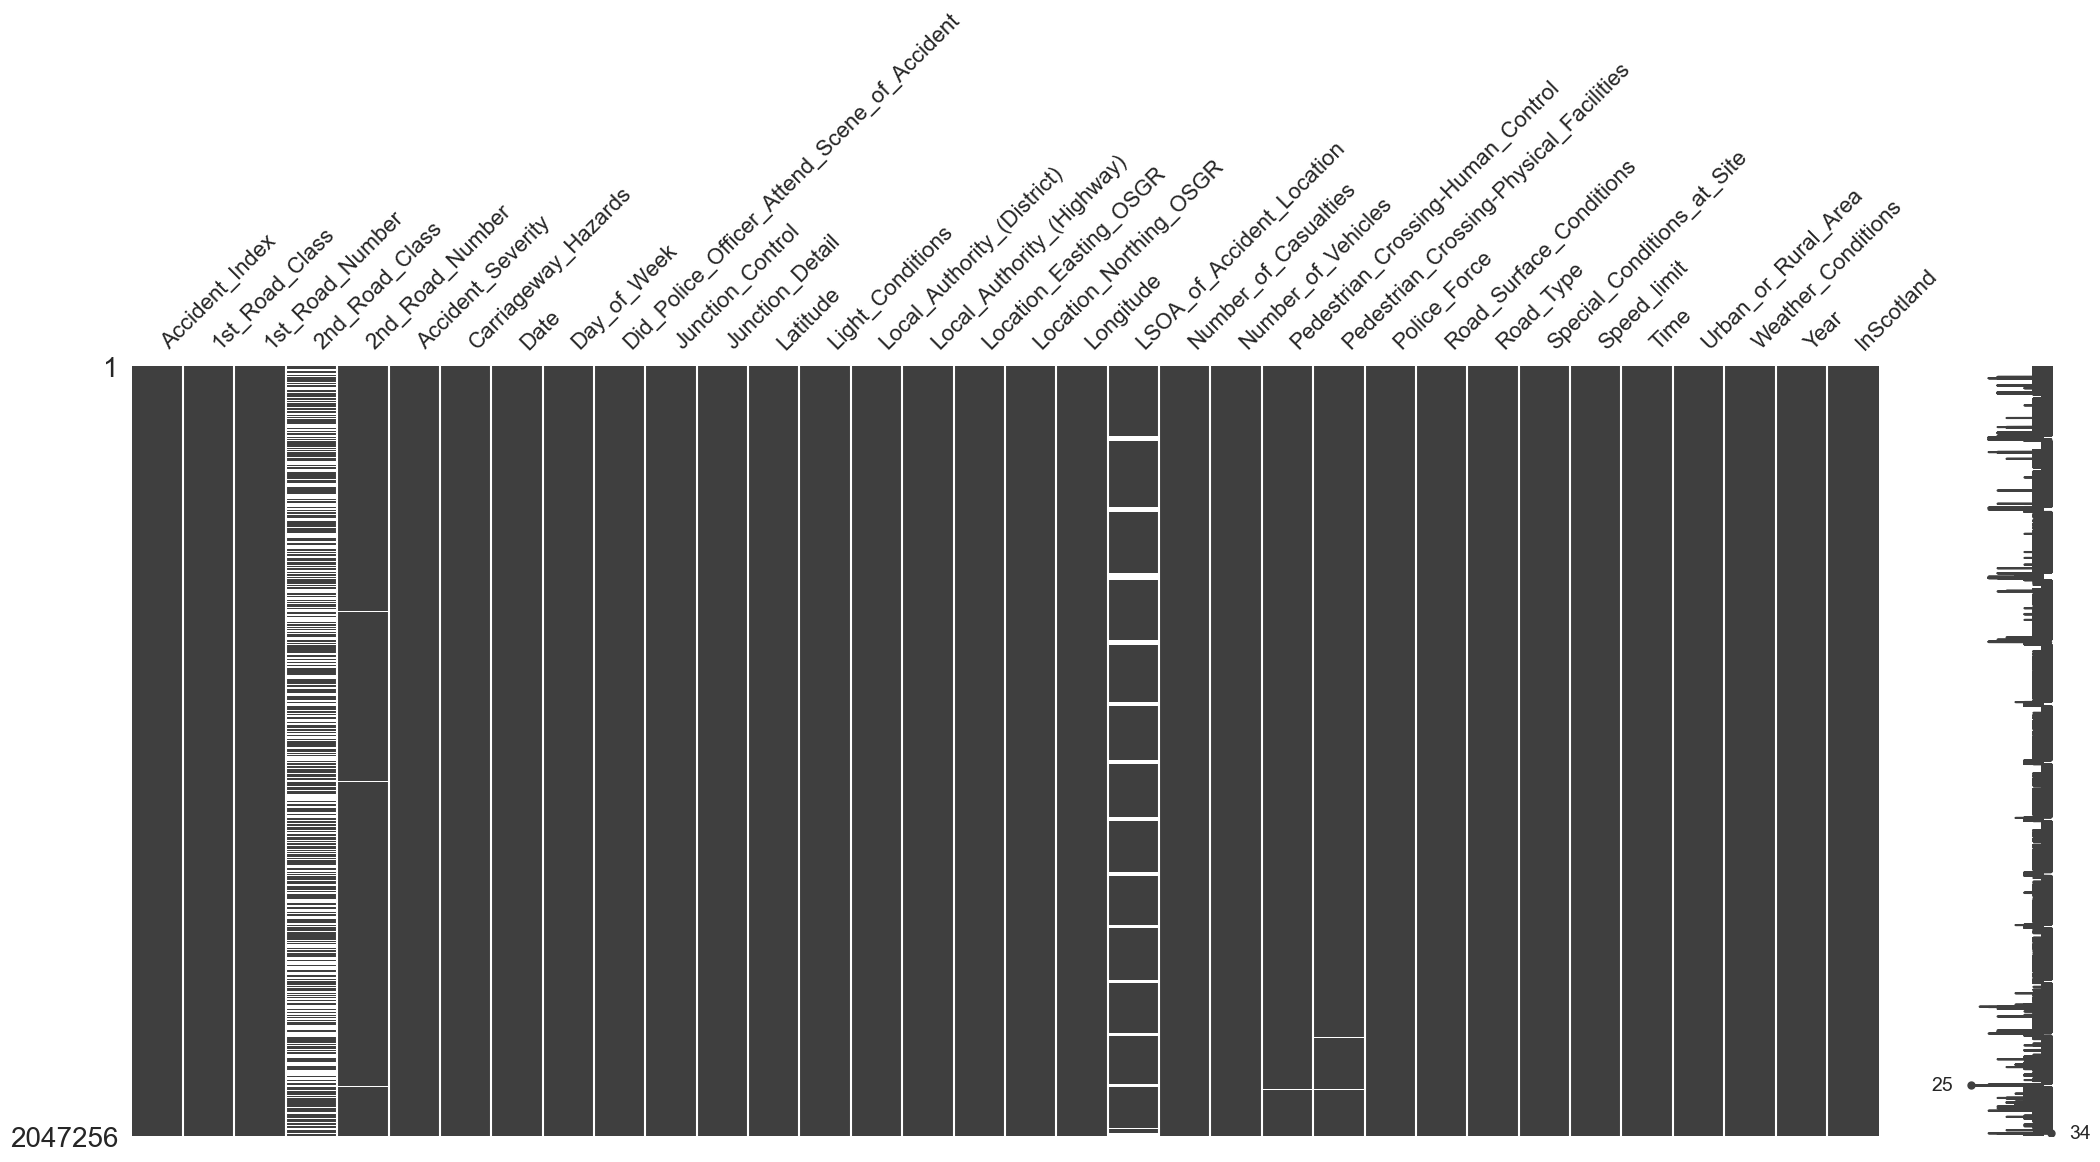

In [149]:
msno.matrix(df_accident);

In [150]:
df_accident.isnull().sum().sort_values(ascending=False)

2nd_Road_Class                                 844272
LSOA_of_Accident_Location                      144953
2nd_Road_Number                                 17593
Pedestrian_Crossing-Physical_Facilities          3560
Pedestrian_Crossing-Human_Control                2920
Did_Police_Officer_Attend_Scene_of_Accident       278
Longitude                                         175
Latitude                                          174
Location_Northing_OSGR                            164
Location_Easting_OSGR                             164
Time                                              156
InScotland                                         53
Speed_limit                                        37
1st_Road_Number                                     2
Junction_Detail                                     0
Light_Conditions                                    0
Year                                                0
Weather_Conditions                                  0
Urban_or_Rural_Area         

In [151]:
print(
    'We have a total of:',
    sum(df_accident.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We have a total of: 1014501 missing values.


We have a lot of missing or NaN data (1,014,501). We will need to take a good look to see what is going on.  
  
We will start with the columns (features).

### Dropping Columns

Before we look at missing row data, data types and errors lets investigate the features and take out what we do not need.  
  
Lets highlight the columns we can drop and the reasons behind our decision:  
- **LSOA_of_Accident_Location** - As this is for statistical purposes it is not needed.
- **2nd_Road_Number** - Not needed as we have the class of the road and the geographical location.
- **Did_Police_Officer_Attend_Scene_of_Accident** - This happened after the event.
- **Location_Northing_OSGR** - Secondary geographical locator.
- **Location_Easting_OSGR**  - Secondary geographical locator.
- **InScotland** - Not needed as we have geolocation and Local Authority information.
- **1st_Road_Number** - Not needed as we have the class of the road and the geographical location.
- **Local_Authority_(Highway)** - Not needed as we have Local_Authority_(District) .
- **Accident_Index** - Not required for EDA however will leave in place so we can merge later if and when required.

Lets have a look **'Did_Police_Officer_Attend_Scene_of_Accident'**.

In [152]:
df_accident['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts(dropna=False, ascending=False)

1.0    1638195
2.0     403424
3.0       5359
NaN        278
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

Lets name the values according to the Police Form.

In [153]:
df_accident[
    'Did_Police_Officer_Attend_Scene_of_Accident'
] = df_accident[
    'Did_Police_Officer_Attend_Scene_of_Accident'
].map(
    {1.0 : 'Yes',
     2.0 : 'No',
     3.0 : 'Self Reported'}
)
df_accident['Did_Police_Officer_Attend_Scene_of_Accident'].replace(np.NaN, 'Self Reported', inplace=True)
df_accident[
    'Did_Police_Officer_Attend_Scene_of_Accident'
].value_counts(dropna=False, ascending=False)


Yes              1638195
No                403424
Self Reported       5637
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

There is only 5,637 instances of **Self Reporting**, the remaining 2,041,6190 were reported on site at the accident or at a Police station, by a Police Officer or member of civilian staff.

In [154]:
df_accident.groupby('Did_Police_Officer_Attend_Scene_of_Accident')['Accident_Severity'].value_counts(ascending=False)

Did_Police_Officer_Attend_Scene_of_Accident  Accident_Severity
No                                           Slight                373845
                                             Serious                28949
                                             Fatal                    630
Self Reported                                Slight                  5227
                                             Serious                  397
                                             Fatal                     13
Yes                                          Slight               1355476
                                             Serious               256993
                                             Fatal                  25726
Name: Accident_Severity, dtype: int64

In [155]:
df_accident.drop(['Location_Northing_OSGR',
                  'Location_Easting_OSGR',
                  'LSOA_of_Accident_Location',
                  '1st_Road_Number',
                  '2nd_Road_Number',
                  'Did_Police_Officer_Attend_Scene_of_Accident',
                  'Local_Authority_(Highway)',
                  'InScotland'
                  ], axis=1, inplace=True
                 )

In [156]:
df_accident.columns

Index(['Accident_Index', '1st_Road_Class', '2nd_Road_Class',
       'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year'],
      dtype='object')

In [157]:
df_accident.shape

(2047256, 26)

In [158]:
print(
    'We now have a total of:',
    sum(df_accident.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We now have a total of: 851294 missing values.


In [159]:
df_accident.isnull().sum().sort_values(ascending=False)

2nd_Road_Class                             844272
Pedestrian_Crossing-Physical_Facilities      3560
Pedestrian_Crossing-Human_Control            2920
Longitude                                     175
Latitude                                      174
Time                                          156
Speed_limit                                    37
Accident_Index                                  0
Weather_Conditions                              0
Urban_or_Rural_Area                             0
Special_Conditions_at_Site                      0
Road_Type                                       0
Road_Surface_Conditions                         0
Police_Force                                    0
Number_of_Casualties                            0
Number_of_Vehicles                              0
1st_Road_Class                                  0
Local_Authority_(District)                      0
Light_Conditions                                0
Junction_Detail                                 0


Lets take a look at the columns with the most missing data.
| Column Name         | Count        |
| --------------------|--------------|
| 1st_Road_Class      | 305589       |
| 2nd_Road_Class      | 844272       |
| Weather_Conditions  | 21392       |
| Road_Type           | 7266       |
| Light_Conditions    | 2084       |
| Road_Surface_Conditions | 1189   |

### 1st_Road_Class

In [160]:
df_accident['1st_Road_Class'].value_counts(dropna=False, ascending=False)

A               926729
Unclassified    603938
B               258076
C               174953
Motorway         78071
A(M)              5489
Name: 1st_Road_Class, dtype: int64

### 2nd_Road_Class

In [161]:
df_accident['2nd_Road_Class'].value_counts(dropna=False, ascending=False)

None            844272
Unclassified    814983
A               201317
C                92074
B                79657
Motorway         13428
A(M)              1525
Name: 2nd_Road_Class, dtype: int64

After investigating **1st_** and **2nd_road_class** features we found that in the [Police form](https://www.gov.uk/government/publications/stats19-forms-and-guidance) it shows us that there are two options which are very similar:  
  
- **Not Known**
- **Unclassified**
  
**Not Known** would indicate that the Police Officer does not know the road classification.  
**Unclassified** relates to a road of no classification, a side road or housing estate road.  
It would be logical to believe that there must be a **1st_Road_Class**, therefore the  
**1st_Road_Class**, **None**, value represents an **Unclassified** road or a **Not Known** road.  
  
The **2nd_road_class**, **None**, value represents that only one road was involved, and no junction.
  
Lets replace the values in **1st_Road_Class** with **Unclassified** and **2nd_road_class** with **No 2nd Road**  
  
We also found that a **2nd_road_class** can only be added if there is a **junction** involved.  

In [162]:
df_accident['1st_Road_Class'].replace(np.NaN, 'Unclassified', inplace=True)
df_accident['1st_Road_Class'].value_counts(dropna=False, ascending=False)

A               926729
Unclassified    603938
B               258076
C               174953
Motorway         78071
A(M)              5489
Name: 1st_Road_Class, dtype: int64

In [163]:
df_accident['2nd_Road_Class'].replace(np.NaN, 'No 2nd Road', inplace=True)
df_accident['2nd_Road_Class'].value_counts(dropna=False, ascending=False)

No 2nd Road     844272
Unclassified    814983
A               201317
C                92074
B                79657
Motorway         13428
A(M)              1525
Name: 2nd_Road_Class, dtype: int64

### 'Weather_Conditions'

In [164]:
df_accident['Weather_Conditions'].value_counts(dropna=False, ascending=False)

Fine no high winds              1640095
Raining no high winds            239281
Other                             44083
Unknown                           42521
Raining + high winds              28343
Fine + high winds                 25816
Snowing no high winds             13387
Fog or mist                       11068
Snowing + high winds               2487
Data missing or out of range        175
Name: Weather_Conditions, dtype: int64

We will change **'Weather_Conditions'** NaN values with the `mode`.

In [165]:
df_accident['Weather_Conditions'].replace(
    'Data missing or out of range', 'Fine no high winds', inplace=True)
df_accident['Weather_Conditions'].value_counts(
    dropna=False, ascending=False)

Fine no high winds       1640270
Raining no high winds     239281
Other                      44083
Unknown                    42521
Raining + high winds       28343
Fine + high winds          25816
Snowing no high winds      13387
Fog or mist                11068
Snowing + high winds        2487
Name: Weather_Conditions, dtype: int64

We have not made any significant change using **`mode`** ('Fine no high winds').

### 'Light_Conditions'

In [166]:
df_accident['Light_Conditions'].value_counts(dropna=False, ascending=False)

Daylight                        1496121
Darkness - lights lit            404144
Darkness - no lighting           112644
Darkness - lighting unknown       24362
Darkness - lights unlit            9971
Data missing or out of range         14
Name: Light_Conditions, dtype: int64

We will change **'Light_Conditions'** NaN values with the **`mode`** ('Daylight').

In [167]:
df_accident['Light_Conditions'].replace(
    'Data missing or out of range', 'Daylight', inplace=True)
df_accident['Light_Conditions'].value_counts(
    dropna=False, ascending=False)

Daylight                       1496135
Darkness - lights lit           404144
Darkness - no lighting          112644
Darkness - lighting unknown      24362
Darkness - lights unlit           9971
Name: Light_Conditions, dtype: int64

We have not made any significant change using **`mode`** ('Daylight').

### 'Road_Surface_Conditions'

In [168]:
df_accident['Road_Surface_Conditions'].value_counts(
                                            dropna=False, ascending=False
                                        )

Dry                             1418215
Wet or damp                      568563
Frost or ice                      40321
Snow                              12167
Data missing or out of range       5145
Flood over 3cm. deep               2845
Name: Road_Surface_Conditions, dtype: int64

We will change **'Road_Surface_Conditions'** NaN values with the **`mode`** ('Dry').

In [169]:
df_accident['Road_Surface_Conditions'].replace(
    'Data missing or out of range', 'Dry', inplace=True)
df_accident['Road_Surface_Conditions'].value_counts(
    dropna=False, ascending=False)

Dry                     1423360
Wet or damp              568563
Frost or ice              40321
Snow                      12167
Flood over 3cm. deep       2845
Name: Road_Surface_Conditions, dtype: int64

We have not made any significant change using **`mode`** ('Dry').

In [170]:
df_accident.shape

(2047256, 26)

In [171]:
print(
    'We now have a total of:',
    sum(df_accident.isnull().sum().sort_values(ascending=False)),
    'missing values.'
)

We now have a total of: 7022 missing values.


So far we have lost no rows and reduced the missing value count down to 7,022.  
  
We will drop the rows containing the left over NaN values.

In [172]:
df_accident.head(n=10)

,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,200501BS00001,A,No 2nd Road,Serious,None,2005-01-04,Tuesday,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,-0.191170,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005
1,200501BS00002,B,C,Slight,None,2005-01-05,Wednesday,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,-0.211708,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005
2,200501BS00003,C,No 2nd Road,Slight,None,2005-01-06,Thursday,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,-0.206458,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005
3,200501BS00004,A,No 2nd Road,Slight,None,2005-01-07,Friday,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,-0.173862,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005
4,200501BS00005,Unclassified,No 2nd Road,Slight,None,2005-01-10,Monday,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,-0.156618,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005
5,200501BS00006,Unclassified,No 2nd Road,Slight,None,2005-01-11,Tuesday,Data missing or out of range,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,-0.203238,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005
6,200501BS00007,C,Unclassified,Slight,None,2005-01-13,Thursday,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,-0.211277,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,20:40,Urban,Fine no high winds,2005
7,200501BS00009,A,No 2nd Road,Slight,None,2005-01-14,Friday,Data missing or out of range,Not at junction or within 20 metres,51.502260,Daylight,Kensington and Chelsea,-0.187623,2,1,0.0,0.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:35,Urban,Fine no high winds,2005
8,200501BS00010,A,B,Slight,None,2005-01-15,Saturday,Auto traffic signal,Crossroads,51.483420,Darkness - lights lit,Kensington and Chelsea,-0.167342,2,2,0.0,5.0,Metropolitan Police,Dry,Single carriageway,None,30.0,22:43,Urban,Fine no high winds,2005
9,200501BS00011,B,C,Slight,None,2005-01-15,Saturday,Give way or uncontrolled,T or staggered junction,51.512443,Daylight,Kensington and Chelsea,-0.206531,5,2,0.0,8.0,Metropolitan Police,Dry,Single carriageway,None,30.0,16:00,Urban,Fine no high winds,2005


In [173]:
df_accident['Light_Conditions'].value_counts()

Daylight                       1496135
Darkness - lights lit           404144
Darkness - no lighting          112644
Darkness - lighting unknown      24362
Darkness - lights unlit           9971
Name: Light_Conditions, dtype: int64

In [174]:
length_before = len(df_accident)
df_accident.dropna(inplace=True)
lnth = (length_before - len(df_accident)) / length_before
df_accident.reset_index(drop=True)
print(f'We have dropped only {lnth:.2%} of the rows.')

We have dropped only 0.22% of the rows.


We have only lost 0.22% of the original rows.

Lets confirm we have no missing values.

In [175]:
print(
    'We now have a total of:',
    sum(df_accident.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We now have a total of: 0 missing values.


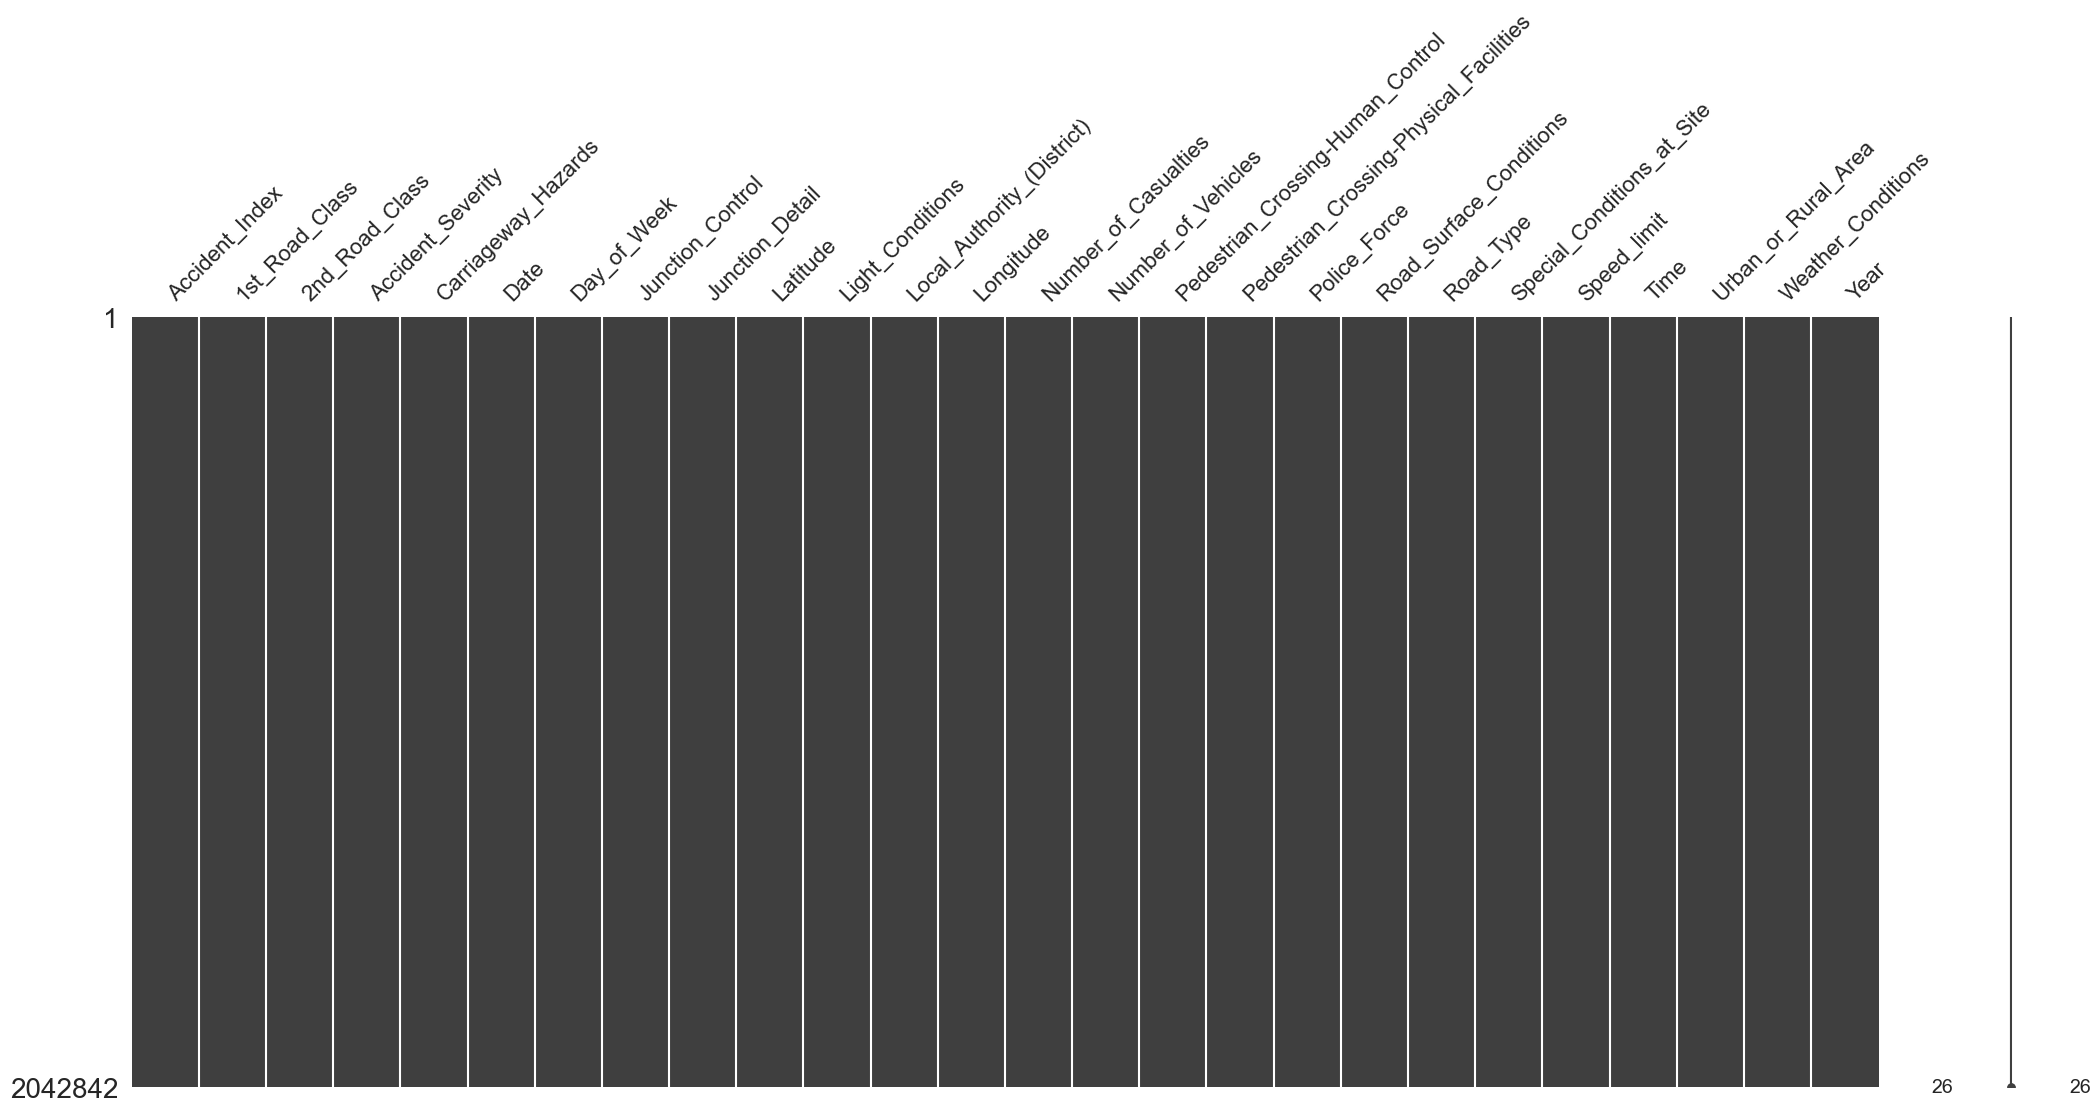

In [176]:
msno.matrix(df_accident);

### Duplicates
Lets check for and remove any duplicate rows.

In [177]:
# Number of duplicated rows
print(f'Number of duplicated rows:', df_accident.duplicated().sum())
print(f'Rows and columns:', df_accident.shape)

Number of duplicated rows: 0
Rows and columns: (2042842, 26)


### Data Types and Formatting
We will convert all column names to lowercase change special characters, **-** with **_** and **()** with **''** and remove white space, if any, for standardisation.

In [178]:
df_accident.columns= df_accident.columns.str.strip().str.lower()
df_accident.columns = df_accident.columns.str.replace('-', '_')
df_accident.columns = df_accident.columns.str.replace('(', '')
df_accident.columns = df_accident.columns.str.replace(')', '')
df_accident.columns

Index(['accident_index', '1st_road_class', '2nd_road_class',
       'accident_severity', 'carriageway_hazards', 'date', 'day_of_week',
       'junction_control', 'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'longitude', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year'],
      dtype='object')

Now we can check datatypes.

In [179]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042842 entries, 0 to 2047255
Data columns (total 26 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   accident_index                           object 
 1   1st_road_class                           object 
 2   2nd_road_class                           object 
 3   accident_severity                        object 
 4   carriageway_hazards                      object 
 5   date                                     object 
 6   day_of_week                              object 
 7   junction_control                         object 
 8   junction_detail                          object 
 9   latitude                                 float64
 10  light_conditions                         object 
 11  local_authority_district                 object 
 12  longitude                                float64
 13  number_of_casualties                     int64  
 14  number_of_vehicles

Lets take a sample row and have a look at each feature in more detail.  

In [180]:
df_accident.sample(1)

,accident_index,1st_road_class,2nd_road_class,accident_severity,carriageway_hazards,date,day_of_week,junction_control,junction_detail,latitude,light_conditions,local_authority_district,longitude,number_of_casualties,number_of_vehicles,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,police_force,road_surface_conditions,road_type,special_conditions_at_site,speed_limit,time,urban_or_rural_area,weather_conditions,year
1974411,2017200182330,Unclassified,A,Slight,None,2017-05-03,Wednesday,Auto traffic signal,Crossroads,52.4875,Daylight,Birmingham,-1.917894,1,2,0.0,0.0,West Midlands,Dry,Single carriageway,None,30.0,19:22,Urban,Fine no high winds,2017


Lets convert the categorical data to `category` and the numerical data to `int` and `float`.

In [182]:
for col in ['accident_index',
            '1st_road_class', '2nd_road_class', 'speed_limit',
            'accident_severity', 'carriageway_hazards',
            'junction_control', 'junction_detail',
            'light_conditions', 'local_authority_district',
            'pedestrian_crossing_human_control',
            'pedestrian_crossing_physical_facilities',
            'police_force', 'road_surface_conditions',
            'road_type', 'special_conditions_at_site',
            'urban_or_rural_area', 'weather_conditions'
            ]:
    df_accident[col] = df_accident[col].astype('category')

for col in ['number_of_casualties', 'number_of_vehicles'
            ]:
    df_accident[col] = df_accident[col].astype('int')

for col in ['latitude', 'longitude'
            ]:
    df_accident[col] = df_accident[col].astype('float64')

df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042842 entries, 0 to 2047255
Data columns (total 26 columns):
 #   Column                                   Dtype   
---  ------                                   -----   
 0   accident_index                           category
 1   1st_road_class                           category
 2   2nd_road_class                           category
 3   accident_severity                        category
 4   carriageway_hazards                      category
 5   date                                     object  
 6   day_of_week                              object  
 7   junction_control                         category
 8   junction_detail                          category
 9   latitude                                 float64 
 10  light_conditions                         category
 11  local_authority_district                 category
 12  longitude                                float64 
 13  number_of_casualties                     int32   
 14  nu

Now things are starting to look much better. We will look at dates and times later, as we plan to make use of these columns.

## Average Counts
Lets see how the **RTC's** have tracked over our time period.

In [43]:
yr_2005, yr_2006, yr_2007, yr_2008, yr_2009, yr_2010 = (
    df_accident['year'] == 2005, df_accident['year'] == 2006,
    df_accident['year'] == 2007, df_accident['year'] == 2008,
    df_accident['year'] == 2009, df_accident['year'] == 2010
    )

yr_slight = df_accident['accident_severity'] == 'Slight'
yr_serious = df_accident['accident_severity'] == 'Serious'
yr_fatal = df_accident['accident_severity'] == 'Fatal'

yearly_numbers = {
    '2005' : [
        yr_2005.sum(), int(yr_2005.sum() /12), int(yr_2005.sum() / 52),
        int(yr_2005.sum() /365), (yr_2005 & yr_slight).sum(),
        (yr_2005 & yr_serious).sum(), (yr_2005 & yr_fatal).sum()
    ],
    '2006' : [
        yr_2006.sum(), int(yr_2006.sum() /12), int(yr_2006.sum() / 52),
        int(yr_2006.sum() /365), (yr_2006 & yr_slight).sum(),
        (yr_2006 & yr_serious).sum(), (yr_2006 & yr_fatal).sum()
    ],
    '2007' : [
        yr_2007.sum(), int(yr_2007.sum() /12), int(yr_2007.sum() / 52),
        int(yr_2007.sum() /365), (yr_2007 & yr_slight).sum(),
        (yr_2007 & yr_serious).sum(), (yr_2007 & yr_fatal).sum()
    ],
    '2008' : [
        yr_2008.sum(), int(yr_2008.sum() /12), int(yr_2008.sum() / 52),
        int(yr_2008.sum() /365), (yr_2008 & yr_slight).sum(),
        (yr_2008 & yr_serious).sum(), (yr_2008 & yr_fatal).sum()
    ],
    '2009' : [
        yr_2009.sum(), int(yr_2009.sum() /12), int(yr_2009.sum() / 52),
        int(yr_2009.sum() /365), (yr_2009 & yr_slight).sum(),
        (yr_2009 & yr_serious).sum(), (yr_2009 & yr_fatal).sum()
    ],
    '2010' : [
        yr_2010.sum(), int(yr_2010.sum() /12), int(yr_2010.sum() / 52),
        int(yr_2010.sum() /365), (yr_2010 & yr_slight).sum(),
        (yr_2010 & yr_serious).sum(), (yr_2010 & yr_fatal).sum()
    ]
}

In [44]:
df_avgs = pd.DataFrame.from_dict(yearly_numbers, ).T
df_avgs.reset_index(inplace=True)
df_avgs.columns = ['year', 'yearly', 'monthly', 'weekly',
                   'daily', 'slight', 'serious', 'fatal'
                  ]

In [ ]:
for yr in df_accident['year']:
    

In [45]:
df_avgs

,year,yearly,monthly,weekly,daily,slight,serious,fatal
0,2005,198608,16550,3819,544,170689,25007,2912
1,2006,189115,15759,3636,518,161247,24942,2926
2,2007,182077,15173,3501,498,155047,24316,2714
3,2008,170558,14213,3279,467,145103,23114,2341
4,2009,163537,13628,3144,448,139485,21995,2057
5,2010,154406,12867,2969,423,132235,20440,1731


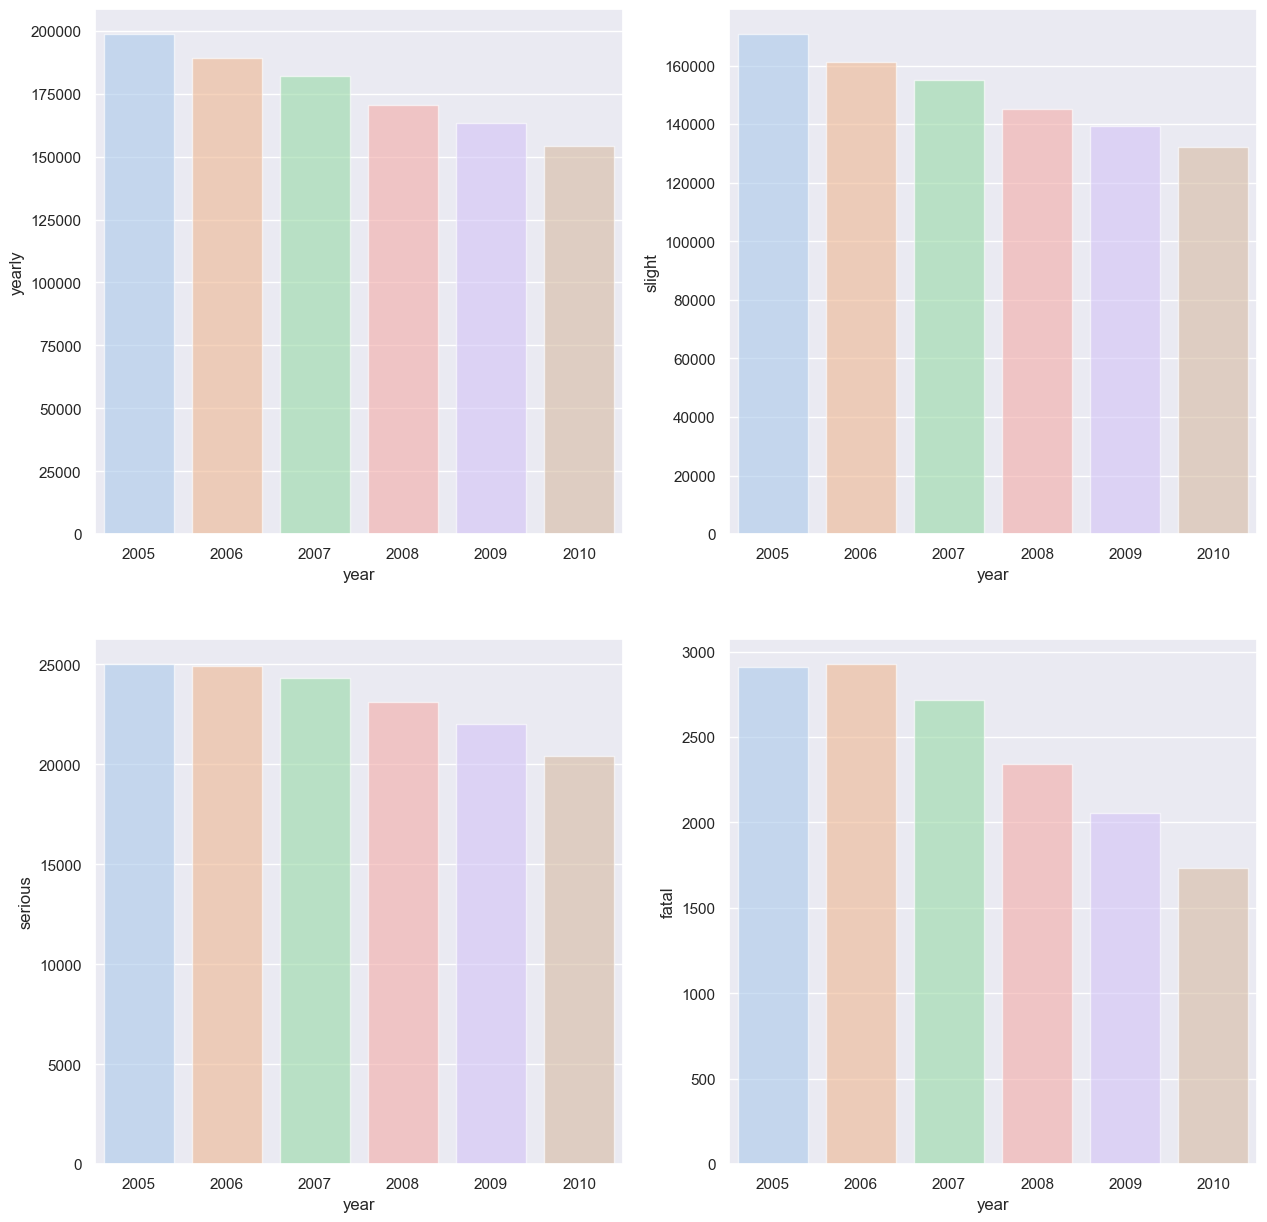

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.barplot(data=df_avgs, x='year', y='yearly', alpha=0.6, ax=ax[0, 0])
sns.barplot(data=df_avgs, x='year', y='slight', alpha=0.6, ax=ax[0, 1])
sns.barplot(data=df_avgs, x='year', y='serious', alpha=0.6, ax=ax[1, 0])
sns.barplot(data=df_avgs, x='year', y='fatal', alpha=0.6, ax=ax[1, 1]);

plt.show()

As expected we can see a nice decline in RTC's over the six years.

## Collision Severity Spread

In [47]:
round(df_accident[
    'accident_severity'
].value_counts(ascending=False, normalize=True), 3) * 100

Slight     84.7
Serious    14.0
Fatal       1.3
Name: accident_severity, dtype: float64

| Severity         | Percentage        |
| --------------------|--------------|
| **Slight**      | **85.4%**       |
| **Serious**      | **13.2%**      |
| **Fatal**  | **1.4%**    |
  
With less than 15% of Serious and Fatal accidents we have a very heavy bias towards **Slight** collisions.  
  
Lets see if we can uncover any large increases in the **Serious** and **Fatal** collisions.  
We have benchmarks of:
- 13.2% for **Serious** collisions
- 1.4% for **Fatal** collisions

## Features

Lets remind ourselves of our features.

In [48]:
df_accident.columns

Index(['accident_index', '1st_road_class', '2nd_road_class',
       'accident_severity', 'carriageway_hazards', 'date', 'day_of_week',
       'junction_control', 'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'longitude', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year'],
      dtype='object')

### Feature: **'1st_road_class'** and **'2nd_road_class'**

In [49]:
print(df_accident['1st_road_class'].value_counts(
                                                 dropna=False, ascending=False
                                                 ))
print(f'Total rows: ', df_accident['1st_road_class'].count())

A               924438
Unclassified    602736
B               257725
C               174480
Motorway         77978
A(M)              5485
Name: 1st_road_class, dtype: int64
Total rows:  2042842


In [50]:
print(df_accident['2nd_road_class'].value_counts(
                                                 dropna=False, ascending=False
                                                 ))
print(f'Total rows: ', df_accident['1st_road_class'].count())

No 2nd Road     842750
Unclassified    813141
A               200704
C                91799
B                79506
Motorway         13418
A(M)              1524
Name: 2nd_road_class, dtype: int64
Total rows:  2042842


We can see that most RTC's happen on **'A Roads'** and **'Unclassified Roads'**. Nearly half of all RTC's do not involve a **second road**.

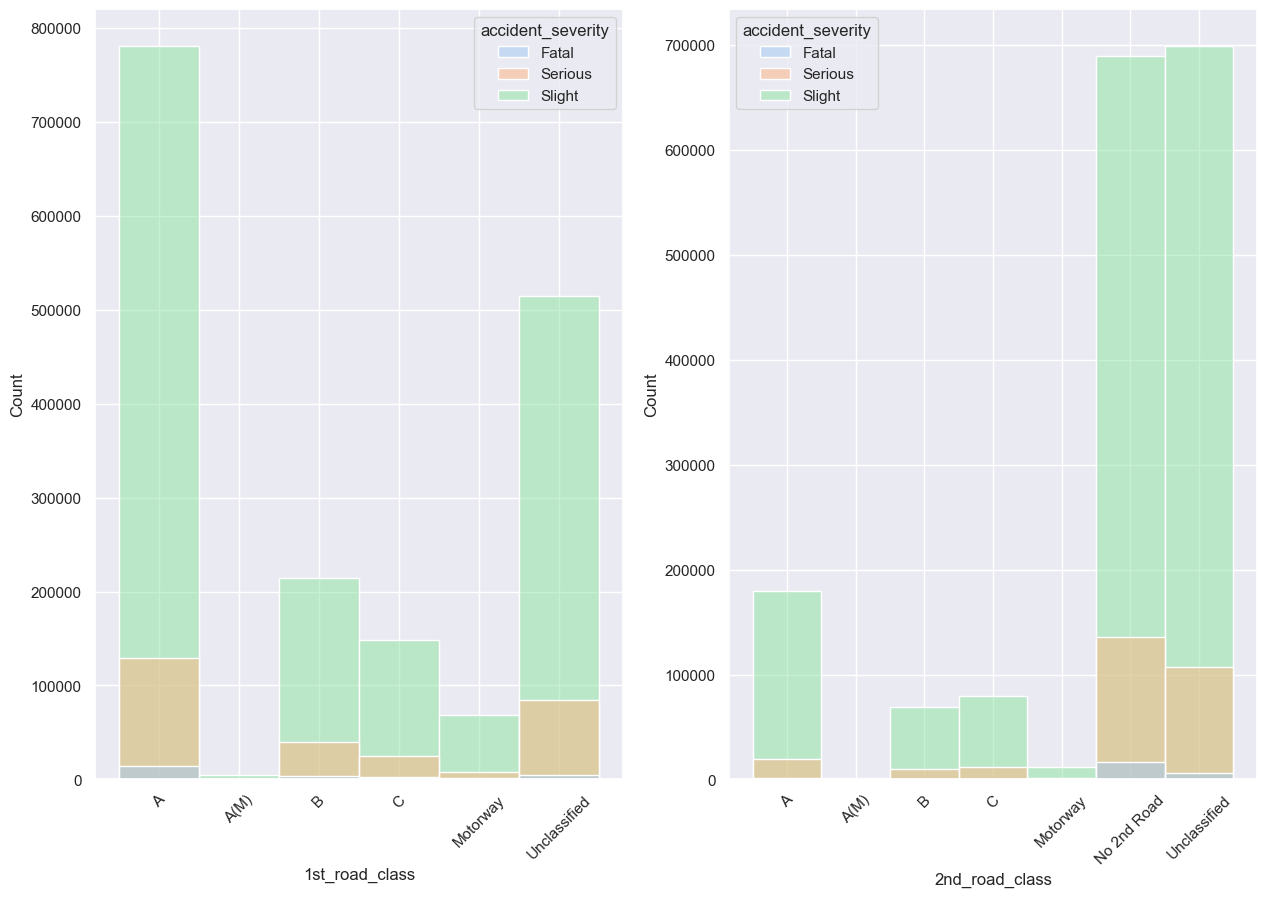

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
for axes in ax.flatten():
    plt.sca(axes)
    plt.xticks(rotation = 45)

sns.histplot(data=df_accident,
             x='1st_road_class',
             hue='accident_severity',
             ax=ax[0]
             )

sns.histplot(data=df_accident,
             x='2nd_road_class',
             hue='accident_severity',
             ax=ax[1]
             )

plt.show()

From the visualisation we can detect that most fatal RTC's happen on either an **'A' Road only**, or an **'A'** Road with an **'Unclassified'** 2nd Road (pulling out of, or into a side road).

### Feature - **'accident_severity'**

In [52]:
print(df_accident['accident_severity'].value_counts(
                                                    dropna=False,
                                                    ascending=False
                                                    ))
print(f'\n Total rows: ', df_accident['accident_severity'].count())

Slight     1730496
Serious     286005
Fatal        26341
Name: accident_severity, dtype: int64

 Total rows:  2042842


We can see that most RTC's are **'Slight'** RTC's with **'Fatal'** the lowest.

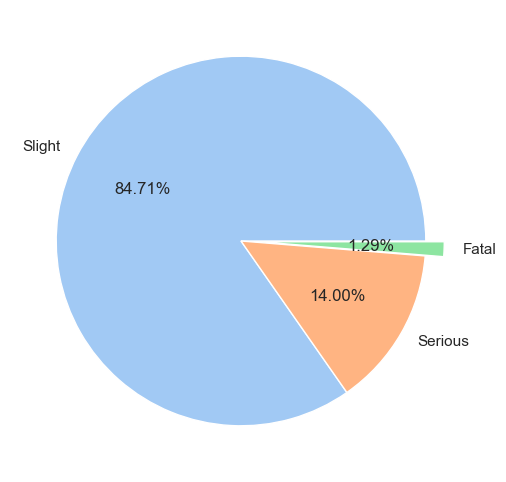

In [53]:
data = df_accident['accident_severity'].value_counts()
labels = ['Slight', 'Serious', 'Fatal']
colors = sns.color_palette('pastel')[0:3]
explode=[0, 0, 0.1]
plt.pie(
    data, labels = labels,
    colors = colors,
    explode=explode, autopct='%.2f%%'
)

plt.show()

<AxesSubplot: >

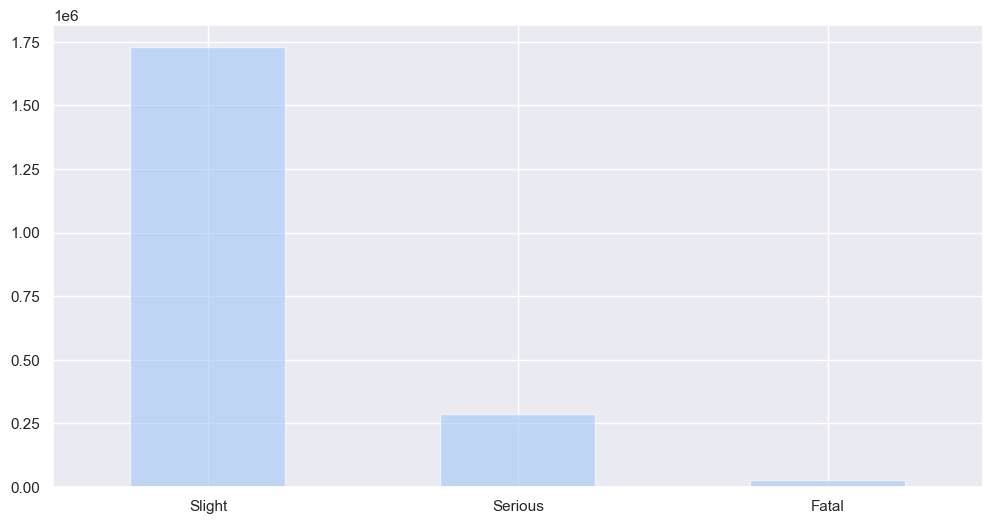

In [54]:
df_accident['accident_severity'].value_counts().plot(kind='bar',
                                                     alpha=0.6, rot=0
                                                     )

### Features - **'date'** and **'time'**

Lets take a look at the data type of the **'date'** and **'time'** columns.

In [55]:
print(f'Data type of Date Column: {df_accident["date"].dtype}')
print(f'Data type of Date Column: {df_accident["time"].dtype}')
print(df_accident['date'][0])
print(df_accident['time'][0])

Data type of Date Column: object
Data type of Date Column: object
2005-01-04
17:42


Lets convert our **'date'** and **'time'** columns using `pd.to_datetime`.

In [56]:
df_accident['date'] = pd.to_datetime(df_accident['date'], dayfirst=True)
df_accident['time'] =  pd.to_datetime(df_accident['time'], format='%H:%M')
print(f"Data type of date Column: {df_accident['date'].dtype}")
print(f"Data type of time Column: {df_accident['time'].dtype}")

Data type of date Column: datetime64[ns]
Data type of time Column: datetime64[ns]


#### New Feature - **'hour'**
Lets create the new feature **'hour'** in order to simplify the time view.

In [57]:
df_accident['hour'] = df_accident['time'].apply(lambda x:x.hour)
# df_accident.drop('time', axis=1, inplace=True)

### Feature - **'hour'**

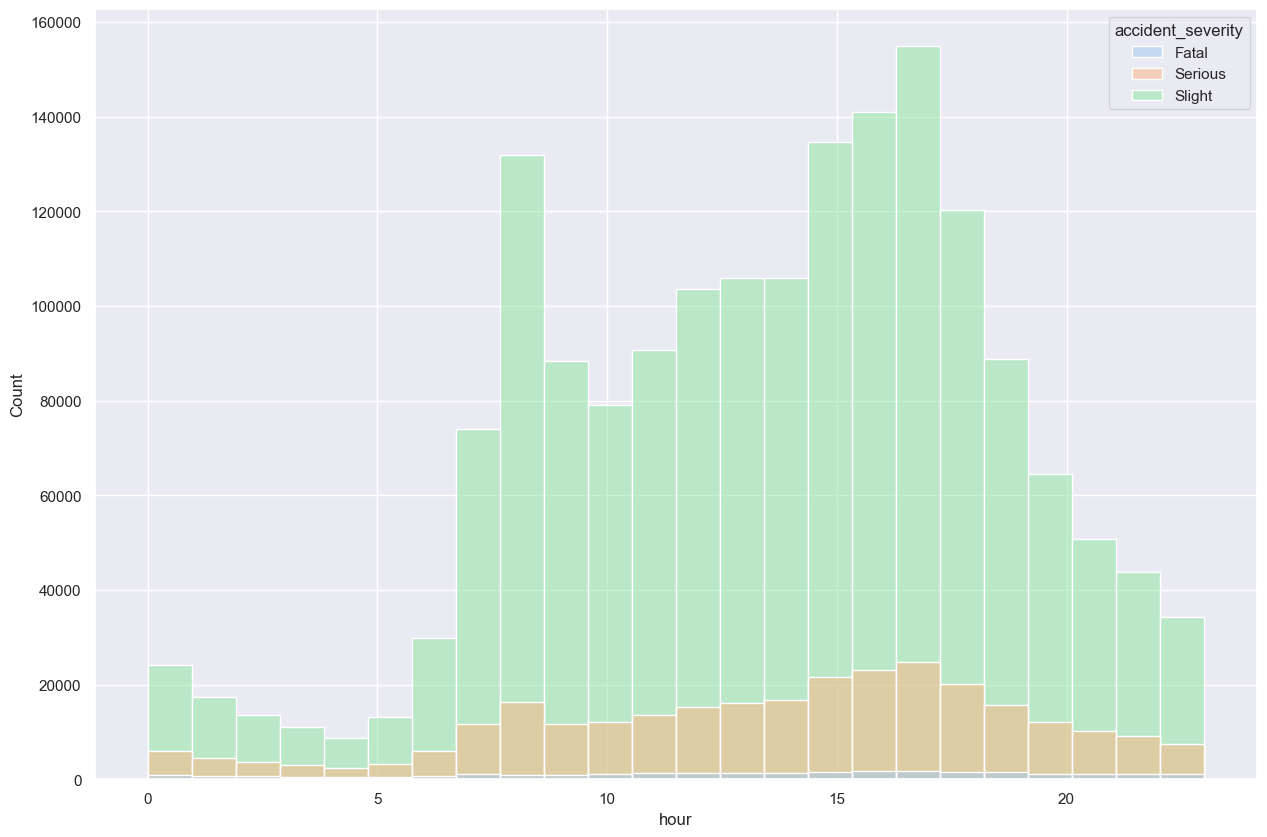

In [58]:
plt.figure(figsize=(15,10))
ax = sns.histplot(
    data=df_accident, x='hour',
    palette='pastel', bins=24, hue='accident_severity'
                  )

plt.show()

We can see two peaks, one in the morning and one in the afternoon.  
  
Lets take a look at the **RTC** severities.

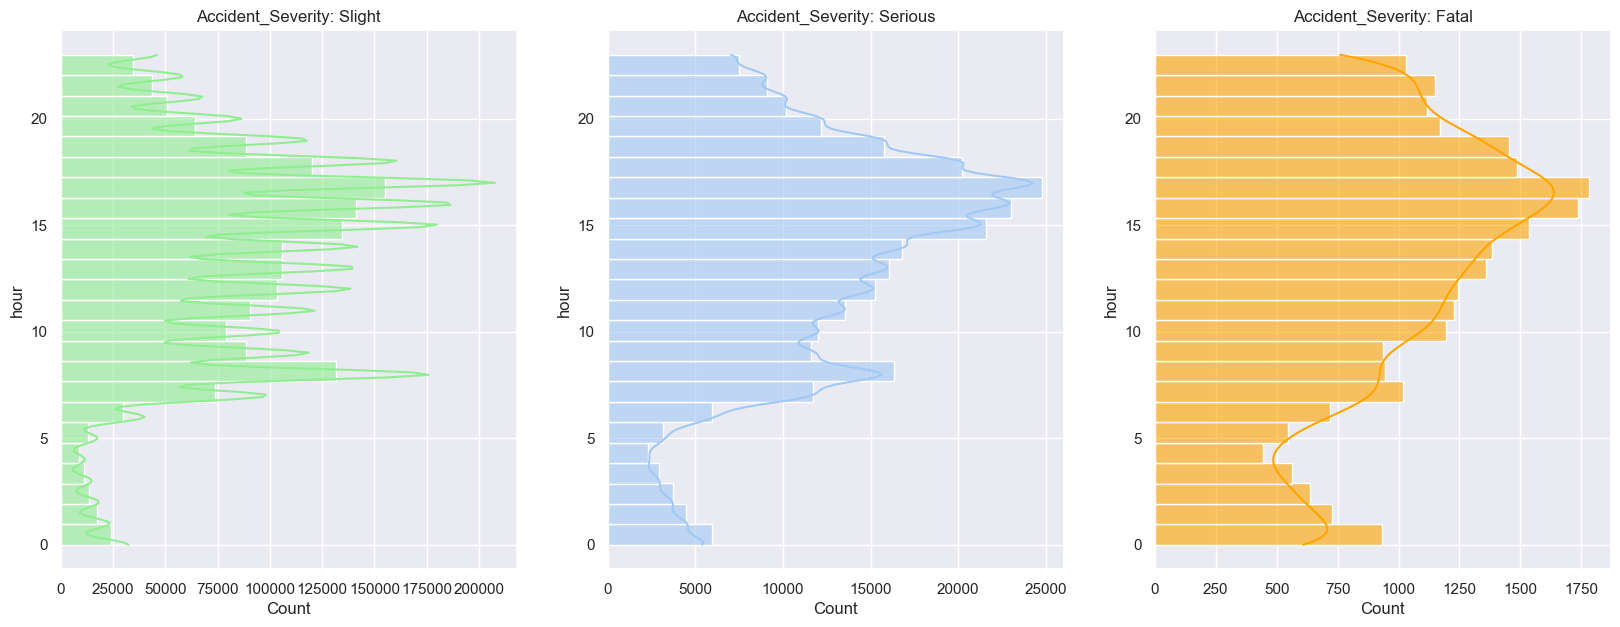

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(
             df_accident[df_accident['accident_severity'] == 'Slight'],
             y='hour', color='lightgreen',
             alpha=0.6, bins=24, ax=ax[0], kde=True
             ).set(title=f'Accident_Severity: Slight')

sns.histplot(
             df_accident[df_accident['accident_severity'] == 'Serious'],
             y='hour',
             alpha=0.6, bins=24, ax=ax[1], kde=True
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(
             df_accident[df_accident['accident_severity'] == 'Fatal'],
             y="hour", color='orange',
             alpha=0.6, bins=24, ax=ax[2], kde=True
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see most RTC's happen betwen 8am and 7pm, with two peaks.  
- For Slight and Serious we have peaks at 9am and 3-5pm. This would appear to be rush hour traffic.
- For **'Fatal'** we have a peak at 3-5pm  

**'Fatal'** RTC's do appear to maintain a higher rate until midnight, where it then starts to tail off.

### Feature - **'day_of_week'**

Here we can look to see what week day trends we have.

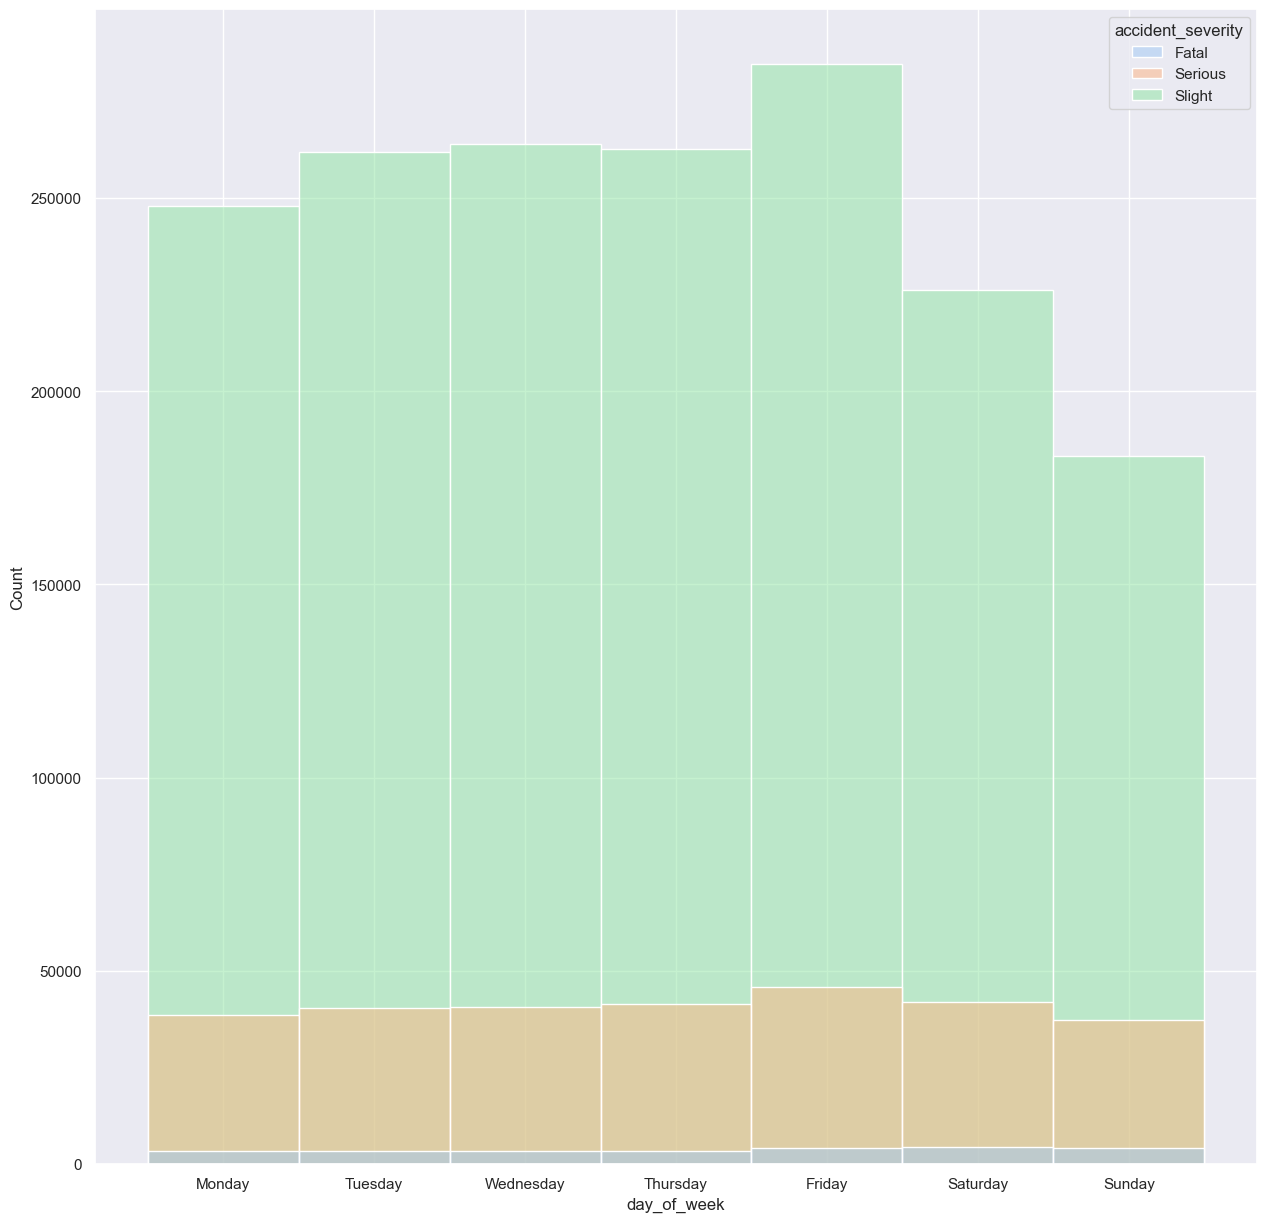

In [60]:
df_accident.day_of_week = pd.Categorical(
                                    values=df_accident.day_of_week,
                                    categories=['Monday', 'Tuesday',
                                                'Wednesday', 'Thursday',
                                                'Friday', 'Saturday', 'Sunday'
                                                ]
                                    ) # Set the order for the columns.
df_accident.sort_values(['day_of_week']) # Sort the columns.

plt.figure(figsize=(15,15))
ax = sns.histplot(
    data=df_accident, x='day_of_week',
    palette='pastel', bins=7, hue='accident_severity'
    )

plt.show()

There is a definite increase in **RTC's** on **Friday's**.  
  
Lets have a look at the severity on each day.

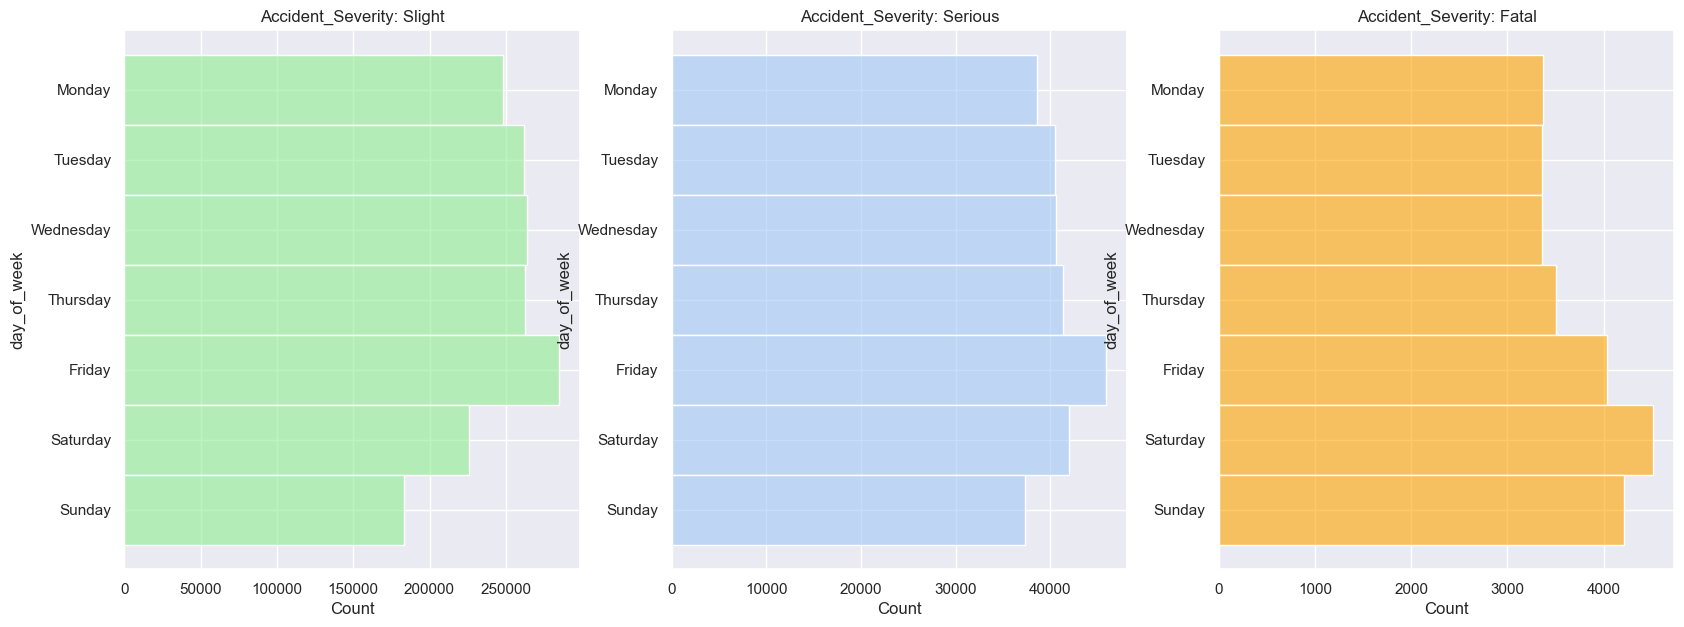

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='day_of_week', color='lightgreen',
             alpha=0.6, bins=7, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             y='day_of_week',
             alpha=0.6, bins=7, ax=ax[1]
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             y='day_of_week', color='orange',
             alpha=0.6, bins=7, ax=ax[2]
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see from the visuals that Friday's have the highest rates of **'Slight'** and **'Serious'** RTC's with the exception of **'Fatal'** RTC's.  
  
**'Fatal'** RTC's peak on Saturdays and Sundays.

#### New Features - **'day'** and **'month'**
Lets create the two features, **'day'** and **'month'**.

In [62]:
df_accident["day"] = df_accident["date"].apply(lambda x:x.day)
df_accident["month"] = df_accident["date"].apply(lambda x:x.month)
df_accident['month'] = pd.to_datetime(
                                      df_accident['month'], format='%m'
                                     ).dt.month_name().str.slice(stop=3)
df_accident.shape

(2042842, 29)

### Feature - **'day'**
Here we can have a look at the day of the month to see what trends we may have.

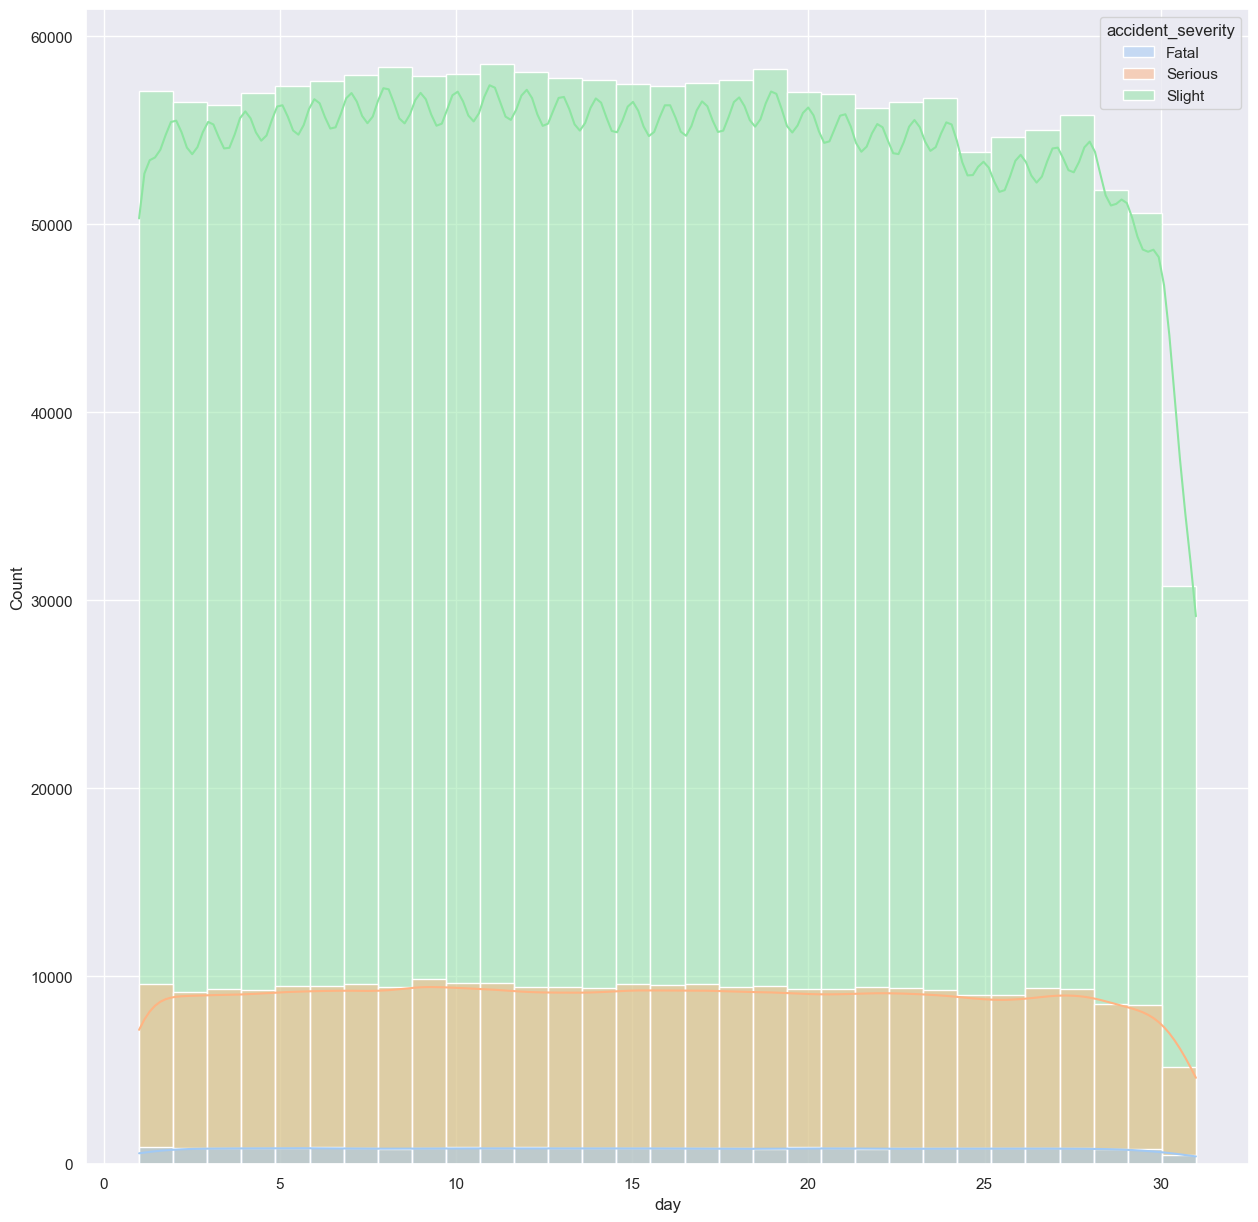

In [63]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='day',
                  palette='pastel', bins=31,
                  hue='accident_severity', kde=True
                  )

plt.show()

There is a very slight drop off from the 25th to the 30th of the month.  
  
The drop offs on the 31st is expected due to only being 7 per year.  
  
Lets see how **RTC** severity looks.

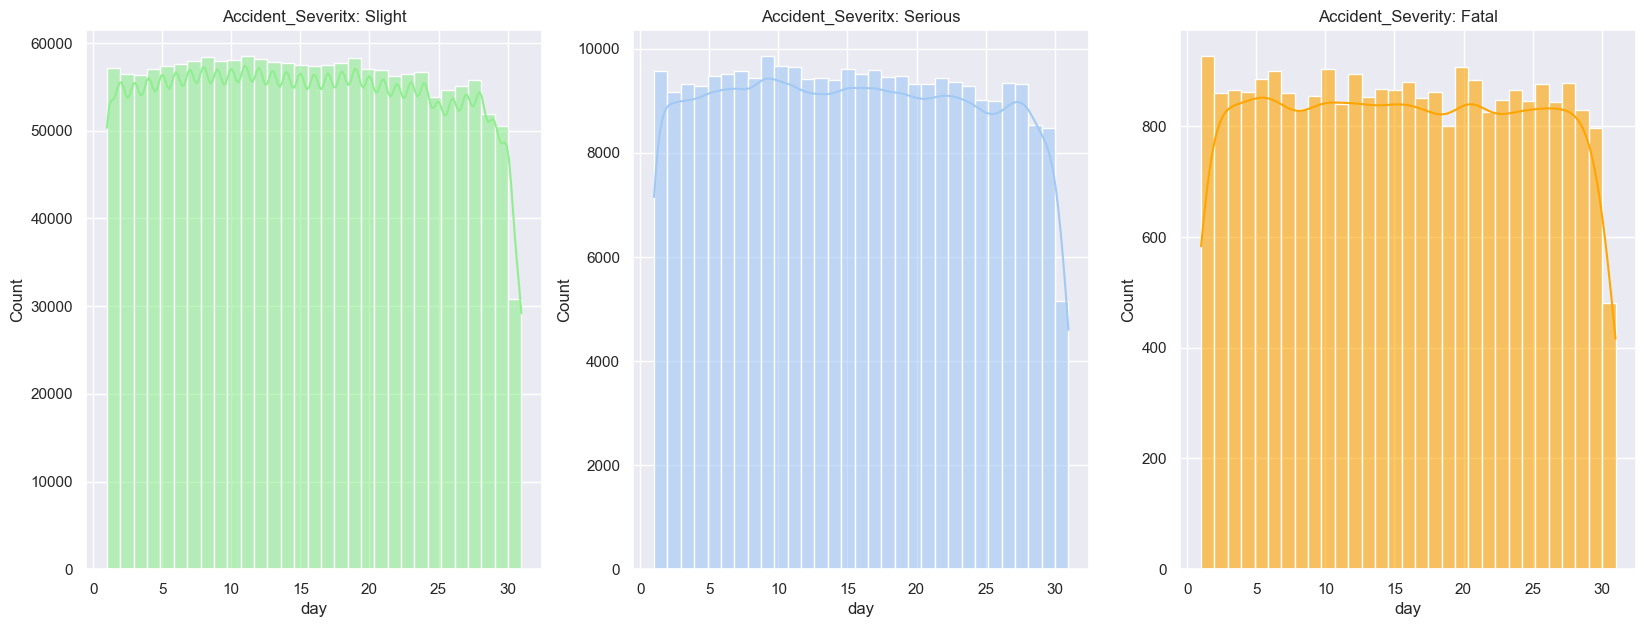

In [64]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             x='day', color='lightgreen',
             alpha=0.6, bins=31, ax=ax[0], kde=True,
             ).set(title=f"Accident_Severitx: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             x='day',
             alpha=0.6, bins=31, ax=ax[1], kde=True,
             ).set(title=f'Accident_Severitx: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             x='day', color='orange',
             alpha=0.6, bins=31, ax=ax[2], kde=True,
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

The visualisation of **RTC** severities does not reveal much.

### Feature - **'month'**

Lets check correlations against **'month'**.

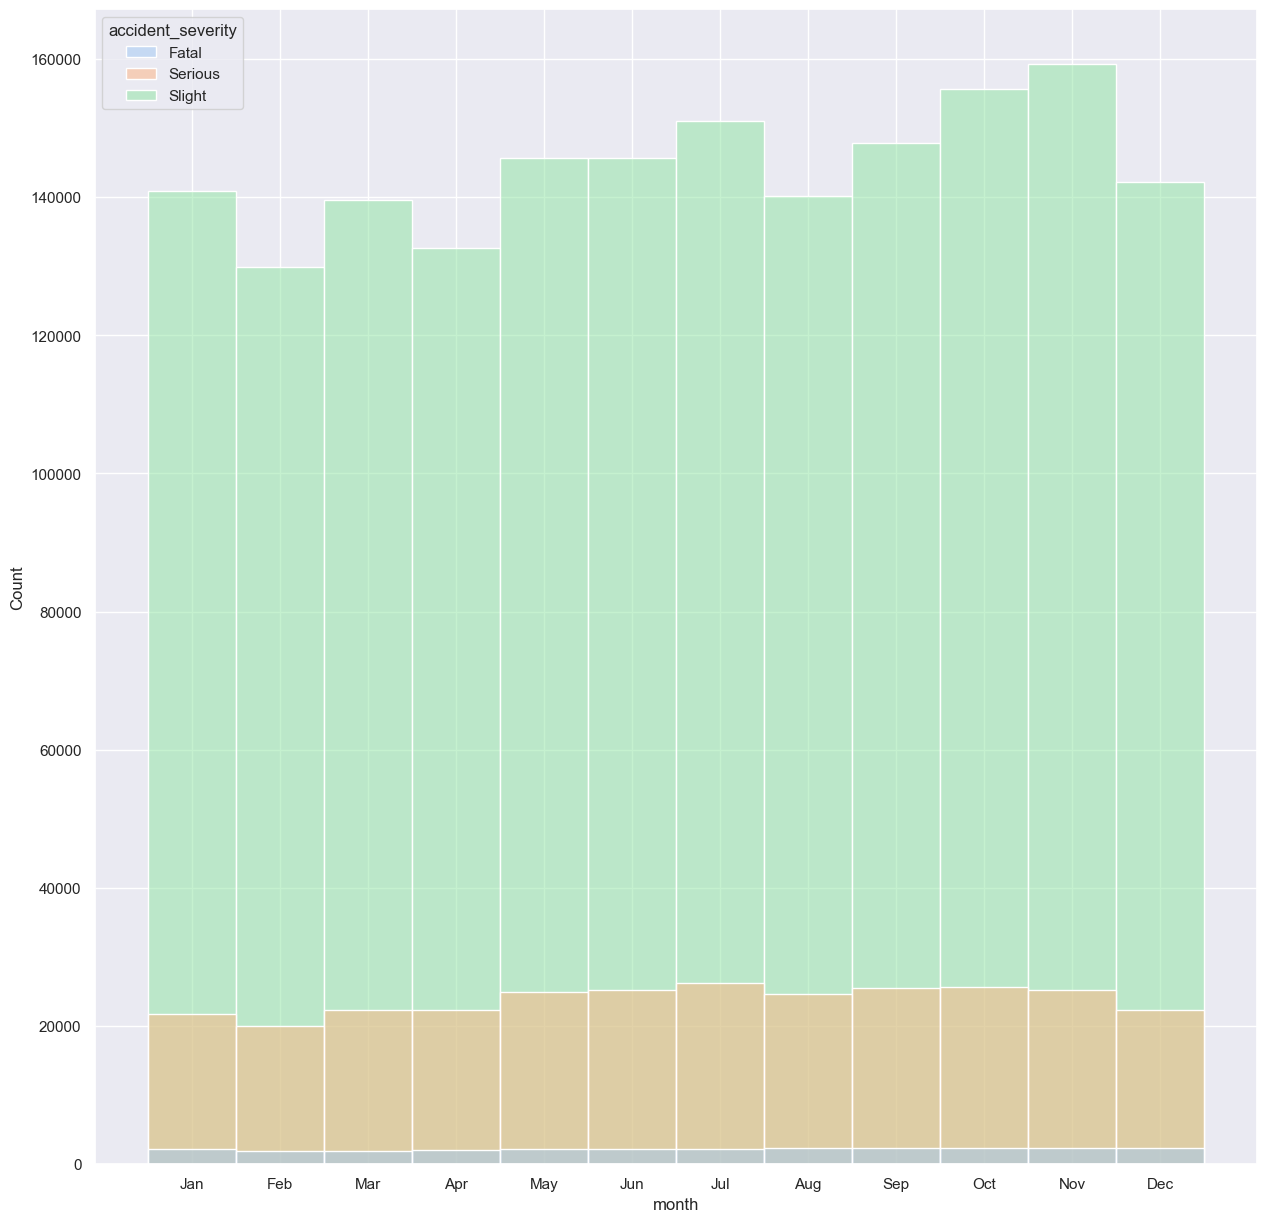

In [65]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='month',
                  palette='pastel', bins=12, hue='accident_severity'
                  )

plt.show()

We can see a rise leading towards the end of year, lets try and explore what is happening.  
  


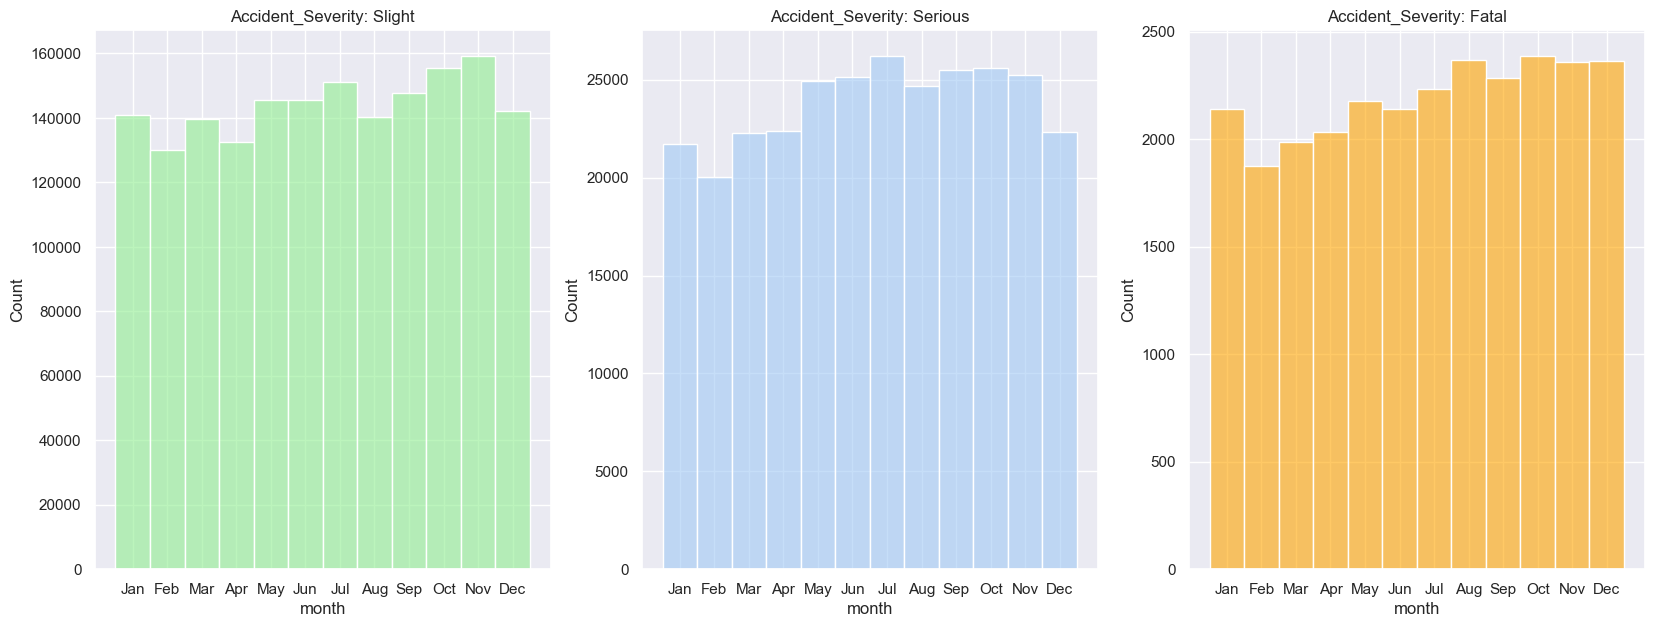

In [66]:
df_accident.month = pd.Categorical(values=df_accident.month,
                                    categories=['Jan', 'Feb', 'Mar', 'Apr',
                                                'May', 'Jun', 'Jul',
                                                'Aug', 'Sep', 'Oct',
                                                'Nov', 'Dec'
                                                ]
                                    ) # Set the order for the columns
df_accident.sort_values(['month'])

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             x='month', color='lightgreen',
             alpha=0.6, bins=12, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             x='month',
             alpha=0.6, bins=12, ax=ax[1],
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             x='month', color='orange',
             alpha=0.6, bins=12, ax=ax[2],
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see from the visualisations that there is a upward trend heading towards the end of the year.  
  
We can note that January does see a rise..


#### New Feature **'season'**
Lets create a new feature **'season'** with values, **'Spring', 'Summer', 'Autumn', and 'Winter'** to see if we can reveal a trend.

### Feature - **'season'**

In [67]:
df_accident["season"] = df_accident["month"].map({'Mar': "Spring", 'Apr': "Spring",
                                                  'May': "Spring", 'Jun': "Summer",
                                                  'Jul': "Summer", 'Aug': "Summer",
                                                  'Sep': "Autumn", 'Oct': "Autumn",
                                                  'Nov': "Autumn", 'Dec': "Winter",
                                                  'Jan': "Winter", 'Feb': "Winter"}
                                                 )
df_accident.shape

(2042842, 30)

Lets have a look at how the **RTC's** look.

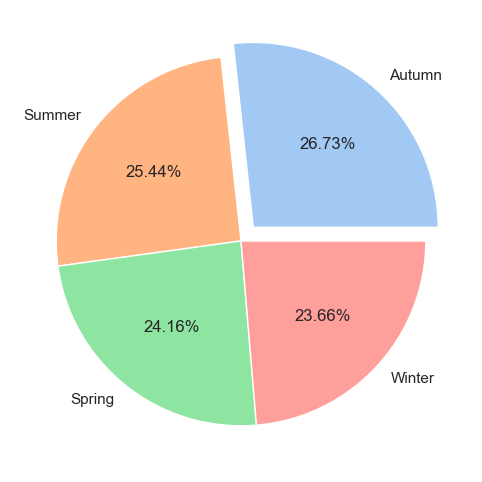

In [68]:
data = df_accident['season'].value_counts()
labels = ['Autumn', 'Summer', 'Spring', 'Winter']
colors = sns.color_palette('pastel')[0:4]
explode = [0.1, 0, 0, 0]

plt.pie(
    data, labels = labels, colors = colors,
    explode=explode, autopct='%.2f%%'
)

plt.show()

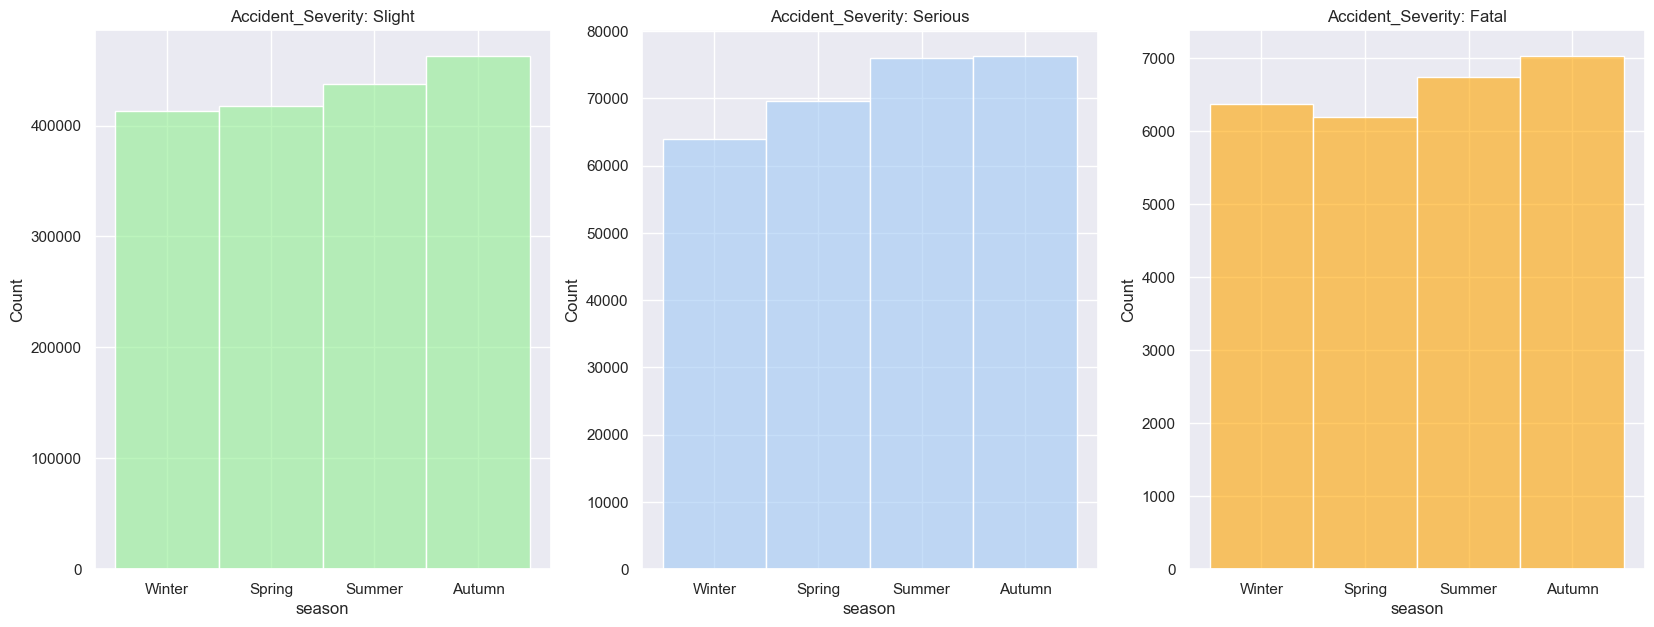

In [69]:
df_accident.season = pd.Categorical(values=df_accident.season,
                                    categories=['Winter', 'Spring',
                                                'Summer', 'Autumn'
                                                ]
                                    ) # Set the order for the column as you want
df_accident.sort_values(['season']) # Sort the column

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             x='season', color='lightgreen',
             alpha=0.6, bins=50, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             x='season',
             alpha=0.6, bins=50, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             x='season', color='orange',
             alpha=0.6, bins=50, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()  ## and plot

We can see by the visualisations that there is an increase across all of the severities of an **RTC** drawing towards **'Autumn'**.  
  
As from our previous visualisation we can see **'Serious'** **RTC's** starting to peak in **'Summer'**  
  
**'Summer'** and **'Autumn'** have the most RTC's..

#### New Feature **'bank_holidays'**
Lets have a look to see if UK Bank Holidays have an impact.

### Feature - **'bank_holidays'**

Lets take a look at the bank holiday breaks.  
To do this we will create a function that takes in the date of the start and end of the break, for example, Mayday is on a Monday, so the start of the break would be the previous Saturday and the duration would be 3.

In [70]:
def holidays(name, start, end, yr, days, svty):
    '''
    A function to compare average holiday RTC counts against
    average daily counts with percentage rise or fall

    Args:
        name (str): Name of the holiday, for example 'Easter'
        start (str): Start date of the holiday period. '%m/%d/%Y'
        end (str): End date of holiday period. '%m/%d/%Y'
        yr (int): year (range: 2005 - 2010)
        days (int): Length of holiday period
        svty (str): Severity (Slight, Serious, Fatal)
    '''
    holiday = len(
        df_accident[
            ((df_accident['accident_severity'] == svty)
            & (df_accident['date'] >= start))
            & ((df_accident['date'] <= end))
        ]
    ) / days
    severity = len(
        df_accident[
            ((df_accident['accident_severity'] ==  svty)
             & (df_accident['year'] == yr))
        ]
    ) / 365
    perc = (int(holiday) - int(severity)) / int(severity)

    print(
        'The average', svty, 'RTCs over', name, yr, 'were',
        int(holiday), 'per day.\nThe daily average for the year is',
        int(severity), 'fatal accidents per day, a change of ' f'{perc:.1%}\n'
    )

In [71]:
holidays('Easter', '03/25/2005', '03/28/2005', 2005, 4, 'Fatal')
holidays('Easter', '04/14/2006', '04/17/2006', 2006, 4, 'Fatal')
holidays('Easter', '04/06/2007', '04/09/2007', 2007, 4, 'Fatal')
holidays('Easter', '03/21/2008', '03/24/2008', 2008, 4, 'Fatal')
holidays('Easter', '04/10/2009', '04/13/2009', 2009, 4, 'Fatal')
holidays('Easter', '04/02/2010', '04/05/2010', 2010, 4, 'Fatal')

The average Fatal RTCs over Easter 2005 were 9 per day.
The daily average for the year is 7 fatal accidents per day, a change of 28.6%

The average Fatal RTCs over Easter 2006 were 8 per day.
The daily average for the year is 8 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Easter 2007 were 5 per day.
The daily average for the year is 7 fatal accidents per day, a change of -28.6%

The average Fatal RTCs over Easter 2008 were 4 per day.
The daily average for the year is 6 fatal accidents per day, a change of -33.3%

The average Fatal RTCs over Easter 2009 were 7 per day.
The daily average for the year is 5 fatal accidents per day, a change of 40.0%

The average Fatal RTCs over Easter 2010 were 5 per day.
The daily average for the year is 4 fatal accidents per day, a change of 25.0%



As we can see there is an increase in **fatal RTC's** over the **'Easter'** period for 4 of the 6 years.  
Over the six years it is about a **8%** rise.

In [72]:
holidays('Mayday', '04/30/2005', '05/02/2005', 2005, 3, 'Fatal')
holidays('Mayday', '04/29/2006', '05/01/2006', 2006, 3, 'Fatal')
holidays('Mayday', '05/05/2007', '05/07/2007', 2007, 3, 'Fatal')
holidays('Mayday', '05/03/2008', '05/05/2008', 2008, 3, 'Fatal')
holidays('Mayday', '05/02/2009', '05/04/2009', 2009, 3, 'Fatal')
holidays('Mayday', '05/01/2010', '05/03/2010', 2010, 3, 'Fatal')

The average Fatal RTCs over Mayday 2005 were 8 per day.
The daily average for the year is 7 fatal accidents per day, a change of 14.3%

The average Fatal RTCs over Mayday 2006 were 9 per day.
The daily average for the year is 8 fatal accidents per day, a change of 12.5%

The average Fatal RTCs over Mayday 2007 were 7 per day.
The daily average for the year is 7 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Mayday 2008 were 10 per day.
The daily average for the year is 6 fatal accidents per day, a change of 66.7%

The average Fatal RTCs over Mayday 2009 were 4 per day.
The daily average for the year is 5 fatal accidents per day, a change of -20.0%

The average Fatal RTCs over Mayday 2010 were 4 per day.
The daily average for the year is 4 fatal accidents per day, a change of 0.0%



As we can see there is an increase in **fatal RTC's** over the **'Mayday'** period for 3 of the 6 years.  
Over the six years it is about a **10%** rise.

In [73]:
holidays('Spring', '05/26/2005', '05/28/2005', 2005, 3, 'Fatal')
holidays('Spring', '05/25/2006', '05/27/2006', 2006, 3, 'Fatal')
holidays('Spring', '05/24/2007', '05/26/2007', 2007, 3, 'Fatal')
holidays('Spring', '05/22/2008', '05/24/2008', 2008, 3, 'Fatal')
holidays('Spring', '05/21/2009', '05/23/2009', 2009, 3, 'Fatal')
holidays('Spring', '05/27/2010', '05/29/2010', 2010, 3, 'Fatal')

The average Fatal RTCs over Spring 2005 were 9 per day.
The daily average for the year is 7 fatal accidents per day, a change of 28.6%

The average Fatal RTCs over Spring 2006 were 5 per day.
The daily average for the year is 8 fatal accidents per day, a change of -37.5%

The average Fatal RTCs over Spring 2007 were 9 per day.
The daily average for the year is 7 fatal accidents per day, a change of 28.6%

The average Fatal RTCs over Spring 2008 were 4 per day.
The daily average for the year is 6 fatal accidents per day, a change of -33.3%

The average Fatal RTCs over Spring 2009 were 5 per day.
The daily average for the year is 5 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Spring 2010 were 7 per day.
The daily average for the year is 4 fatal accidents per day, a change of 75.0%



As we can see there is an increase in **fatal RTC's** over the **'Spring'** period for 3 of the 6 years.  
Over the six years it is about a **3%** rise.

In [74]:
holidays('Summer Break', '08/28/2005', '08/30/2005', 2005, 3, 'Fatal')
holidays('Summer Break', '08/26/2006', '08/28/2006', 2006, 3, 'Fatal')
holidays('Summer Break', '08/25/2007', '08/27/2007', 2007, 3, 'Fatal')
holidays('Summer Break', '08/23/2008', '08/25/2008', 2008, 3, 'Fatal')
holidays('Summer Break', '08/29/2009', '08/31/2009', 2009, 3, 'Fatal')
holidays('Summer Break', '08/28/2010', '08/30/2010', 2010, 3, 'Fatal')

The average Fatal RTCs over Summer Break 2005 were 7 per day.
The daily average for the year is 7 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Summer Break 2006 were 13 per day.
The daily average for the year is 8 fatal accidents per day, a change of 62.5%

The average Fatal RTCs over Summer Break 2007 were 12 per day.
The daily average for the year is 7 fatal accidents per day, a change of 71.4%

The average Fatal RTCs over Summer Break 2008 were 5 per day.
The daily average for the year is 6 fatal accidents per day, a change of -16.7%

The average Fatal RTCs over Summer Break 2009 were 7 per day.
The daily average for the year is 5 fatal accidents per day, a change of 40.0%

The average Fatal RTCs over Summer Break 2010 were 7 per day.
The daily average for the year is 4 fatal accidents per day, a change of 75.0%



As we can see there is an increase in **fatal RTC's** over the **'Summer Bank Holiday'** period for 4 of the 6 years.  
Over the six years it is about a **34%** rise.

In [75]:
holidays('Christmas and New Year', '12/24/2005', '01/02/2006', 2006, 10, 'Fatal')
holidays('Christmas and New Year', '12/23/2006', '01/01/2007', 2007, 10, 'Fatal')
holidays('Christmas and New Year', '12/25/2007', '01/01/2008', 2008, 8, 'Fatal')
holidays('Christmas and New Year', '12/25/2008', '01/01/2009', 2009, 8, 'Fatal')
holidays('Christmas and New Year', '12/25/2009', '01/01/2010', 2010, 8, 'Fatal')

The average Fatal RTCs over Christmas and New Year 2006 were 6 per day.
The daily average for the year is 8 fatal accidents per day, a change of -25.0%

The average Fatal RTCs over Christmas and New Year 2007 were 7 per day.
The daily average for the year is 7 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Christmas and New Year 2008 were 4 per day.
The daily average for the year is 6 fatal accidents per day, a change of -33.3%

The average Fatal RTCs over Christmas and New Year 2009 were 5 per day.
The daily average for the year is 5 fatal accidents per day, a change of 0.0%

The average Fatal RTCs over Christmas and New Year 2010 were 3 per day.
The daily average for the year is 4 fatal accidents per day, a change of -25.0%



As we can see there is an decrease in **fatal RTC's** over the **'Christmas and New Year'** period for 3 of the 5 years.  
Over the six years it is about a **19%** reduction. (excluded 2005 as not a full period and does not include Christmas 2010)

### Feature - **'junction_detail'**

Lets check the the data type and values.

In [76]:
df_accident['junction_detail'].dtype

CategoricalDtype(categories=['Crossroads', 'Data missing or out of range',
                  'Mini-roundabout', 'More than 4 arms (not roundabout)',
                  'Not at junction or within 20 metres', 'Other junction',
                  'Private drive or entrance', 'Roundabout', 'Slip road',
                  'T or staggered junction'],
, ordered=False)

In [77]:
df_accident['junction_detail'].value_counts(dropna=False, ascending=False)

Not at junction or within 20 metres    825728
T or staggered junction                634031
Crossroads                             195853
Roundabout                             176949
Private drive or entrance               72672
Other junction                          59585
Slip road                               30011
More than 4 arms (not roundabout)       25472
Mini-roundabout                         22378
Data missing or out of range              163
Name: junction_detail, dtype: int64

We appear to have a nice set of values with the exception of **'Data missing or out of range'**.  
  
As there are only four of these, we will replace with them with the `mode` (Not at junction or within 20 metres).

In [78]:
df_accident['junction_detail'].replace('Data missing or out of range', 'Not at junction or within 20 metres', inplace=True)
df_accident['junction_detail'].value_counts(dropna=False, ascending=False)

Not at junction or within 20 metres    825891
T or staggered junction                634031
Crossroads                             195853
Roundabout                             176949
Private drive or entrance               72672
Other junction                          59585
Slip road                               30011
More than 4 arms (not roundabout)       25472
Mini-roundabout                         22378
Name: junction_detail, dtype: int64

Lets visualise the data.

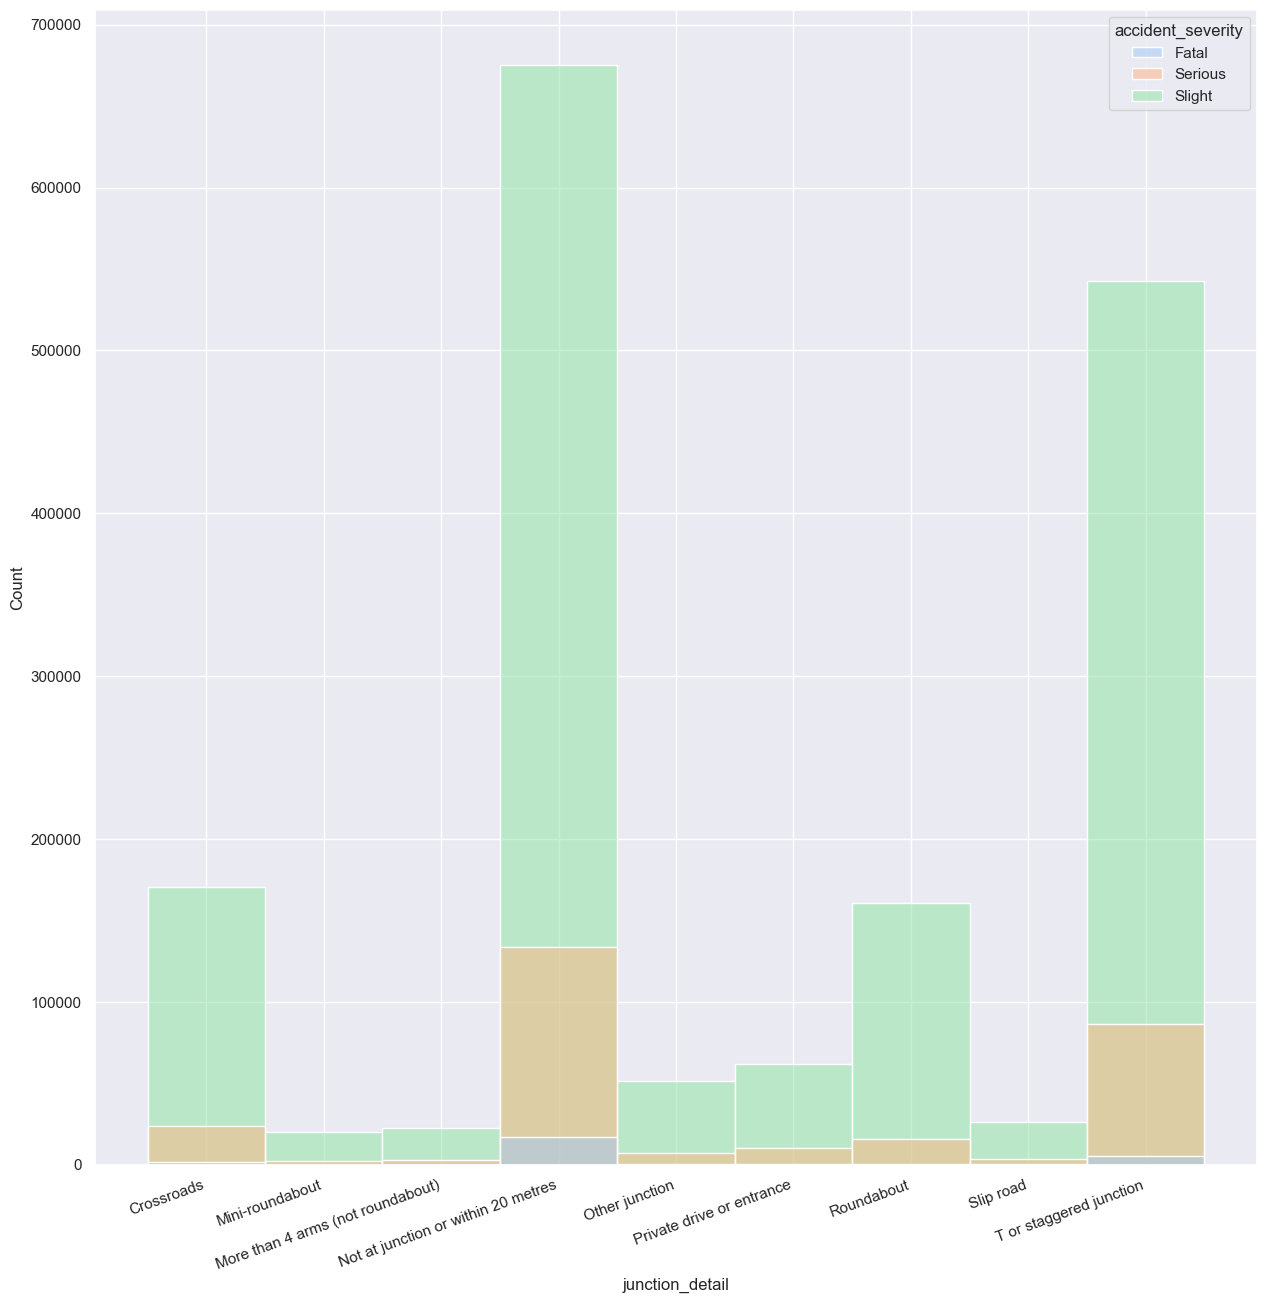

In [79]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=df_accident, x='junction_detail', bins=5, hue='accident_severity')

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
plt.show()


We can see that **RTC's** are more inclined to happen **'Not at junction or within 20 metres'** or **'T or staggered junction'**.  
  
**'Serious'** and **'Fatal'** **'RTC's'** are also more inclined to happen at these junction types.

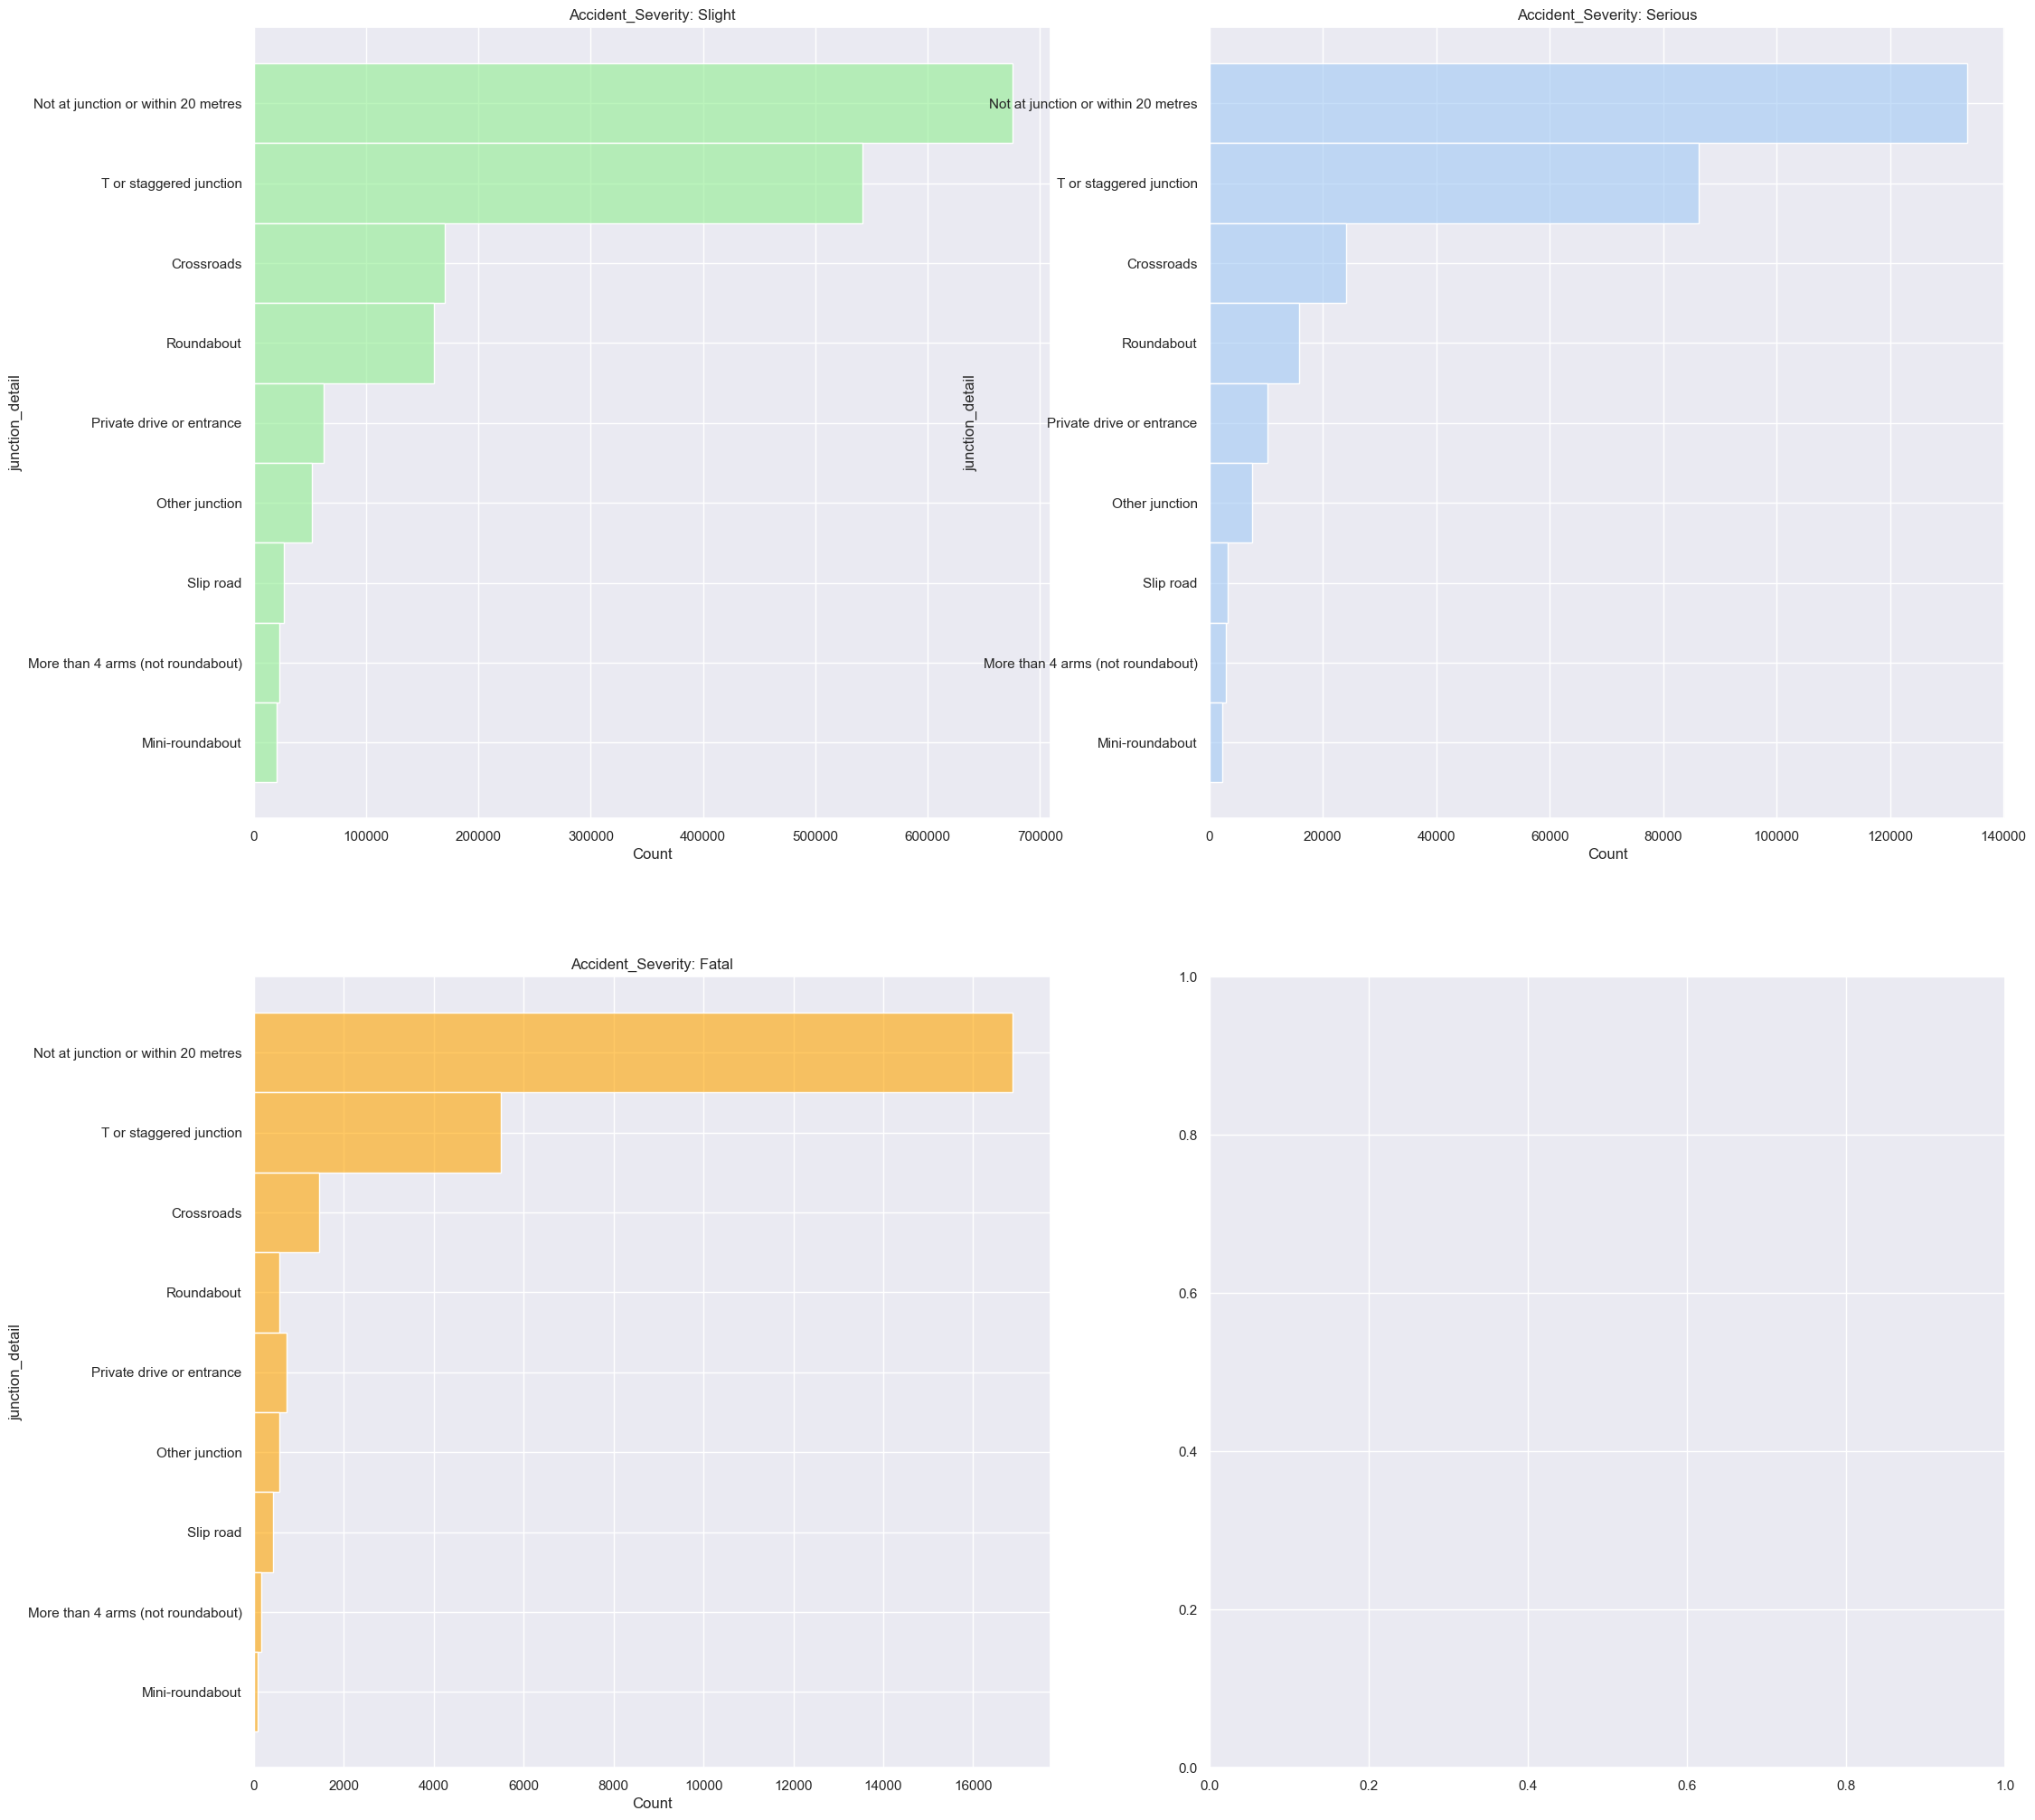

In [80]:
df_accident.junction_detail = pd.Categorical(values=df_accident.junction_detail,
                                             categories=[
                                                'Not at junction or within 20 metres',
                                                'T or staggered junction',
                                                'Crossroads',
                                                'Roundabout',
                                                'Private drive or entrance',
                                                'Other junction',
                                                'Slip road',
                                                'More than 4 arms (not roundabout)',
                                                'Mini-roundabout',
                                                'Authorised person'
                                             ]
                                             ) # Sort the attributes
df_accident.sort_values(['junction_detail']) # Sort the column

fig, ax = plt.subplots(2, 2, figsize=(25, 25))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='junction_detail', color='lightgreen',
             alpha=0.6, bins=50, ax=ax[0, 0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='junction_detail',
             alpha=0.6, bins=50, ax=ax[0, 1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='junction_detail', color='orange',
             alpha=0.6, bins=50, ax=ax[1, 0]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'junction_control'**

Lets check the data type and values.

In [81]:
df_accident['junction_control'].dtype

CategoricalDtype(categories=['Authorised person', 'Auto traffic signal',
                  'Data missing or out of range', 'Give way or uncontrolled',
                  'Not at junction or within 20 metres', 'Stop sign'],
, ordered=False)

In [82]:
df_accident['junction_control'].value_counts(dropna=False, ascending=False)

Give way or uncontrolled               987469
Data missing or out of range           751196
Auto traffic signal                    210913
Not at junction or within 20 metres     77302
Stop sign                               12311
Authorised person                        3651
Name: junction_control, dtype: int64

We appear to have two similar features **'Auto traffic signal'** and **'Auto traffic sigl'**. This appears to be a typo so lets merge the values.  
  
We also have two values, **'Not at junction or within 20 metres'** and **'Data missing or out of range'**. The Police reporting form only has four options:
- Give way or uncontrolled
- Auto traffic signal
- Stop sign
- Authorised person

We will assume that the absence of an entry on the form indicates none of the four options were valid.  
  
Lets merge **'Data missing or out of range'** with **'Not at junction or within 20 metres'**.

In [83]:
df_accident[
      "junction_control"
] = df_accident[
      "junction_control"
].map({"Auto traffic sigl": "Auto traffic signal"}
      ).fillna(df_accident["junction_control"])

df_accident[
      "junction_control"
] = df_accident[
      "junction_control"
].map({"Data missing or out of range": "Not at junction or within 20 metres"}
      ).fillna(df_accident["junction_control"])

df_accident['junction_control'].value_counts(dropna=False, ascending=False)

Give way or uncontrolled               987469
Not at junction or within 20 metres    828498
Auto traffic signal                    210913
Stop sign                               12311
Authorised person                        3651
Name: junction_control, dtype: int64

Now we have cleaned up the feature lets see how this looks against **'Severity'**.

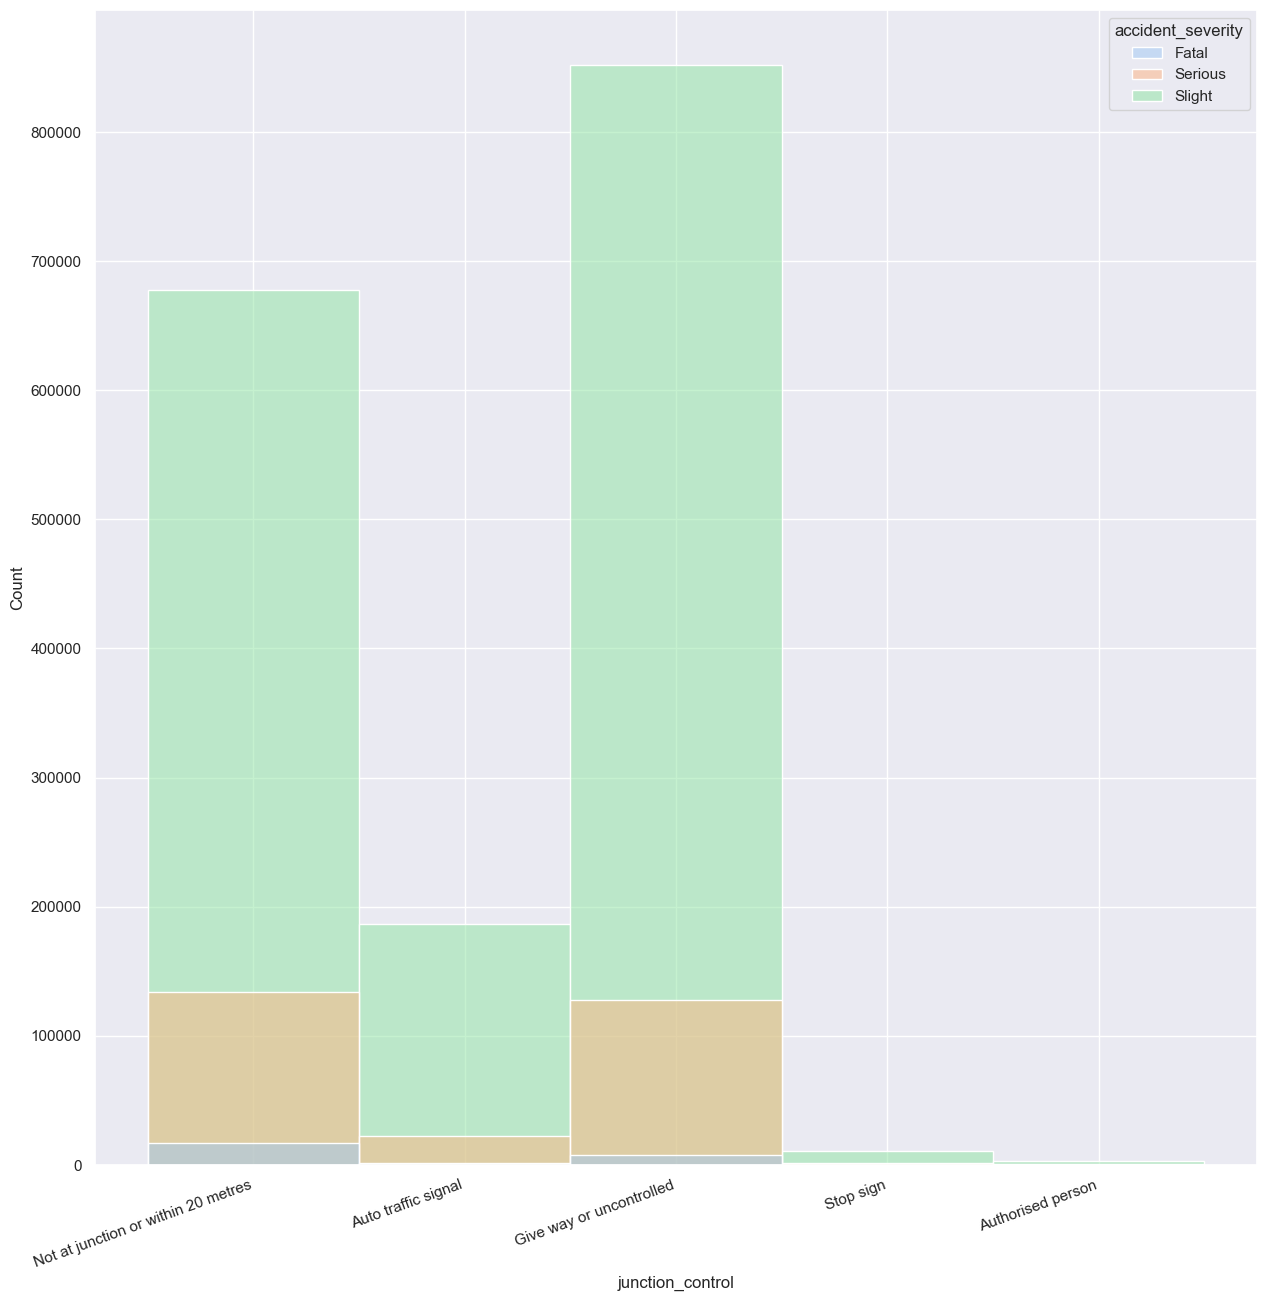

In [84]:
plt.figure(figsize=(15,15))
ax = sns.histplot(
    data=df_accident, x='junction_control',
    bins=5, hue='accident_severity'
    )

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
None

plt.show()

We can see that most **RTC's** happen at a **'give way'** or **'uncontrolled junction'**.  
  
Lets check individual values against **'severity'**.

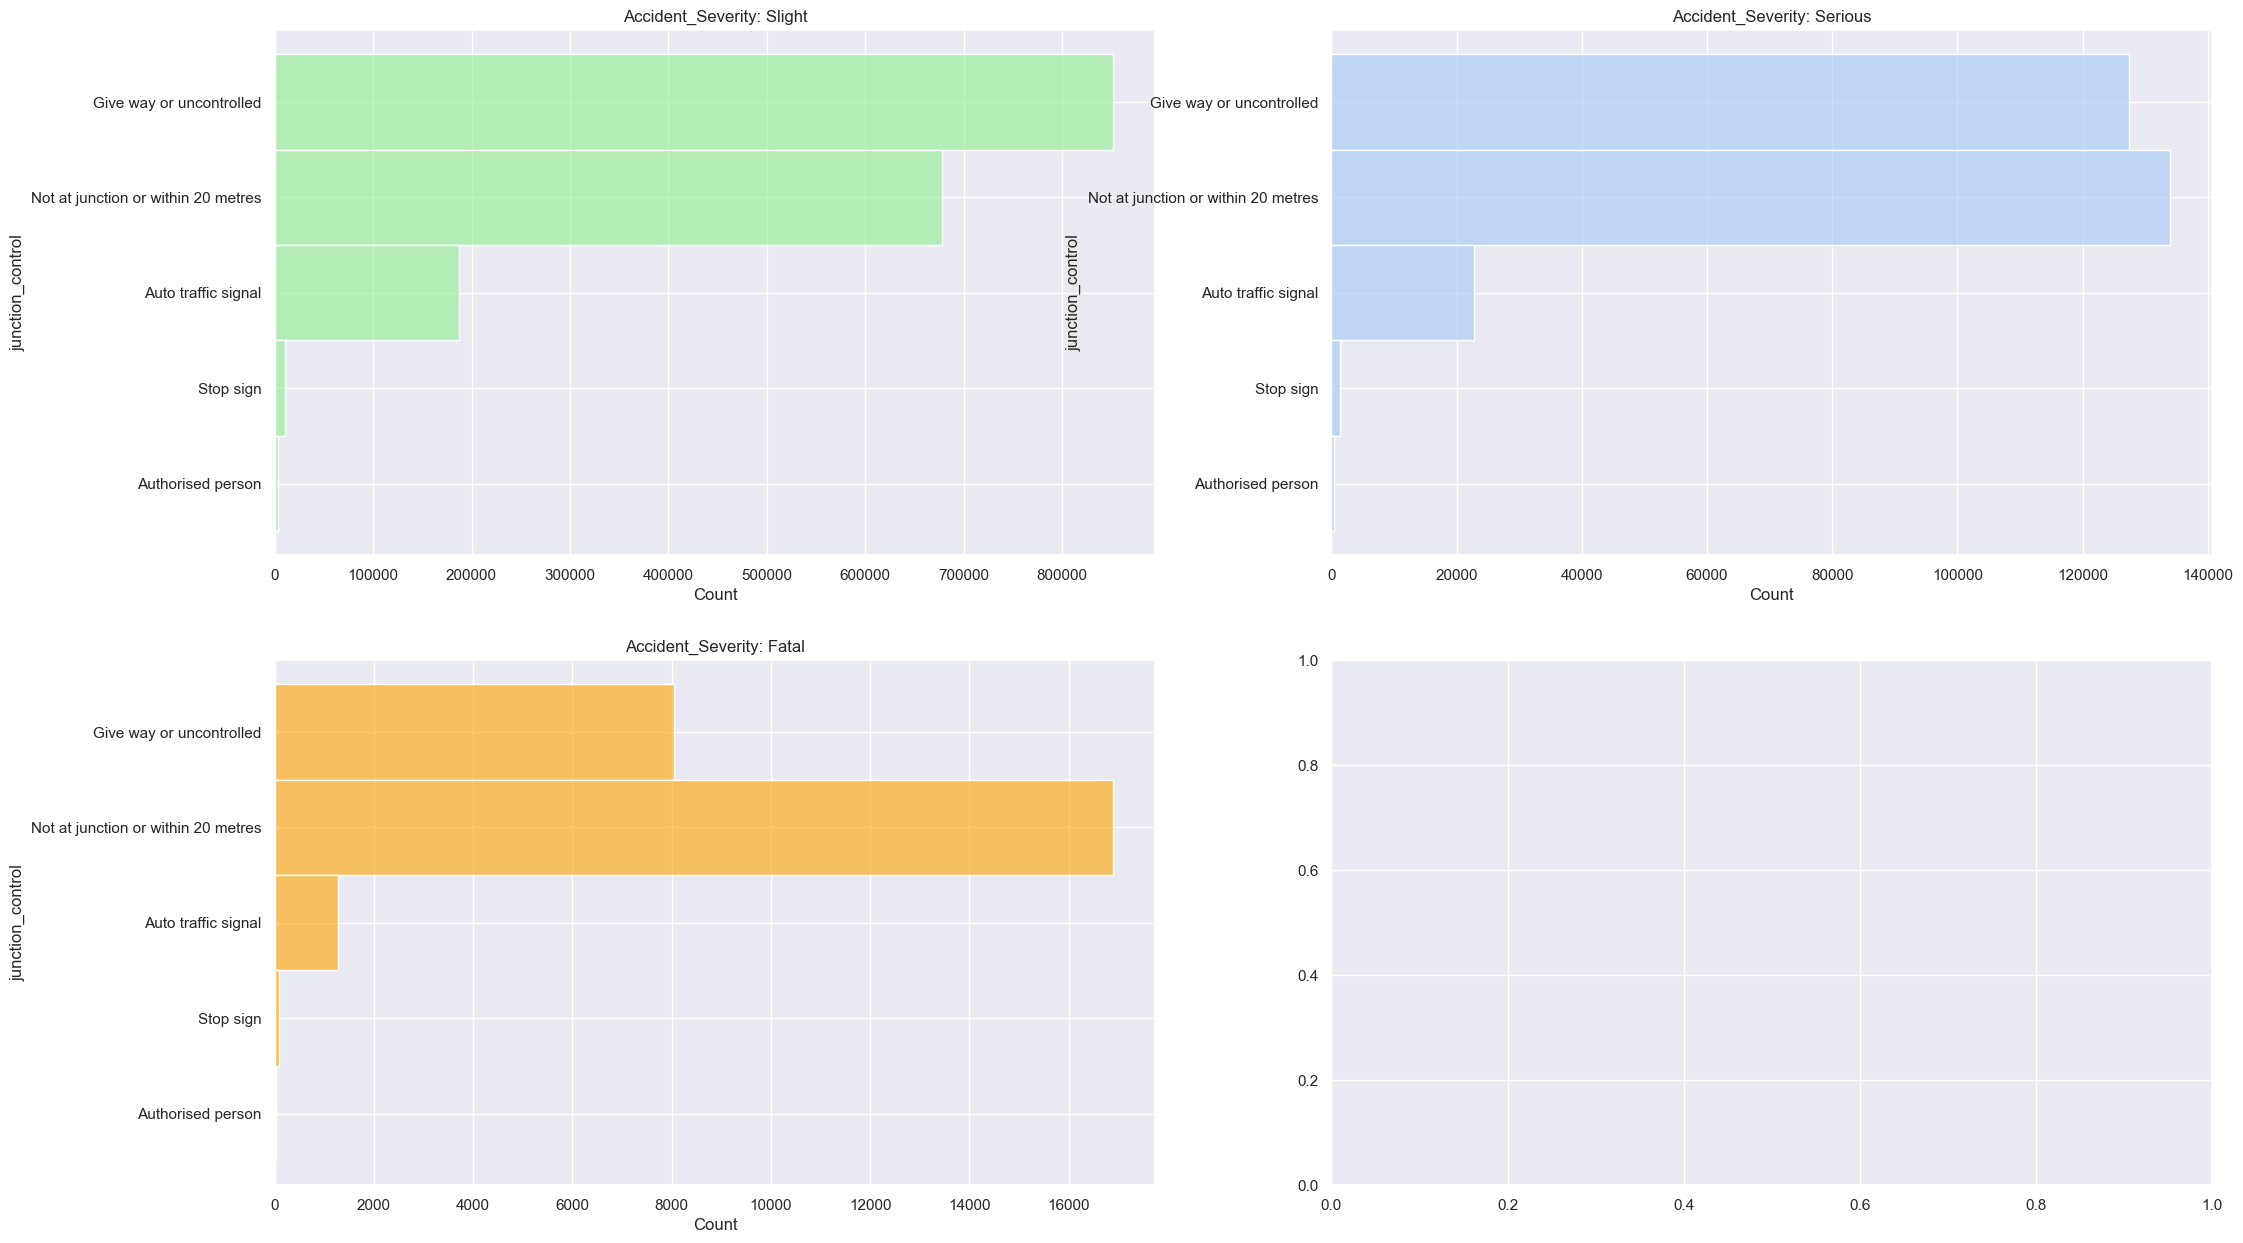

In [85]:
df_accident.junction_control = pd.Categorical(
       values=df_accident.junction_control,
       categories=['Give way or uncontrolled',
                   'Not at junction or within 20 metres',
                   'Auto traffic signal',
                   'Stop sign',
                   'Authorised person'
                  ]
) # Set the order for the column
df_accident.sort_values(['junction_control']) # Sort the column

fig, ax = plt.subplots(2, 2, figsize=(25, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='junction_control', color='lightgreen',
             alpha=0.6, bins=50, ax=ax[0, 0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='junction_control',
             alpha=0.6, bins=50, ax=ax[0, 1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='junction_control', color='orange',
             alpha=0.6, bins=50, ax=ax[1, 0]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

Lets have a look at the correlations between **'junction_control'** and **'junction_detail'**.

In [86]:
df_accident.groupby('junction_control')['junction_detail'].value_counts(ascending=True)

junction_control                     junction_detail                    
Give way or uncontrolled             Authorised person                           0
                                     Not at junction or within 20 metres       103
                                     More than 4 arms (not roundabout)       10096
                                     Mini-roundabout                         21905
                                     Slip road                               27626
                                     Other junction                          49982
                                     Private drive or entrance               70084
                                     Crossroads                              94864
                                     Roundabout                             155173
                                     T or staggered junction                557636
Not at junction or within 20 metres  Authorised person                           0
              

We can see some anomalies in the **Not at junction or within 20 metres** values.  
  
As stated in the Police instructions if **Not at junction or within 20 metres** is selected then **no** options in **junction_detail** should be selected.


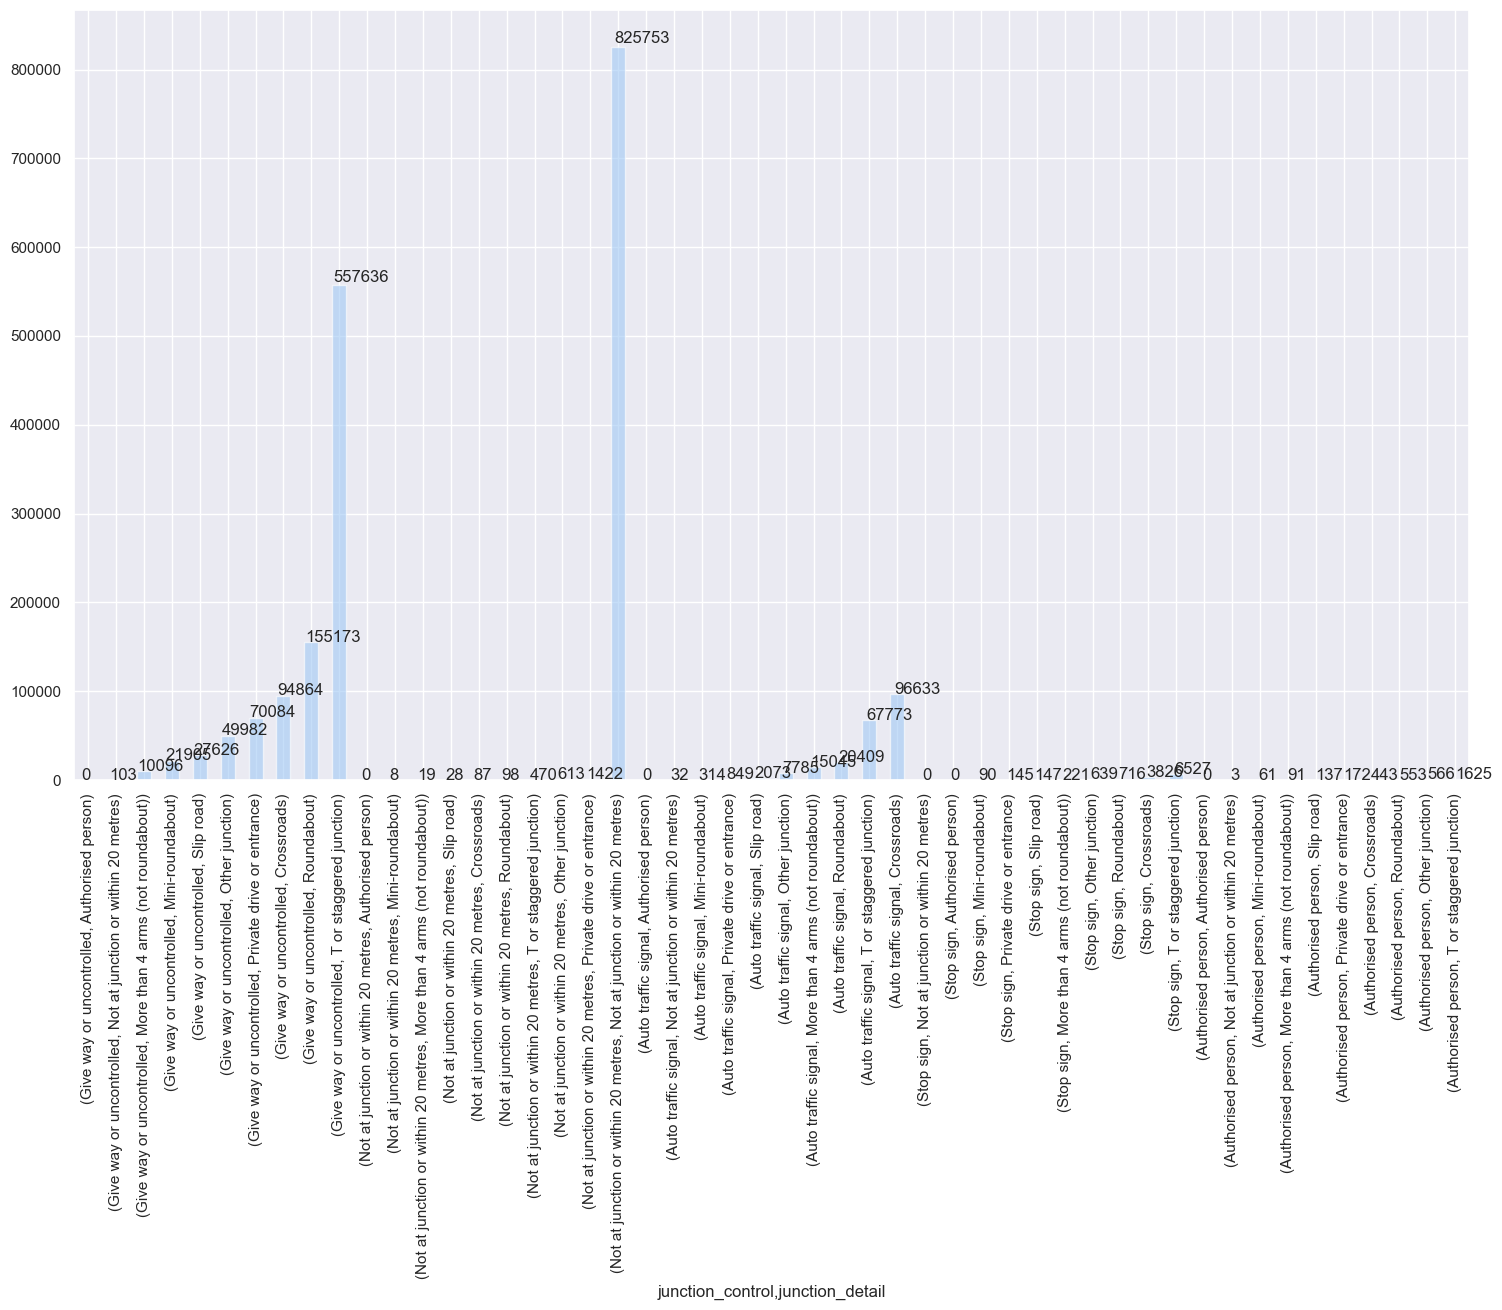

In [87]:
plt.figure(figsize=(18,10))

ax = df_accident.groupby(
    'junction_control'
)['junction_detail'].value_counts(ascending=True).plot(kind='bar', alpha=0.6)
for p in ax.patches:
    ax.annotate(
        str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)
                )

plt.show()

We can see two areas of concern here, **Not at junction or within 20 metres** and **Give way or uncontrolled**.  
  
**Not at junction or within 20 metres** and **Not at junction or within 20 metres** have the highest correlation as expected.  
  
**Give way or uncontrolled** and **T or staggered junction** also have a high correlation.  
  
The junction type with the highest number of accidents is **T or staggered junction**.



### Feature - **'carriageway_hazards'**

In [88]:
df_accident['carriageway_hazards'].value_counts(dropna=False,ascending=False)

None                                               2005662
Other object on road                                 16091
Any animal in carriageway (except ridden horse)      10406
Pedestrian in carriageway - not injured               4682
Previous accident                                     3104
Vehicle load on road                                  2382
Data missing or out of range                           515
Name: carriageway_hazards, dtype: int64

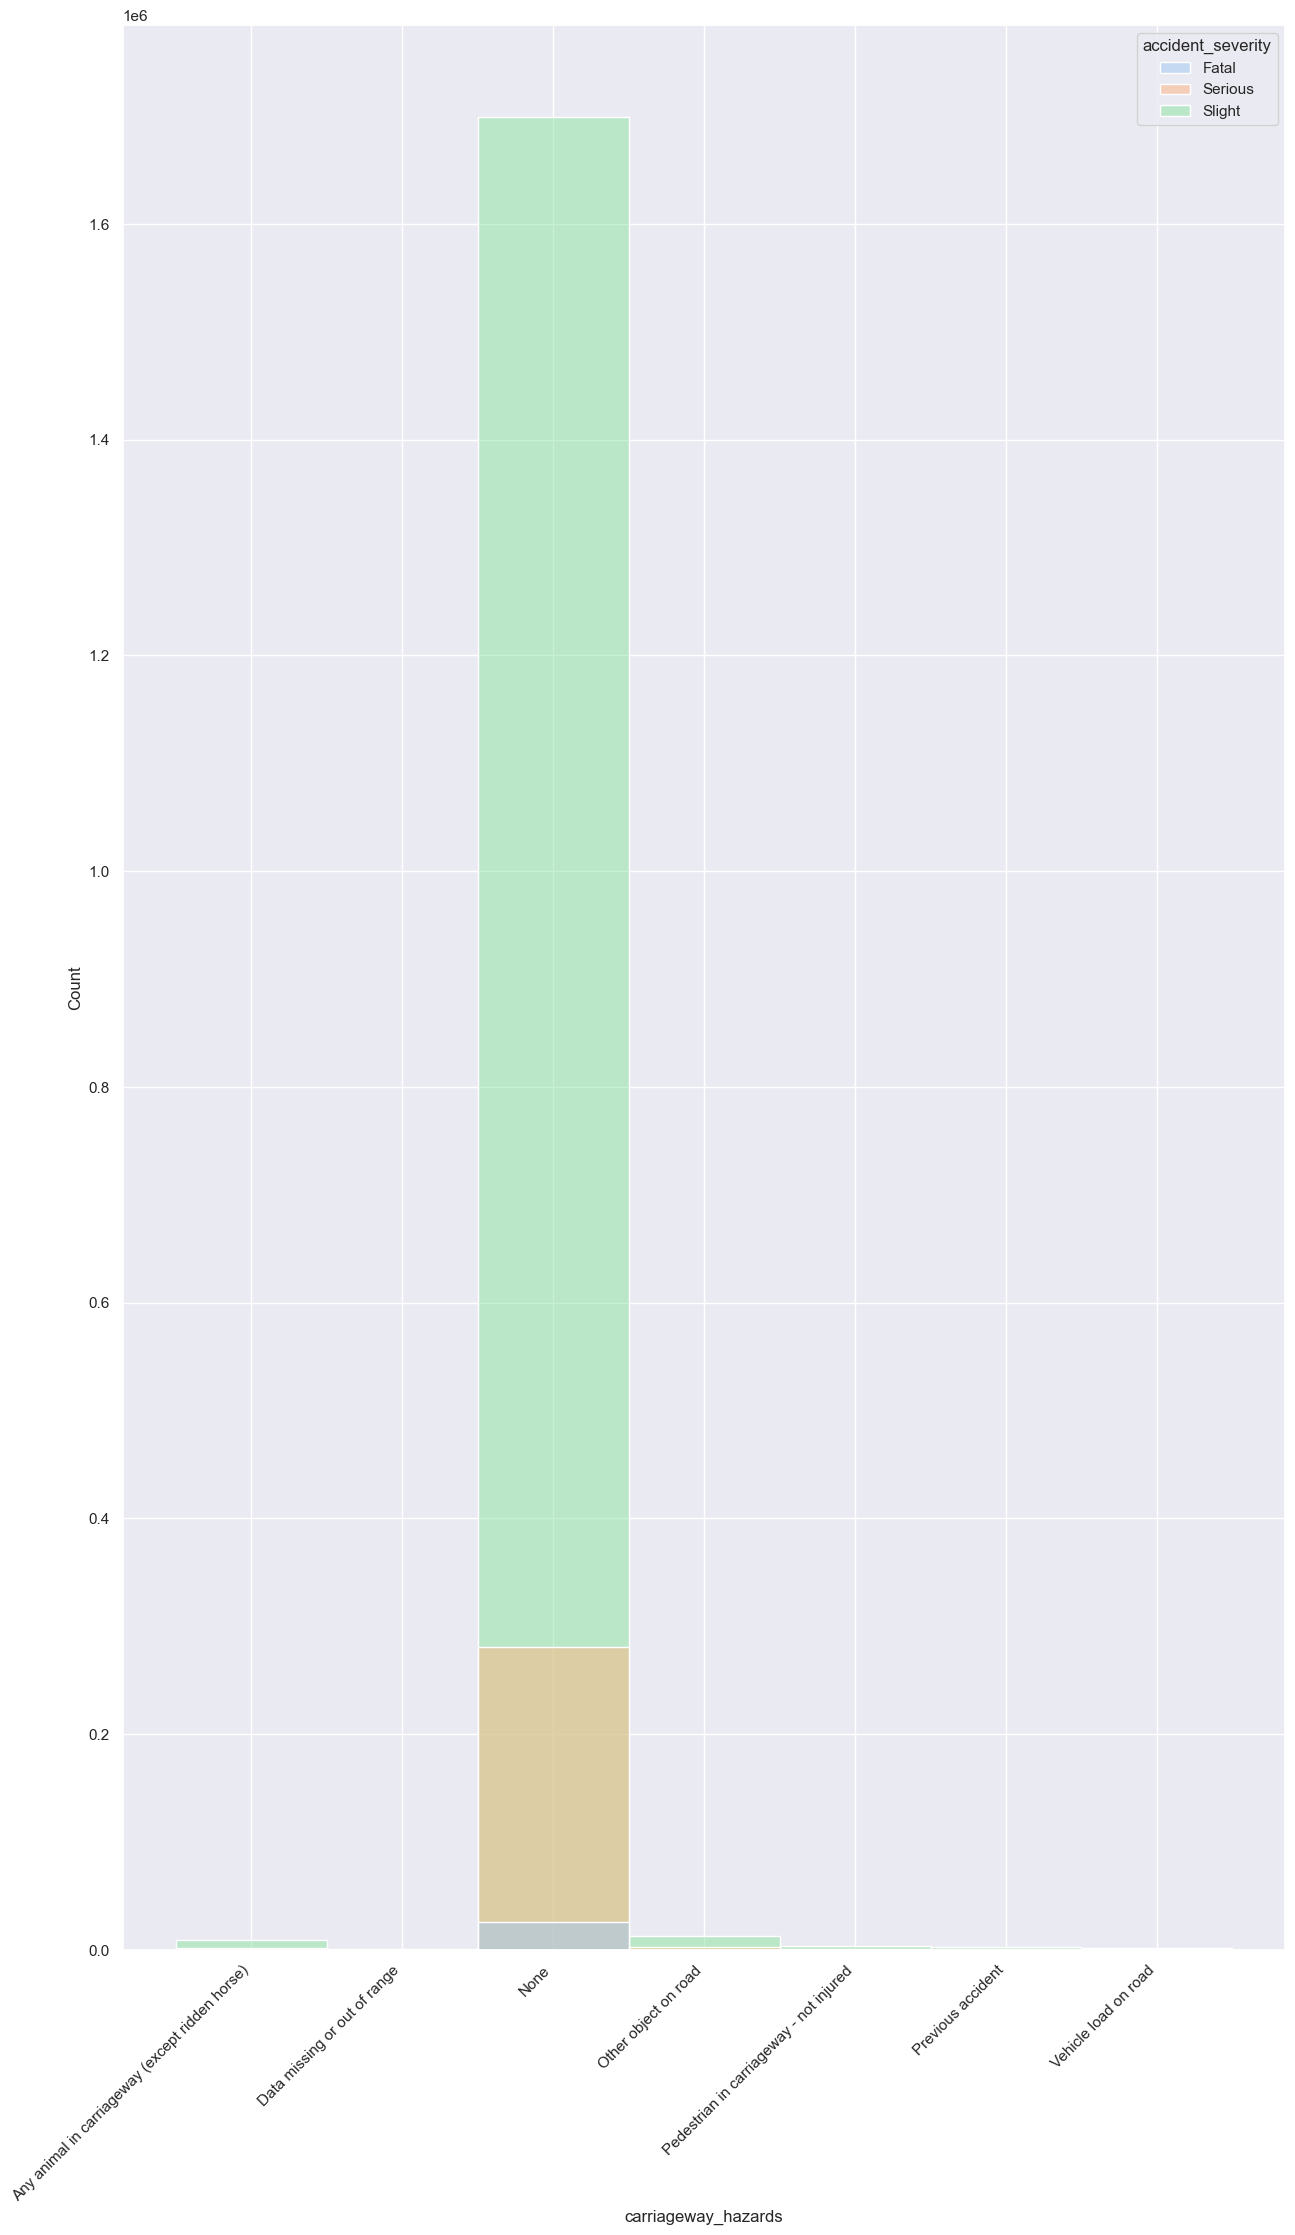

In [89]:
plt.figure(figsize=(15,25))
ax = sns.histplot(data=df_accident,
                  x='carriageway_hazards',
                  hue='accident_severity'
                  )
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right'
                   )
None

plt.show()

We can see that most RTC's happen when there are no carriageway hazards.  
  
Lets take a look at each carriageway hazard to see if we can uncover anything.

In [90]:
df_accident.groupby(
    'carriageway_hazards'
)['accident_severity'].value_counts(ascending=True)

carriageway_hazards                              accident_severity
Any animal in carriageway (except ridden horse)  Fatal                     87
                                                 Serious                 1489
                                                 Slight                  8830
Data missing or out of range                     Fatal                      3
                                                 Serious                   42
                                                 Slight                   470
None                                             Fatal                  25764
                                                 Serious               280545
                                                 Slight               1699353
Other object on road                             Fatal                    274
                                                 Serious                 2546
                                                 Slight                 132

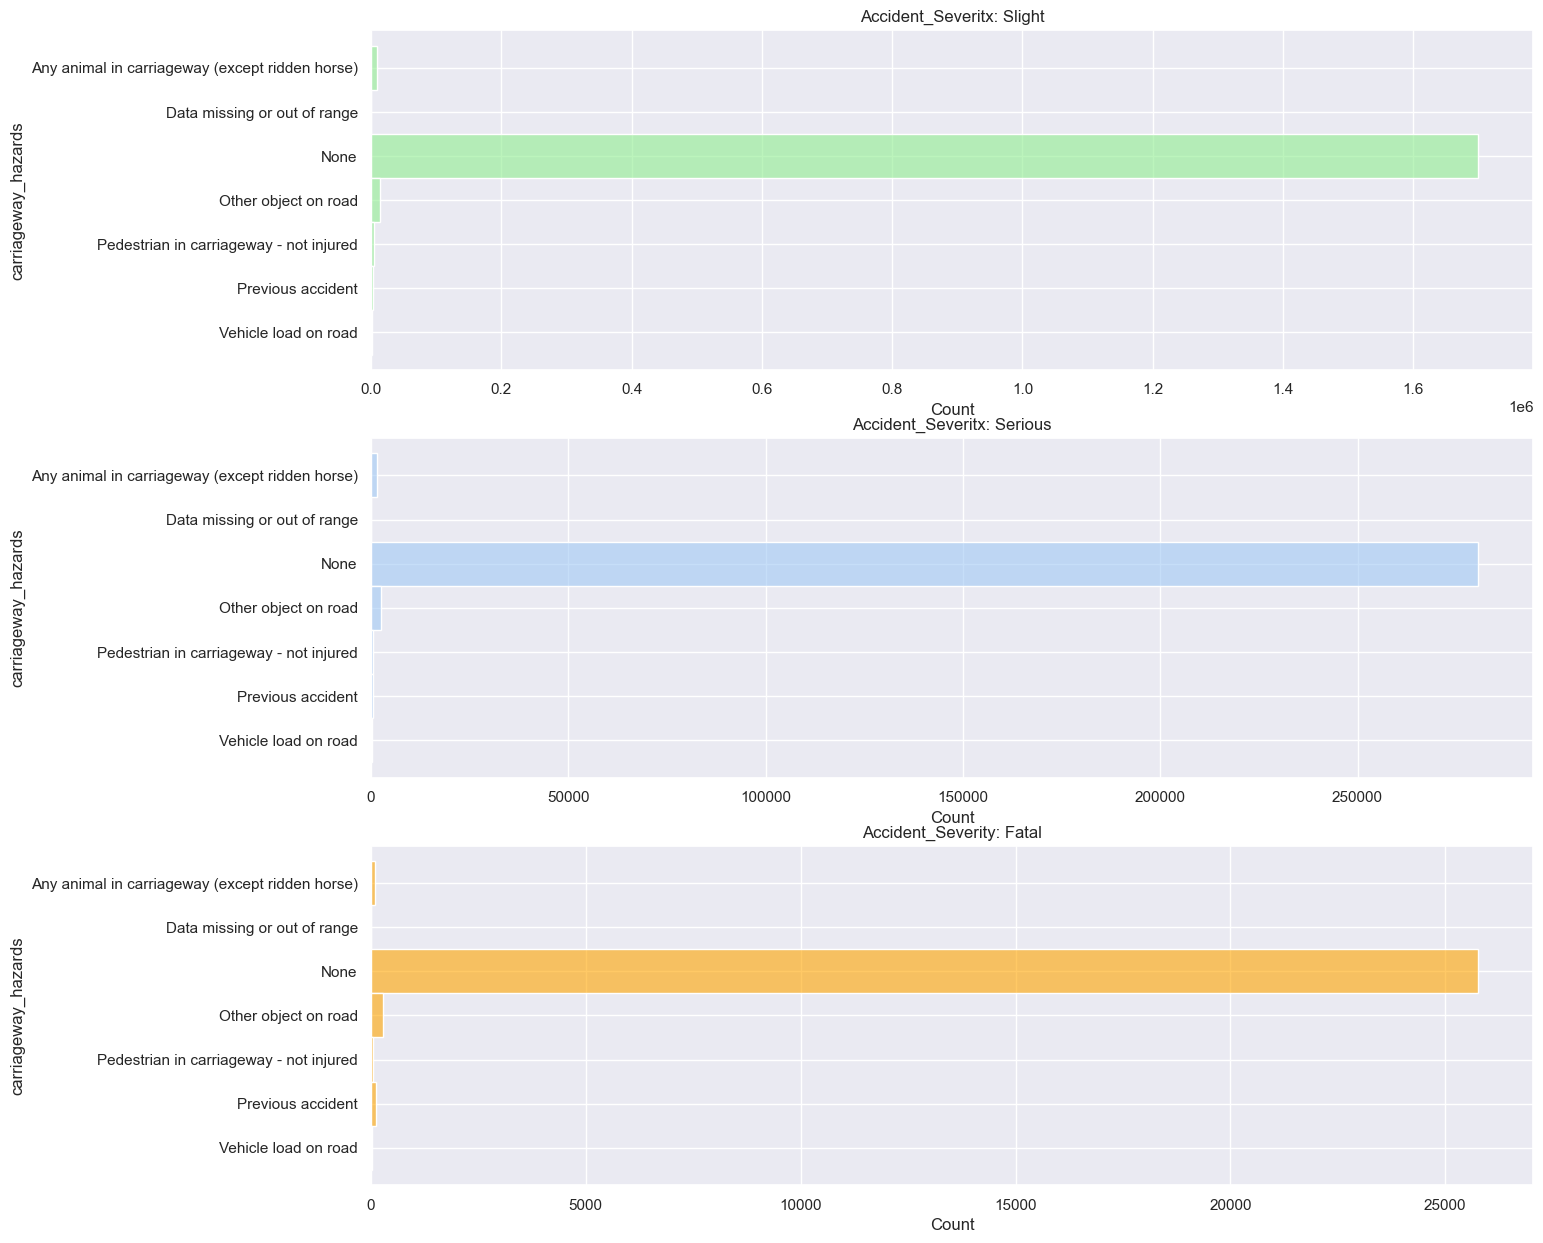

In [91]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='carriageway_hazards', color='lightgreen',
             alpha=0.6, bins=31, ax=ax[0],
             ).set(title=f"Accident_Severitx: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             y='carriageway_hazards',
             alpha=0.6, bins=31, ax=ax[1],
             ).set(title=f'Accident_Severitx: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             y='carriageway_hazards', color='orange',
             alpha=0.6, bins=31, ax=ax[2],
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see here from the visualisations that the severity of an RTC rises when there is both an object on the road and when there is a previous accident.  
  
Fatal accidents are more likely to happen when there is a previous accident.

### Feature - **'special_conditions_at_site'**

Lets have a look at the values.

In [92]:
df_accident['special_conditions_at_site'].value_counts(ascending=False)

None                                          1993006
Roadworks                                       23501
Oil or diesel                                    6792
Mud                                              6355
Road surface defective                           4800
Auto traffic signal - out                        3850
Road sign or marking defective or obscured       2929
Auto signal part defective                       1011
Data missing or out of range                      598
Name: special_conditions_at_site, dtype: int64

We appear to have two sets of similar features:  
- **Auto signal part defective** and **Auto sigl part defective**
- **Auto traffic signal - out** and **Auto traffic sigl - out**  
  
This appears to be a typo so lets merge the values.  

In [93]:
df_accident['special_conditions_at_site'] = df_accident['special_conditions_at_site'
                                              ].map({'Auto sigl part defective': 'Auto signal part defective'}
                                                    ).fillna(df_accident['special_conditions_at_site'])
df_accident['special_conditions_at_site'] = df_accident['special_conditions_at_site'
                                              ].map({'Auto traffic sigl - out': 'Auto traffic signal - out'}
                                                    ).fillna(df_accident['special_conditions_at_site'])
df_accident['special_conditions_at_site'].value_counts(dropna=False, ascending=False)

None                                          1993006
Roadworks                                       23501
Oil or diesel                                    6792
Mud                                              6355
Road surface defective                           4800
Auto traffic signal - out                        3850
Road sign or marking defective or obscured       2929
Auto signal part defective                       1011
Data missing or out of range                      598
Name: special_conditions_at_site, dtype: int64

Now we have a clean set of values lets have a look at them against **'Severity'**.

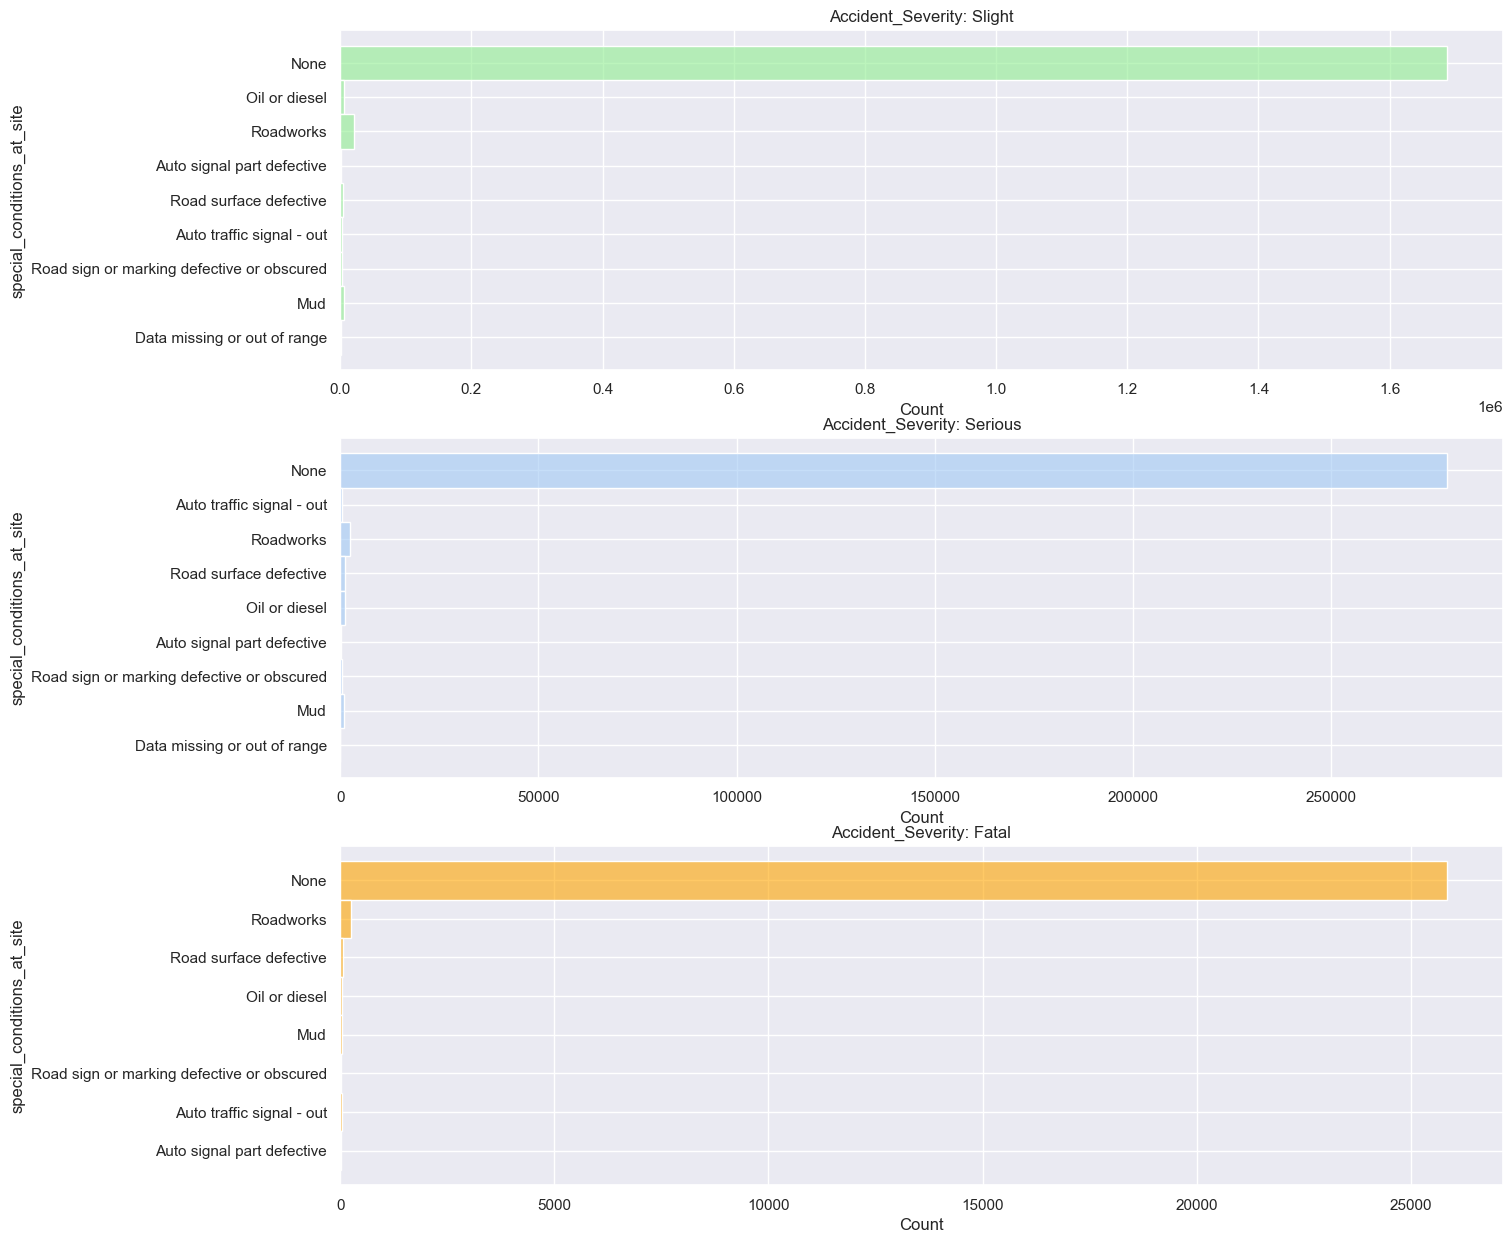

In [94]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='special_conditions_at_site', color='lightgreen',
             alpha=0.6, bins=31, ax=ax[0],
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident['accident_severity'] == 'Serious'],
             y='special_conditions_at_site',
             alpha=0.6, bins=31, ax=ax[1],
             ).set(title=f'Accident_Severity: Serious')

sns.histplot(df_accident[df_accident['accident_severity'] == 'Fatal'],
             y='special_conditions_at_site', color='orange',
             alpha=0.6, bins=31, ax=ax[2],
             ).set(title=f'Accident_Severity: Fatal')

plt.show()

We can see that **'special_conditions_at_site'** do not have a great impact.  
  
We do see a slight rise in all severities when there are **'Roadworks'** present.

### Feature - **'light_conditions'**

Lets have a look **'light_conditions'**.

In [95]:
df_accident['light_conditions'].value_counts(ascending=False)

Daylight                        1493188
Darkness - lights lit            403060
Darkness - no lighting           112574
Darkness - lighting unknown       24101
Darkness - lights unlit            9911
Data missing or out of range          8
Name: light_conditions, dtype: int64

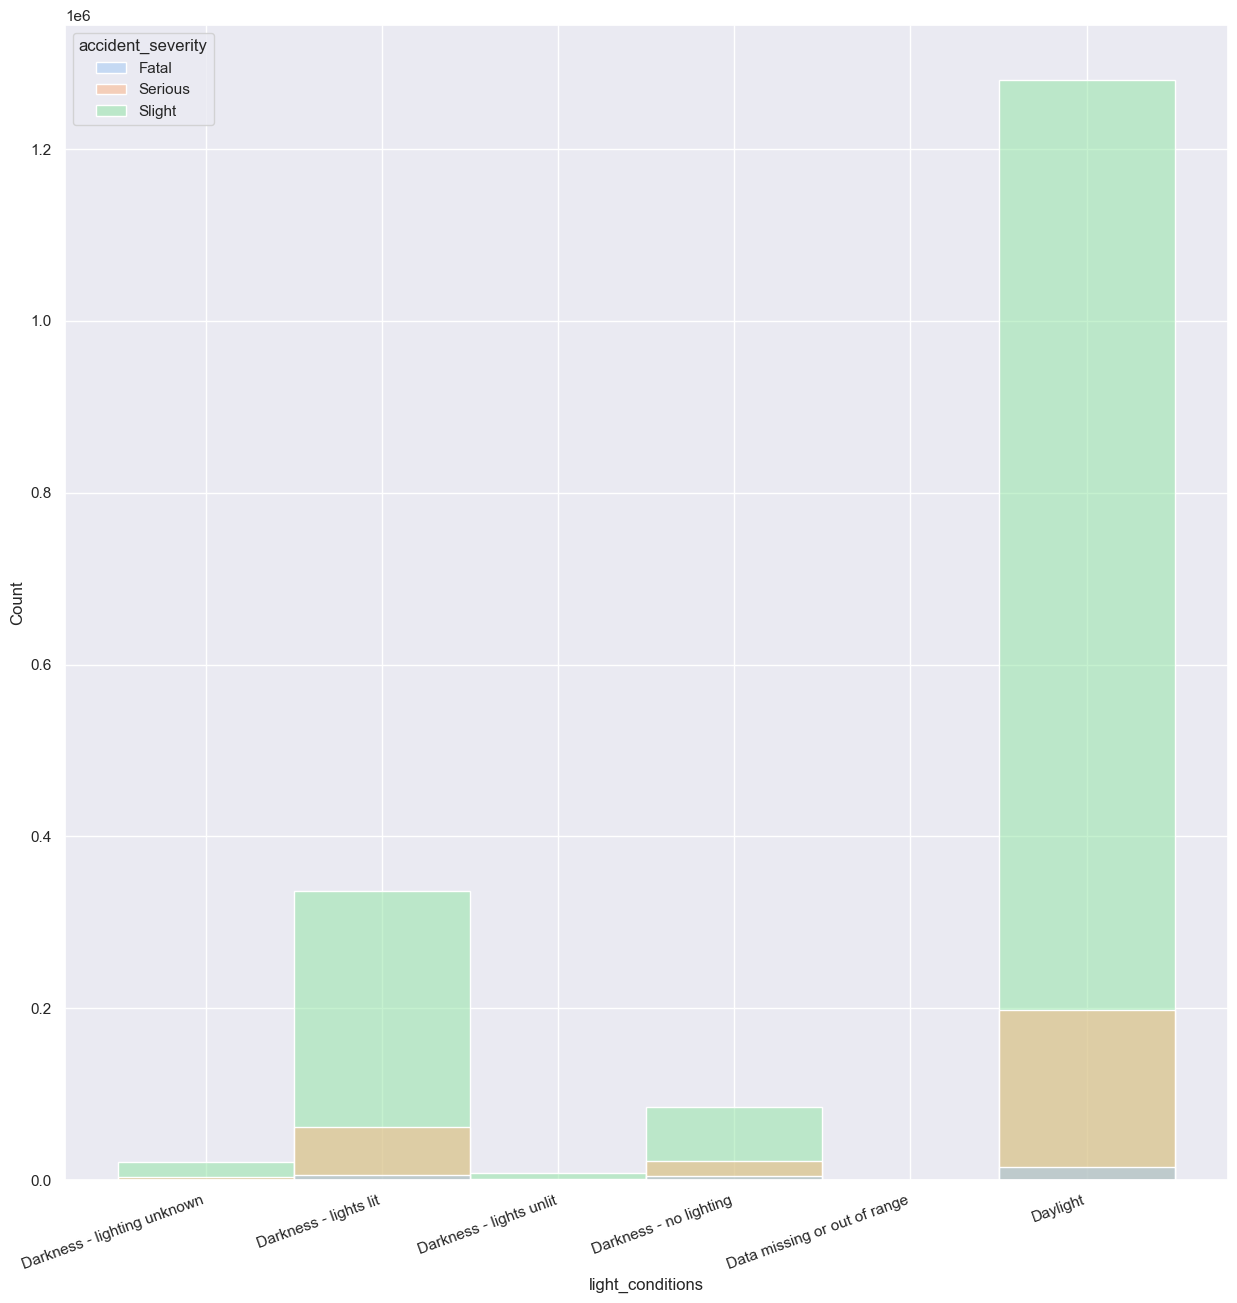

In [96]:
plt.figure(figsize=(15,15))
ax = sns.histplot(
    data=df_accident, x='light_conditions', bins=5, hue='accident_severity'
)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right'
                   )
None

plt.show()

We can see that the **RTC's** are much more common during daylight hours.  
  
Lets have la look against **'Accident Severity'**.

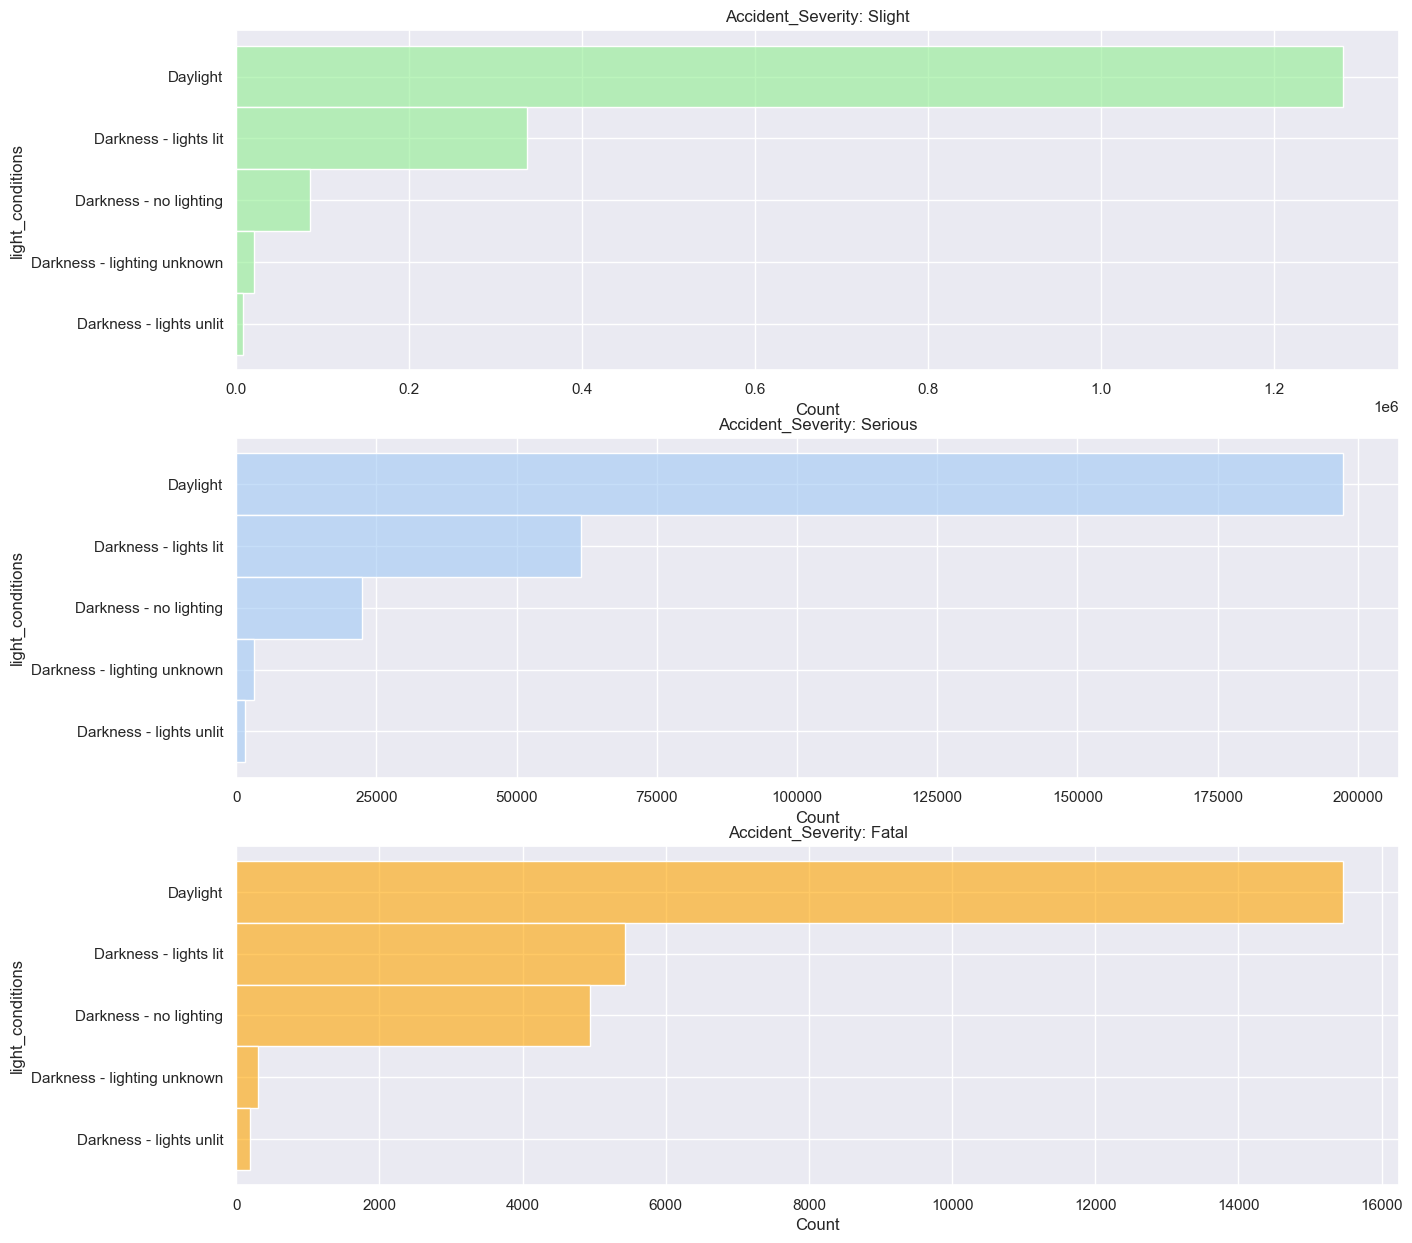

In [97]:
df_accident.light_conditions = pd.Categorical(values=df_accident.light_conditions,
                                             categories=[
                                                'Daylight',
                                                'Darkness - lights lit',
                                                'Darkness - no lighting',
                                                'Darkness - lighting unknown',
                                                'Darkness - lights unlit'
                                             ]
                                             ) # Sort the attributes
df_accident.sort_values(['light_conditions']) # Sort the column

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='light_conditions', color='lightgreen',
             alpha=0.6, bins=5, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='light_conditions',
             alpha=0.6, bins=5, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='light_conditions', color='orange',
             alpha=0.6, bins=5, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

It still appears that RTC's are much more common in the daylight.  
  
However we can see in the **'Fatal'** visual that a larger proportion happen during darkness.  

### Feature - **'pedestrian_crossing_human_control'**

Lets take a look at the values.

In [98]:
df_accident['pedestrian_crossing_human_control'].value_counts(dropna=False, ascending=False)

0.0    2029690
2.0       8111
1.0       5041
Name: pedestrian_crossing_human_control, dtype: int64

We can see that these have been entered as `floats`, which is out of line with the data.  
  
Lets convert them to match the Police Accident Form.

In [99]:
df_accident['pedestrian_crossing_human_control'] = df_accident[
    'pedestrian_crossing_human_control'
].map(
    {0.0 : 'None within 50m', 1.0 : 'School Crossing Patrol',
    2.0 : 'Other Authorised Control'}
)

df_accident[
    'pedestrian_crossing_human_control'
].value_counts(dropna=False, ascending=False)


None within 50m             2029690
Other Authorised Control       8111
School Crossing Patrol         5041
Name: pedestrian_crossing_human_control, dtype: int64

Nearly all **RTC's** are not affected by this feature.  
  
Now we have mapped to the correct names lets visualise against **'Severity'** anyway.

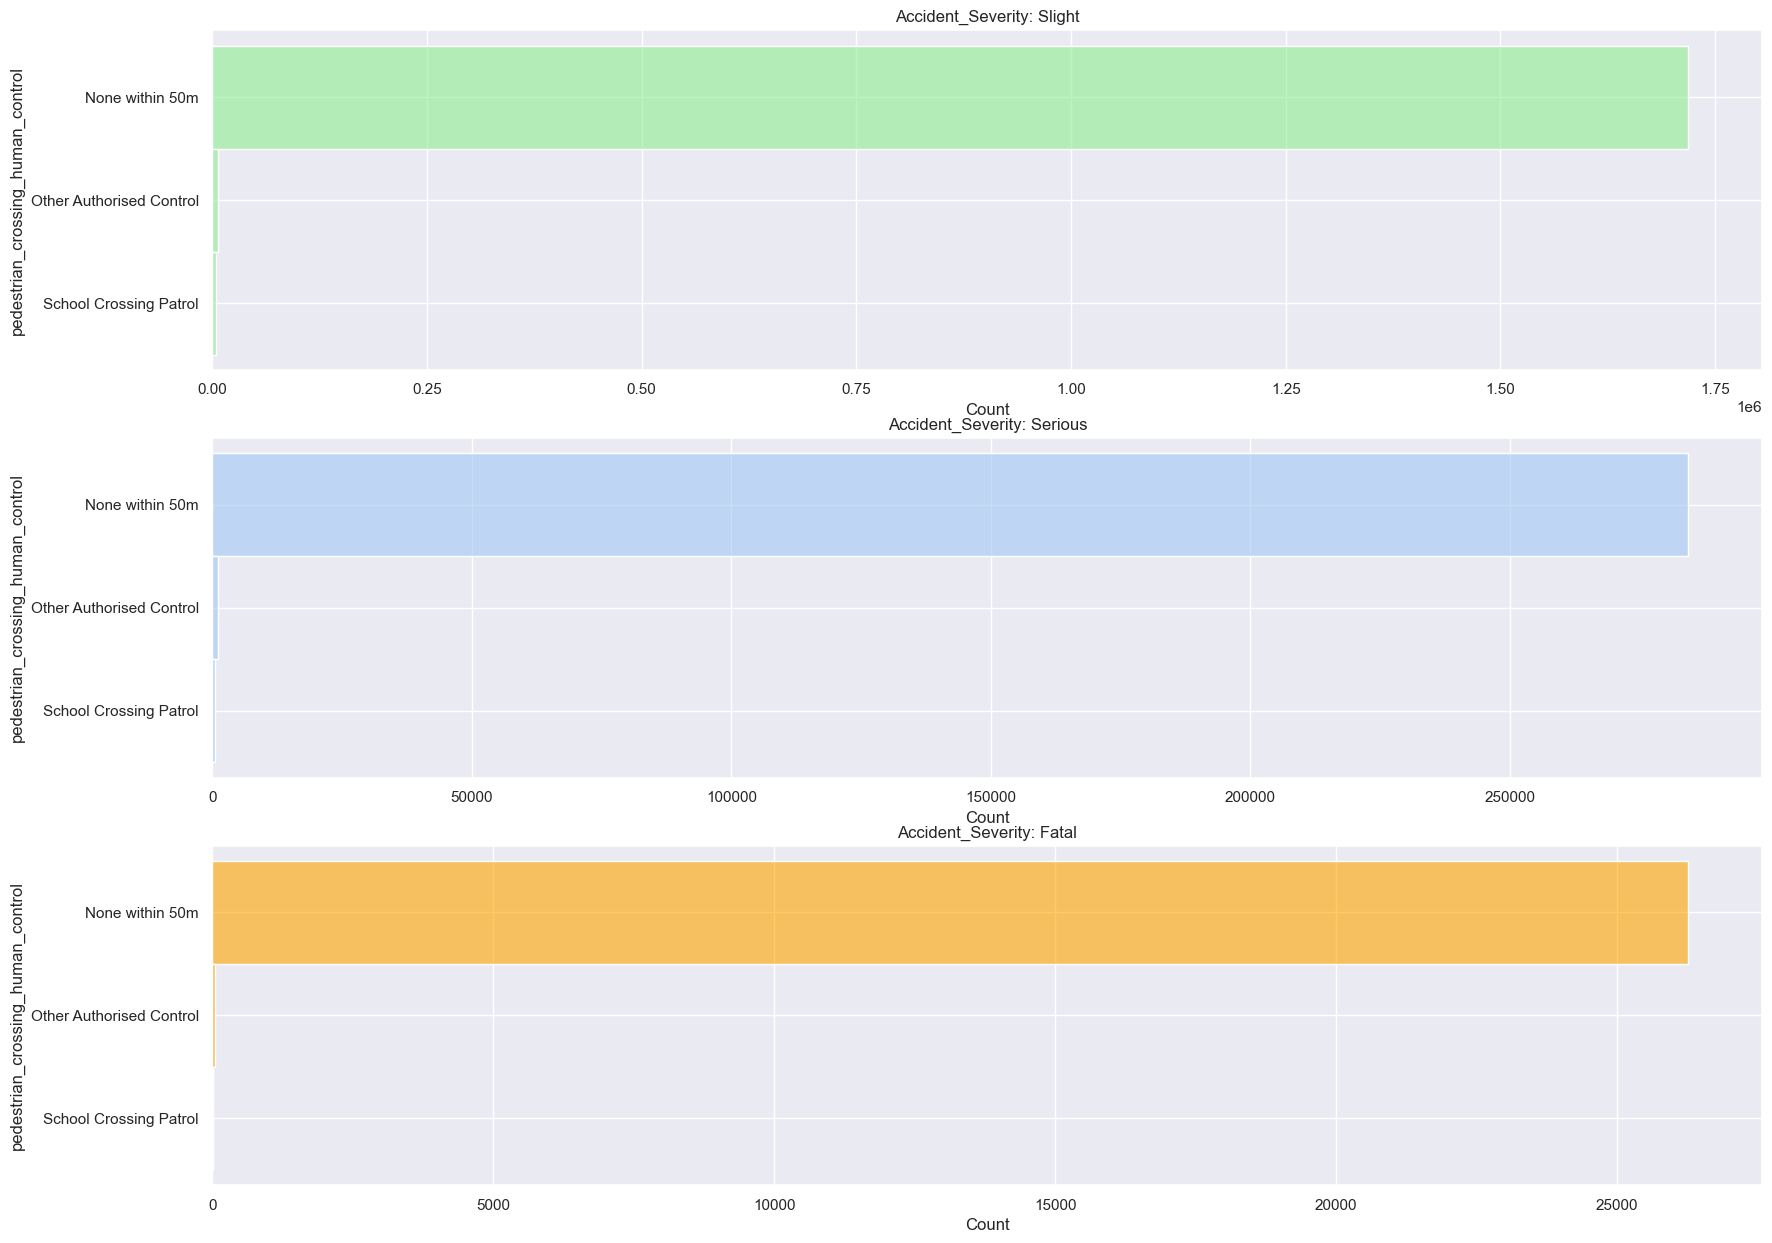

In [100]:
df_accident.pedestrian_crossing_human_control = pd.Categorical(values=df_accident.pedestrian_crossing_human_control,
                                             categories=[
                                                'None within 50m',
                                                'Other Authorised Control',
                                                'School Crossing Patrol'
                                             ]
                                             ) # Sort the attributes
df_accident.sort_values(['pedestrian_crossing_human_control']) # Sort the column

fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='pedestrian_crossing_human_control',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='pedestrian_crossing_human_control',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='pedestrian_crossing_human_control',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'pedestrian_crossing_physical_facilities'**

Lets take a look at **'pedestrian_crossing_physical_facilities'** to see if they have any useful insight.

In [101]:
df_accident[
    'pedestrian_crossing_physical_facilities'
].value_counts(dropna=False, ascending=False)

0.0    1695167
5.0     137979
4.0     109359
1.0      55650
8.0      39101
7.0       5586
Name: pedestrian_crossing_physical_facilities, dtype: int64

We can see that these have been entered as `floats`, which is out of line with the data.  
  
Lets convert them to match the Police Accident Form.

In [102]:
df_accident[
    'pedestrian_crossing_physical_facilities'
] = df_accident[
    'pedestrian_crossing_physical_facilities'
].map(
    {0.0 : 'None within 50m',
    1.0 : 'Zebra Crossing',
    4.0 : 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
    5.0 : 'Pedestrian phase at traffic signal junction',
    7.0 : 'Footbridge or subway',
    8.0 : 'Central refuge — no other controls'}
)

df_accident[
    'pedestrian_crossing_physical_facilities'
].value_counts(dropna=False, ascending=False)


None within 50m                                                              1695167
Pedestrian phase at traffic signal junction                                   137979
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     109359
Zebra Crossing                                                                 55650
Central refuge — no other controls                                             39101
Footbridge or subway                                                            5586
Name: pedestrian_crossing_physical_facilities, dtype: int64

Lets have a look against **'Severity'**.

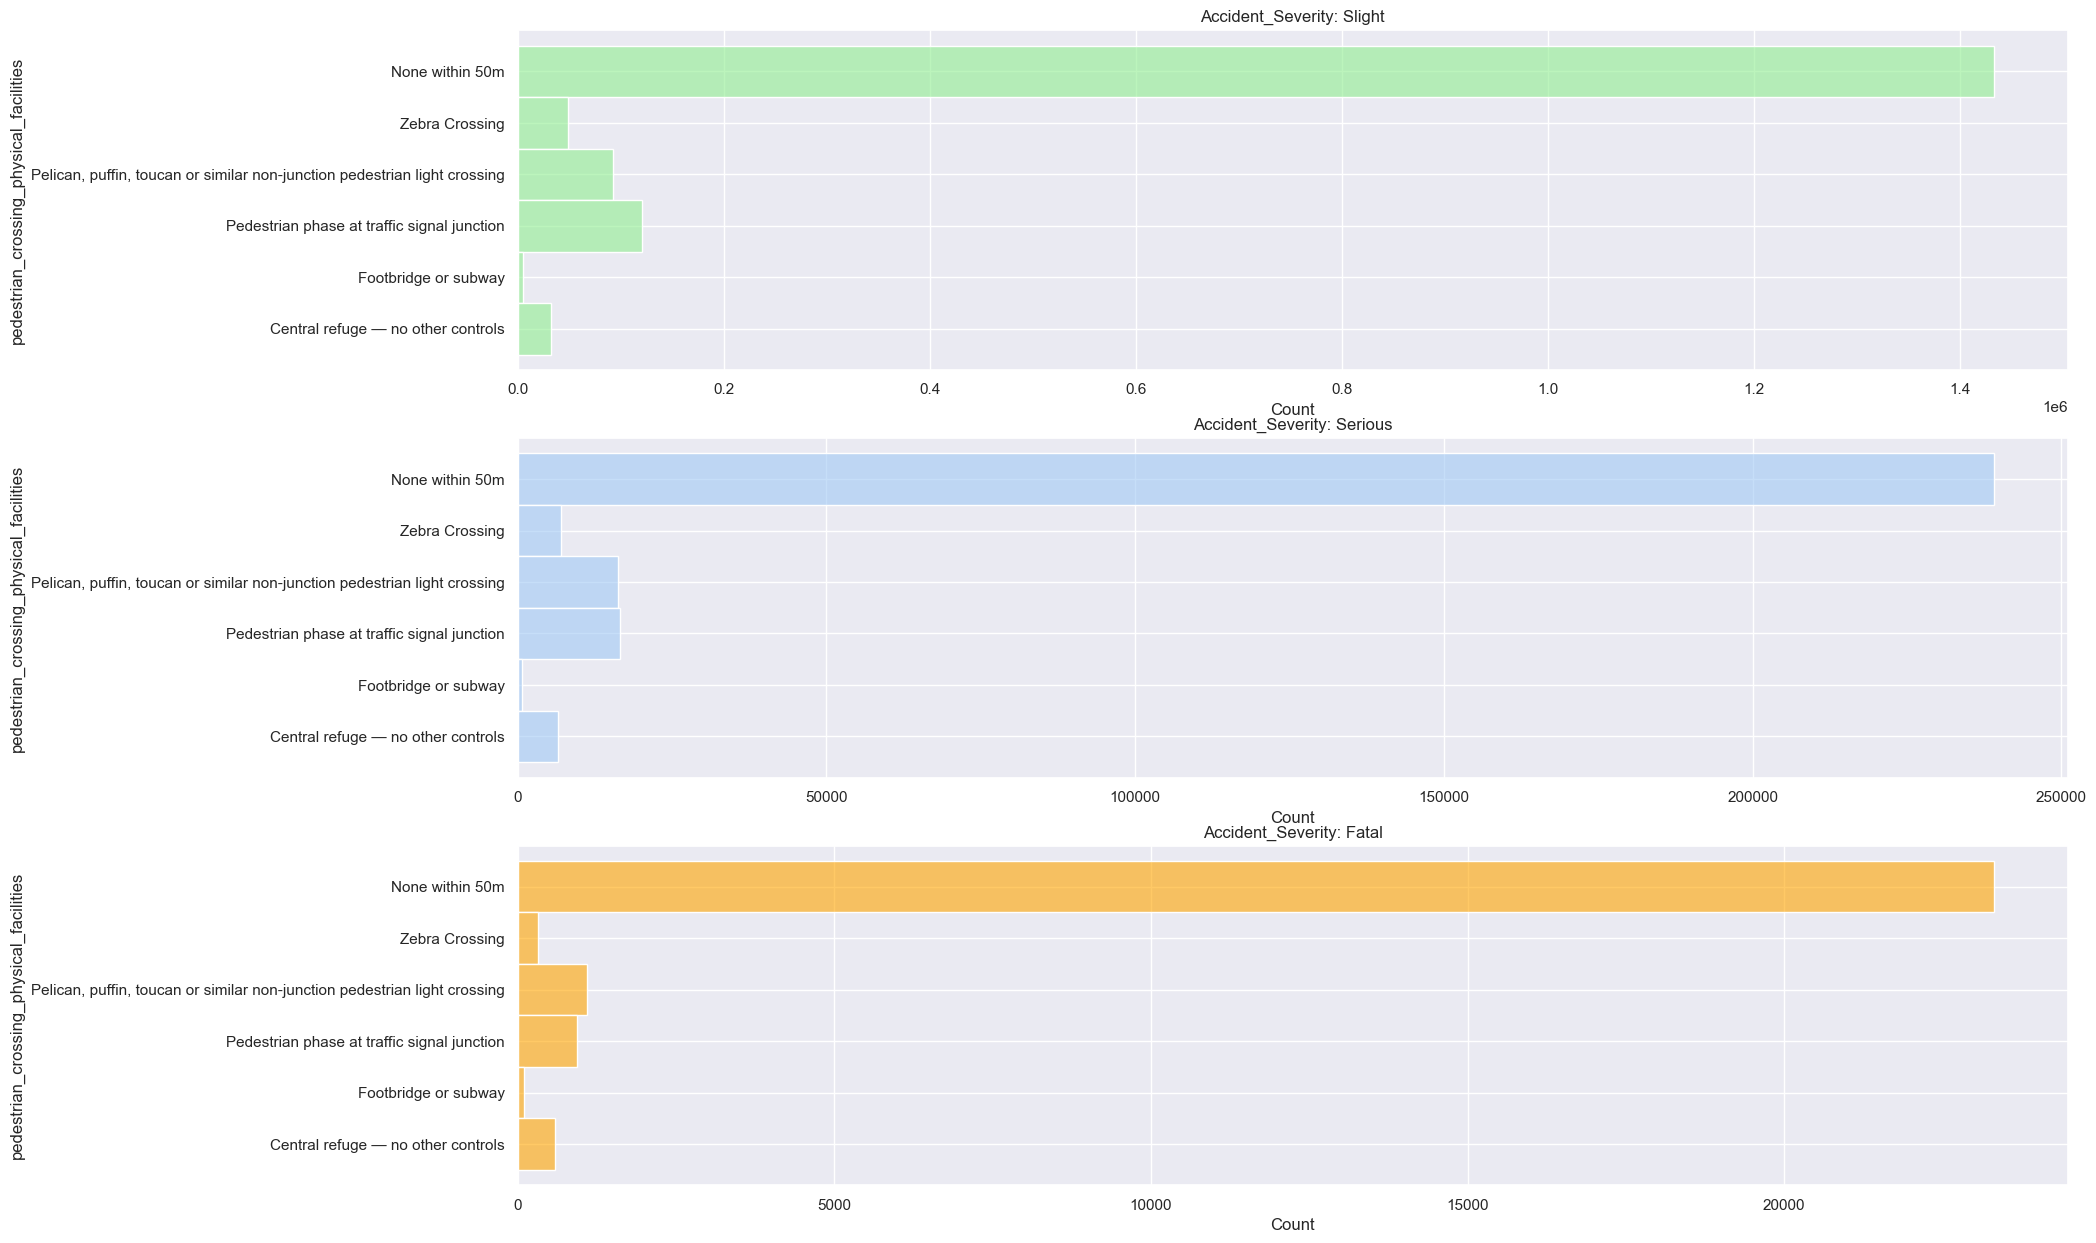

In [103]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='pedestrian_crossing_physical_facilities',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='pedestrian_crossing_physical_facilities',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='pedestrian_crossing_physical_facilities',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

We can see that this feature has little impact.  
  
However we can see an increase in **'Pedestrian phase at traffic signal junction'** for all three severities.  
  
There is also a rise at **'Pelican, puffin, toucan or similar non-junction pedestrian light crossing'**.  
  
Lets take a closer look.

In [104]:
(len(df_accident.loc[(
    df_accident['accident_severity'] != 'Slight'
)
& ((
    df_accident['pedestrian_crossing_physical_facilities']
    == 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing'
   )
| (
    df_accident['pedestrian_crossing_physical_facilities']
    == 'Pedestrian phase at traffic signal junction'
   ))
]) / 6) / 52

111.34935897435898

We are having an average of **51** serious **RTC's** per **week** at a light controlled pedestrian crossing across the UK.  
  
There are **3** **Fatal** **RTC's** per **week** at a light controlled pedestrian crossing.

### Feature - **'road_surface_conditions'**

Lets take a look to see what difference **'road_surface_conditions'** have.

In [105]:
df_accident['road_surface_conditions'].value_counts(ascending=False, dropna=False)

Dry                             1416154
Wet or damp                      568013
Frost or ice                      40305
Snow                              12156
Data missing or out of range       3372
Flood over 3cm. deep               2842
Name: road_surface_conditions, dtype: int64

We can see that nearly a third of all accidents happen in **'Wet or damp'** conditions.

In [106]:
df_accident.groupby(
    'road_surface_conditions'
)['accident_severity'].value_counts(ascending=False)

road_surface_conditions       accident_severity
Data missing or out of range  Slight                  3017
                              Serious                  336
                              Fatal                     19
Dry                           Slight               1196704
                              Serious               201745
                              Fatal                  17705
Flood over 3cm. deep          Slight                  2390
                              Serious                  394
                              Fatal                     58
Frost or ice                  Slight                 35046
                              Serious                 4837
                              Fatal                    422
Snow                          Slight                 10836
                              Serious                 1230
                              Fatal                     90
Wet or damp                   Slight                482503
        

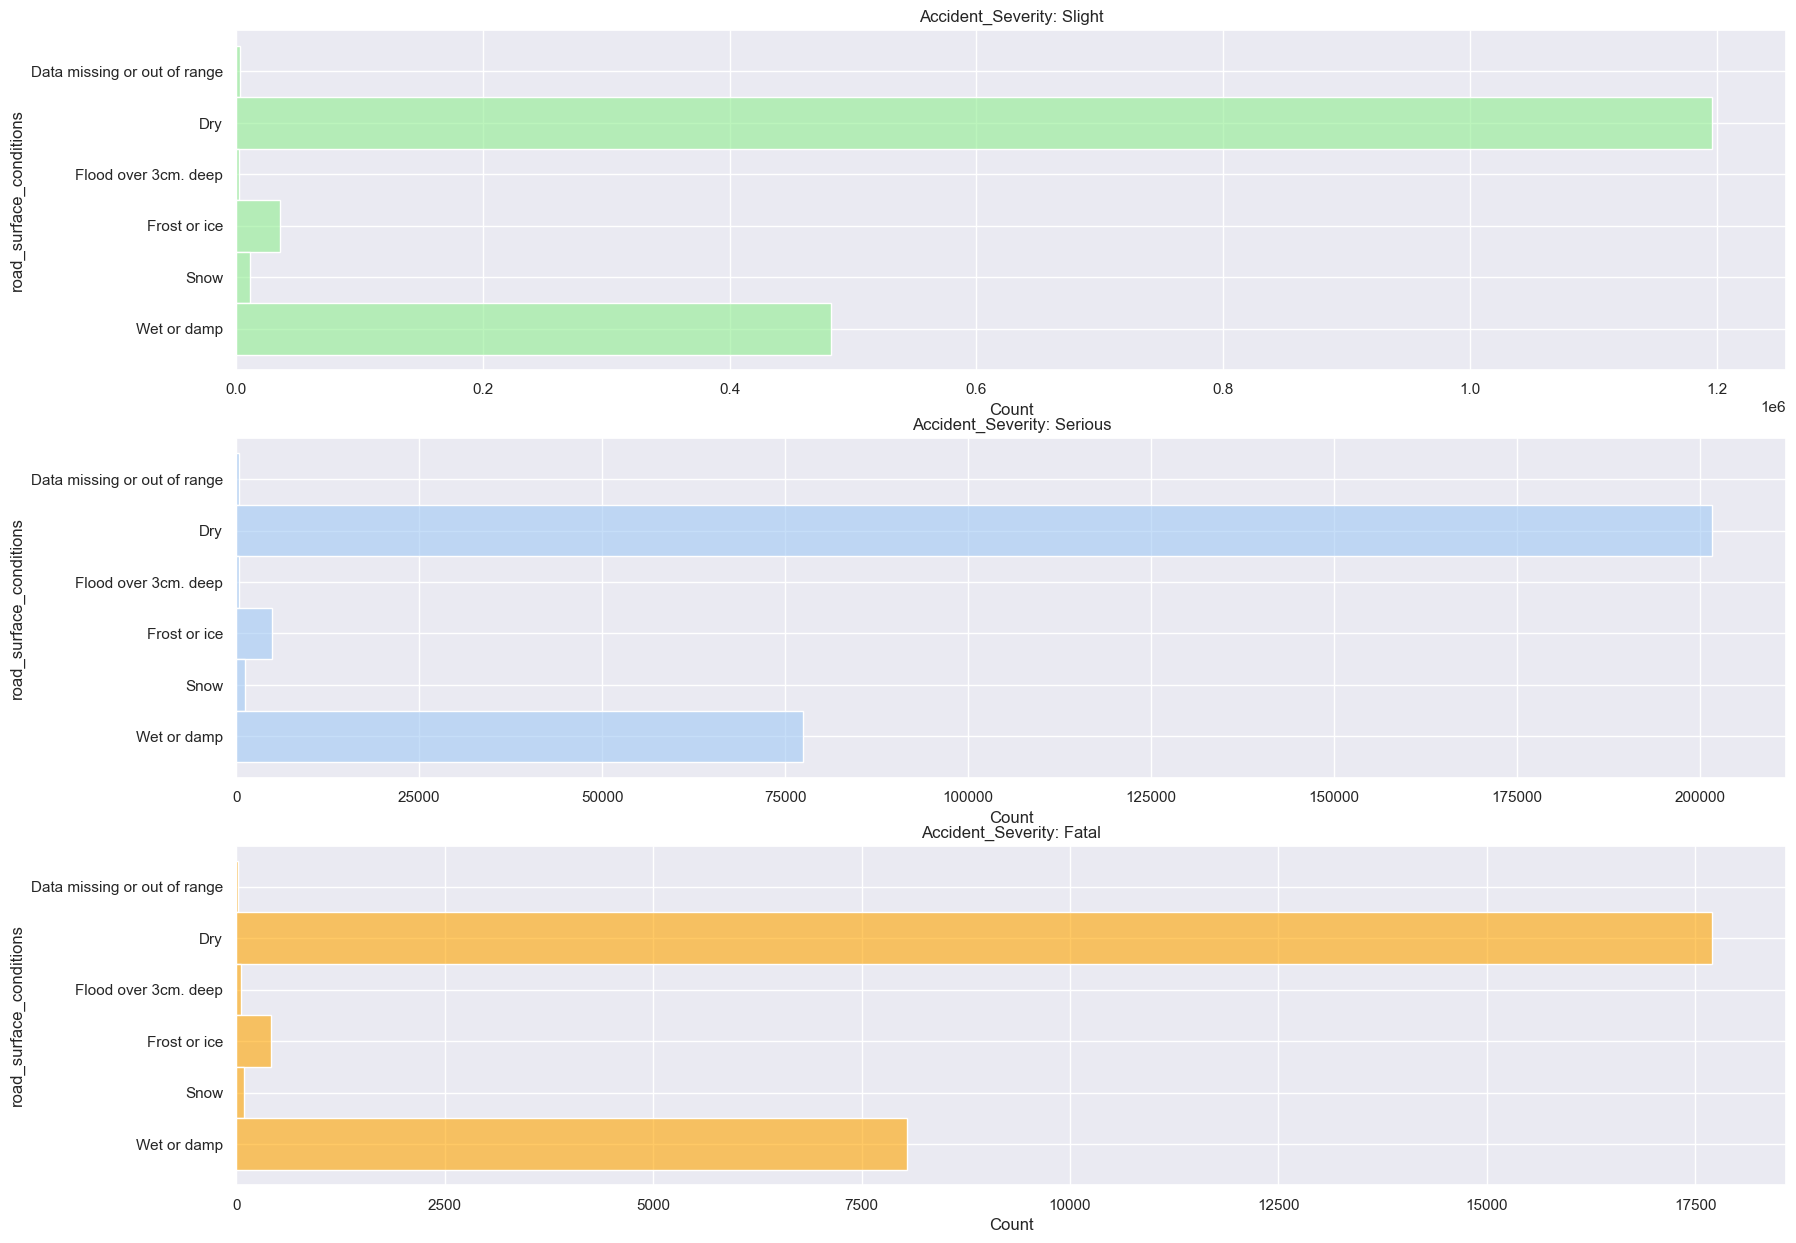

In [107]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='road_surface_conditions',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='road_surface_conditions',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='road_surface_conditions',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

We can see that **'Wet or damp'** has an impact across all severities.

In [108]:
df_accident.groupby('road_surface_conditions')['weather_conditions'].value_counts(ascending=False)

road_surface_conditions       weather_conditions          
Data missing or out of range  Unknown                            2486
                              Fine no high winds                  682
                              Other                               125
                              Raining no high winds                35
                              Data missing or out of range         22
                              Fine + high winds                    12
                              Fog or mist                           5
                              Snowing no high winds                 4
                              Raining + high winds                  1
                              Snowing + high winds                  0
Dry                           Fine no high winds              1357357
                              Unknown                           31402
                              Fine + high winds                 15349
                              O

### Feature - **'road_type'**

In [109]:
round(df_accident.groupby(
    'road_type'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

road_type           accident_severity
Dual carriageway    Slight               85.9
                    Serious              12.4
                    Fatal                 1.7
One way street      Slight               86.3
                    Serious              13.0
                    Fatal                 0.7
Roundabout          Slight               90.4
                    Serious               9.3
                    Fatal                 0.3
Single carriageway  Slight               83.8
                    Serious              14.9
                    Fatal                 1.3
Slip road           Slight               89.9
                    Serious               9.3
                    Fatal                 0.8
Unknown             Slight               87.9
                    Serious              11.3
                    Fatal                 0.8
Name: accident_severity, dtype: float64

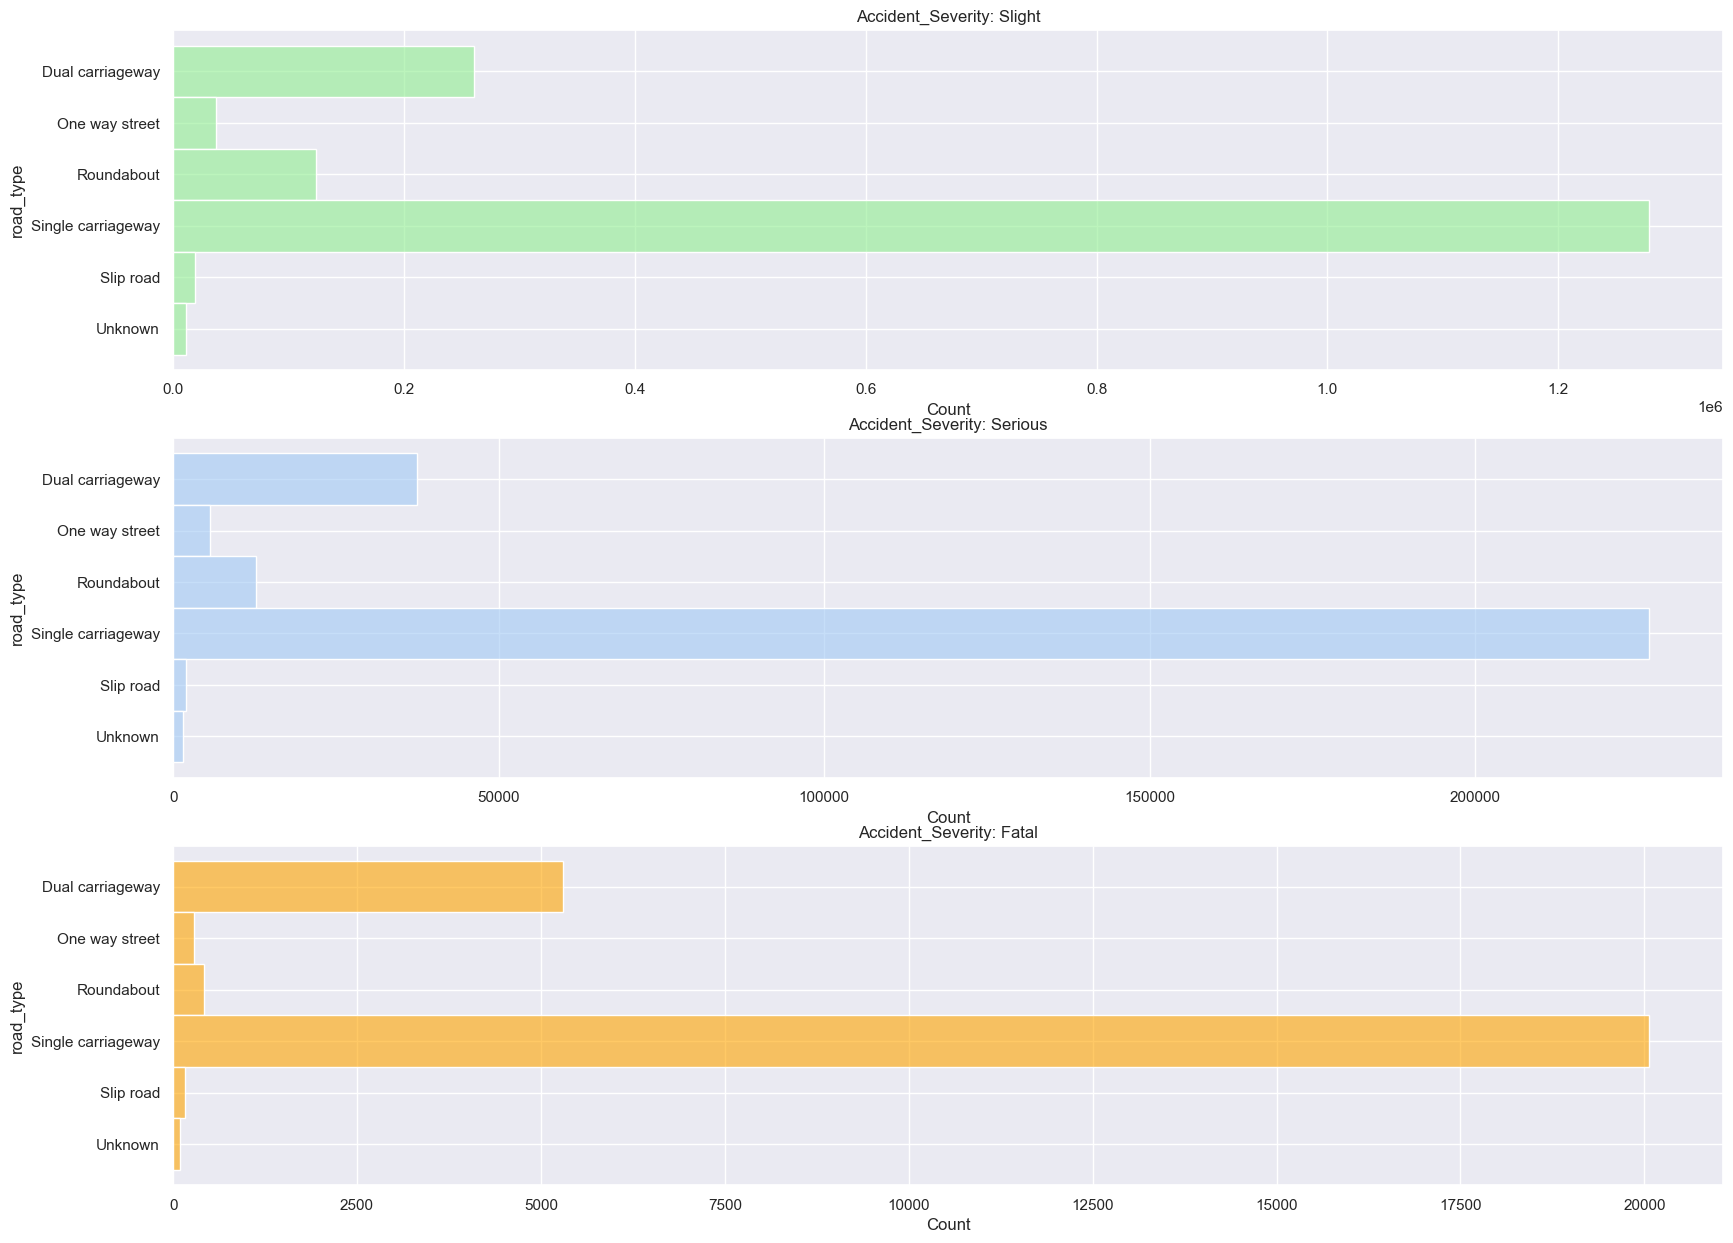

In [110]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='road_type',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='road_type',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='road_type',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'special_conditions_at_site'**

In [111]:
round(df_accident.groupby(
    'special_conditions_at_site'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

special_conditions_at_site                  accident_severity
Auto signal part defective                  Slight               86.9
                                            Serious              11.9
                                            Fatal                 1.2
Auto traffic signal - out                   Slight               87.9
                                            Serious              11.1
                                            Fatal                 1.1
Data missing or out of range                Slight               91.3
                                            Serious               8.7
                                            Fatal                 0.0
Mud                                         Slight               85.4
                                            Serious              14.0
                                            Fatal                 0.6
None                                        Slight               84.7
                            

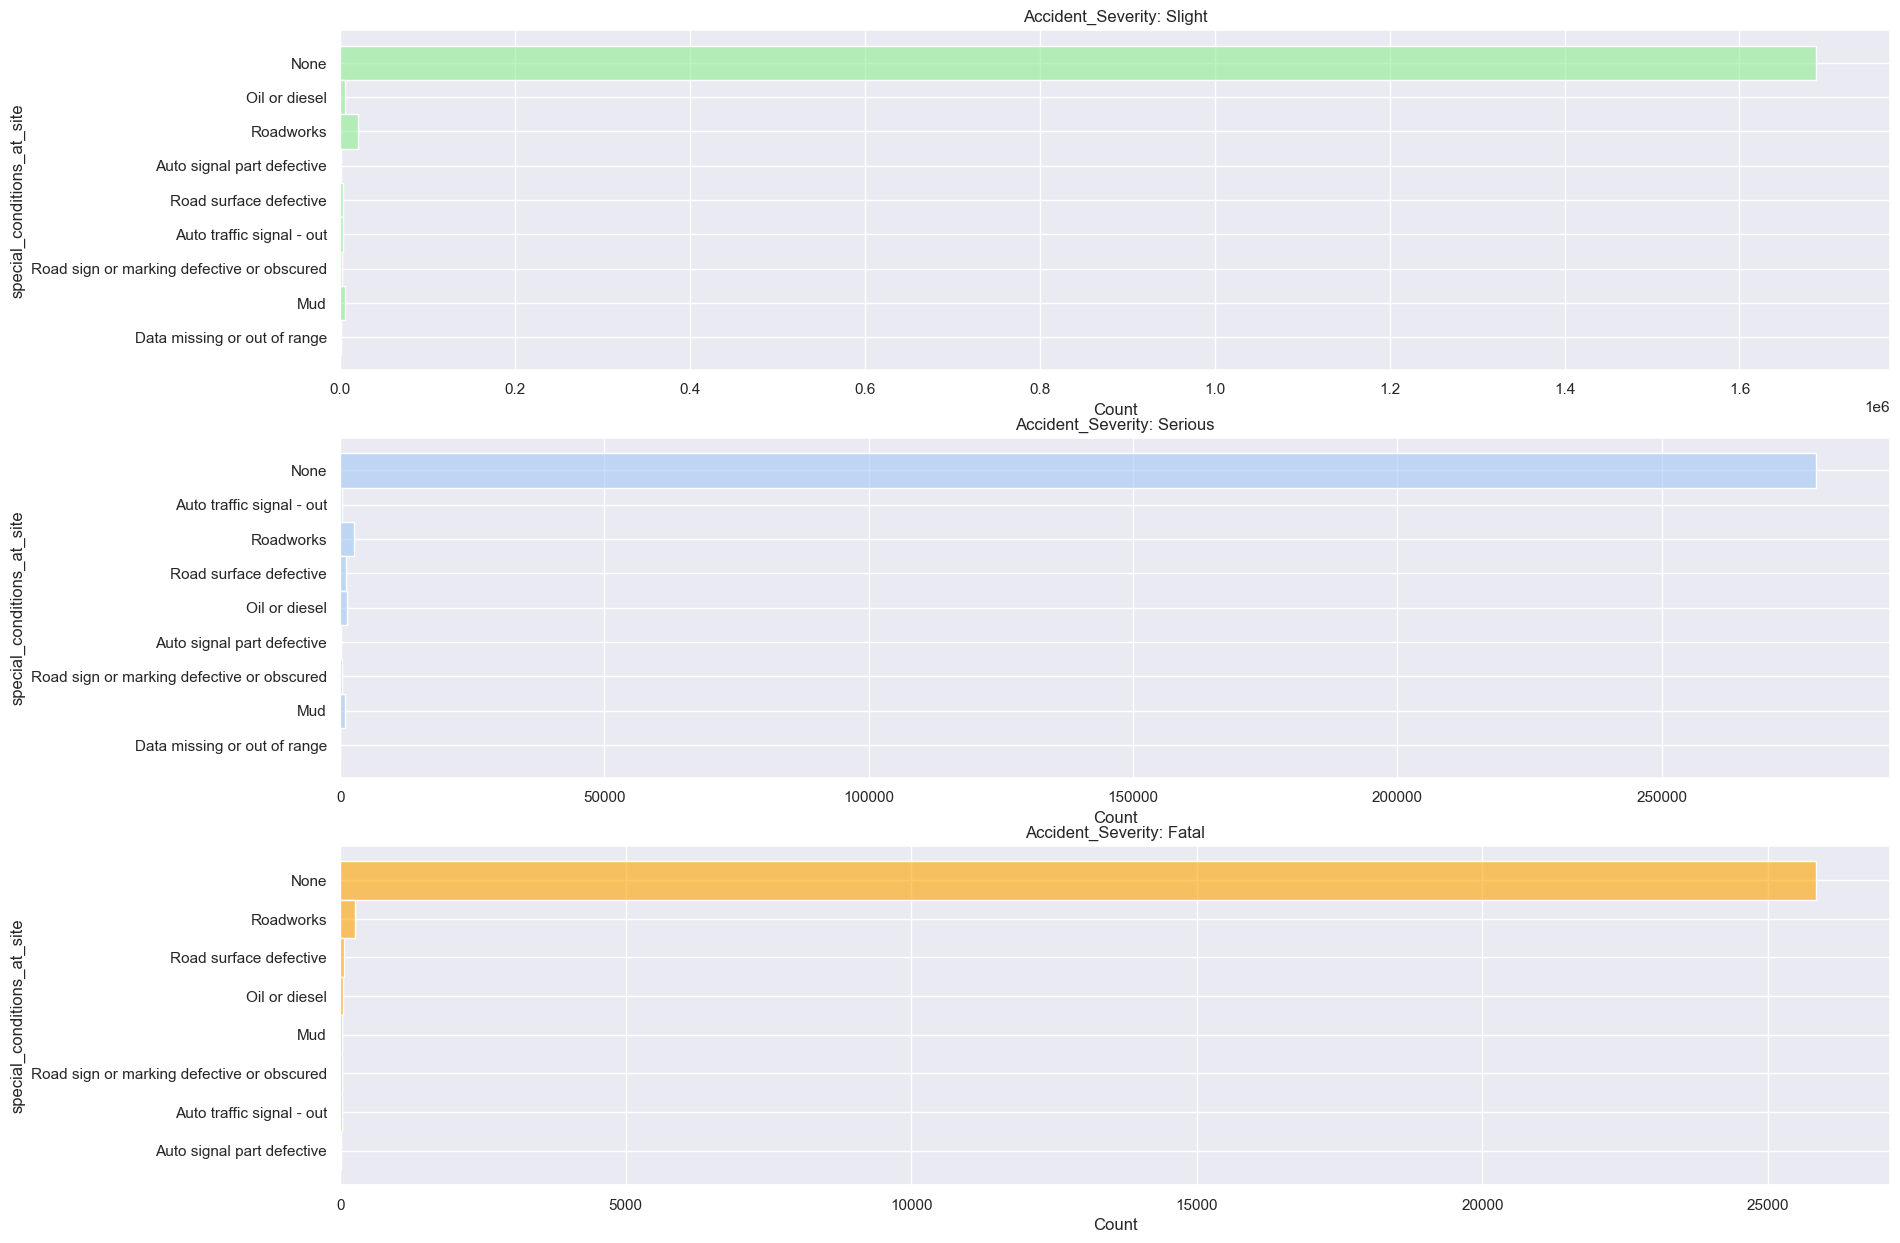

In [112]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='special_conditions_at_site',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='special_conditions_at_site',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='special_conditions_at_site',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'urban_or_rural_area'**

In [113]:
df_accident['urban_or_rural_area'].value_counts(ascending=False)

Urban          1318421
Rural           724384
Unallocated         37
Name: urban_or_rural_area, dtype: int64

In [114]:
df_accident['urban_or_rural_area'].replace('Unallocated', 'Urban', inplace=True)

In [115]:
round(df_accident.groupby(
    'urban_or_rural_area'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

urban_or_rural_area  accident_severity
Rural                Slight               81.1
                     Serious              16.5
                     Fatal                 2.3
Urban                Slight               86.7
                     Serious              12.6
                     Fatal                 0.7
Name: accident_severity, dtype: float64

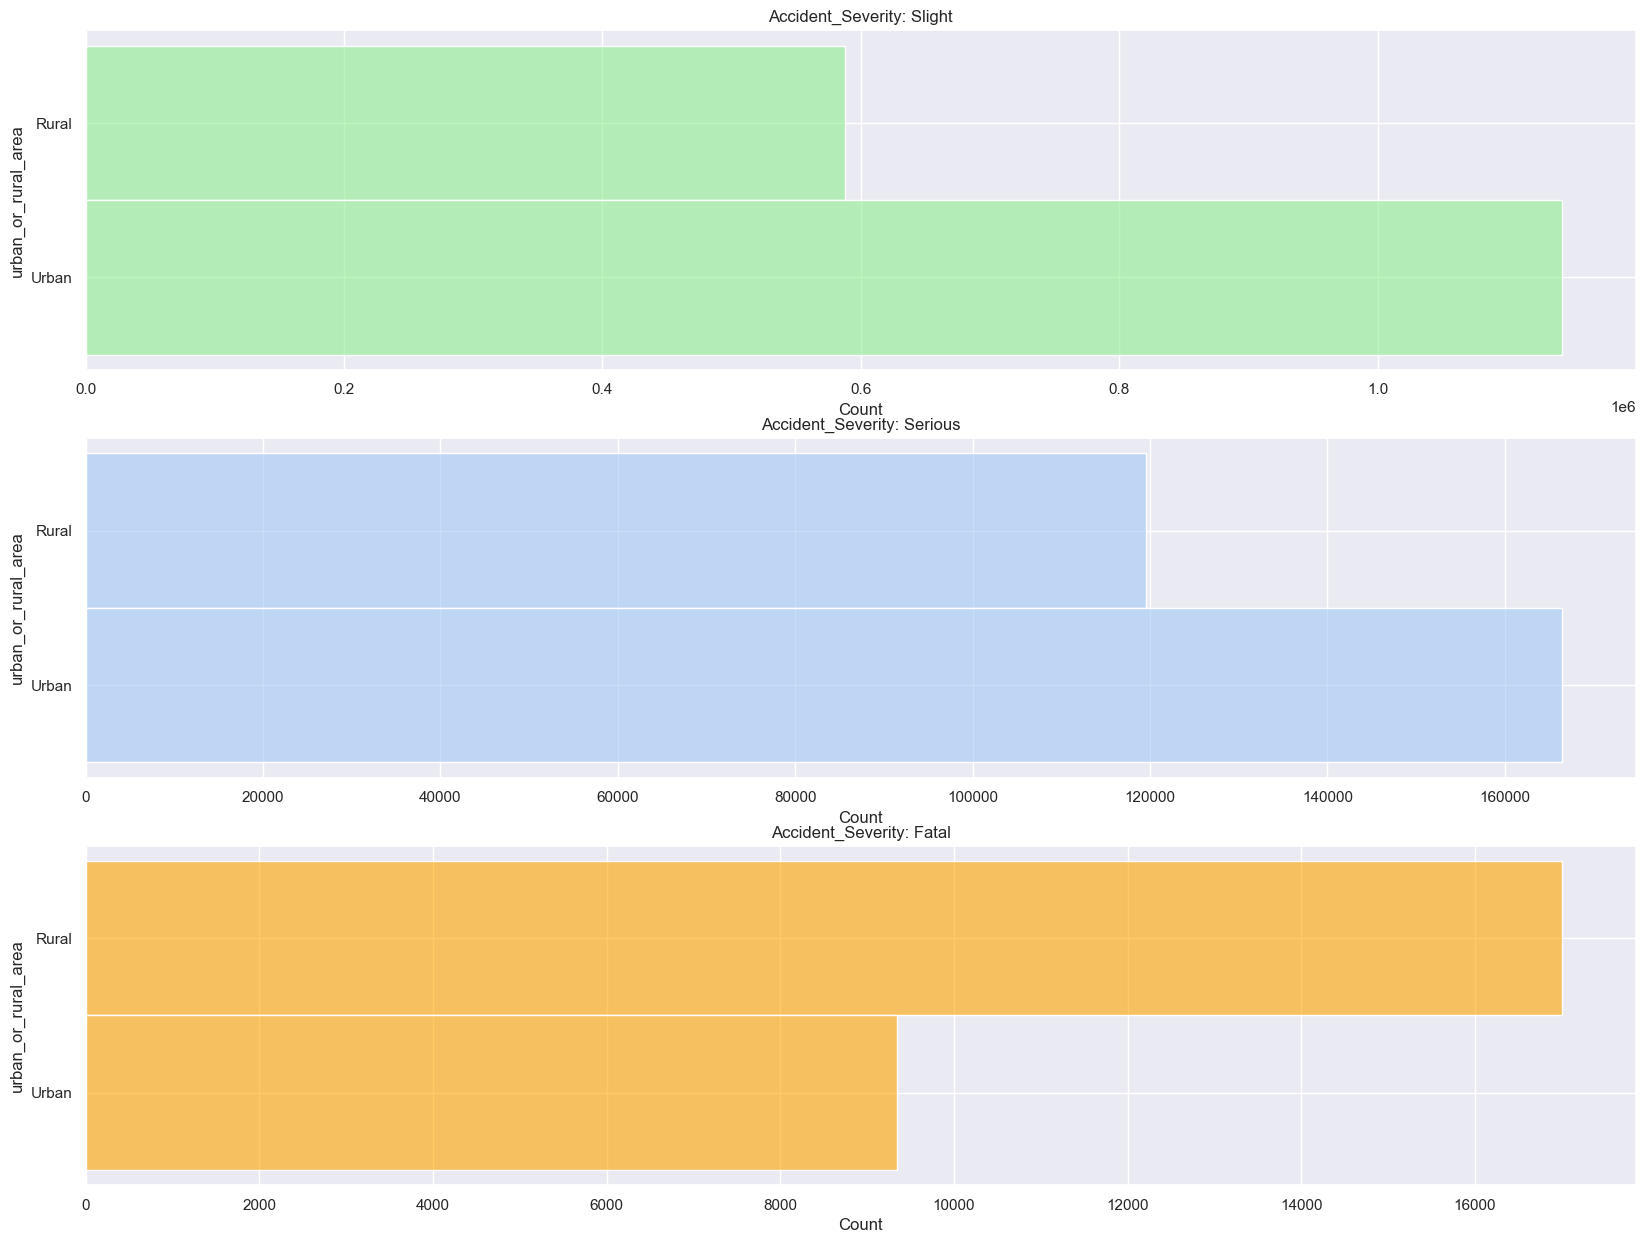

In [116]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='urban_or_rural_area',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='urban_or_rural_area',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='urban_or_rural_area',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

We can see that the **Fatal** **RTC's** in **Rural** areas are much higher than **Urban** areas.

In [117]:
df_accident['local_authority_district'].value_counts(ascending=False)

Birmingham            39615
Leeds                 27327
Westminster           19572
Glasgow City          18554
Bradford              18143
                      ...  
Oswestry                441
Shetland Islands        399
Berwick-upon-Tweed      337
Orkney Islands          321
Teesdale                318
Name: local_authority_district, Length: 416, dtype: int64

### Feature - **'weather_conditions'**

In [118]:
df_accident['weather_conditions'].value_counts(ascending=False)

Fine no high winds              1637871
Raining no high winds            238970
Other                             43936
Unknown                           40878
Raining + high winds              28325
Fine + high winds                 25778
Snowing no high winds             13374
Fog or mist                       11057
Snowing + high winds               2484
Data missing or out of range        169
Name: weather_conditions, dtype: int64

<AxesSubplot: >

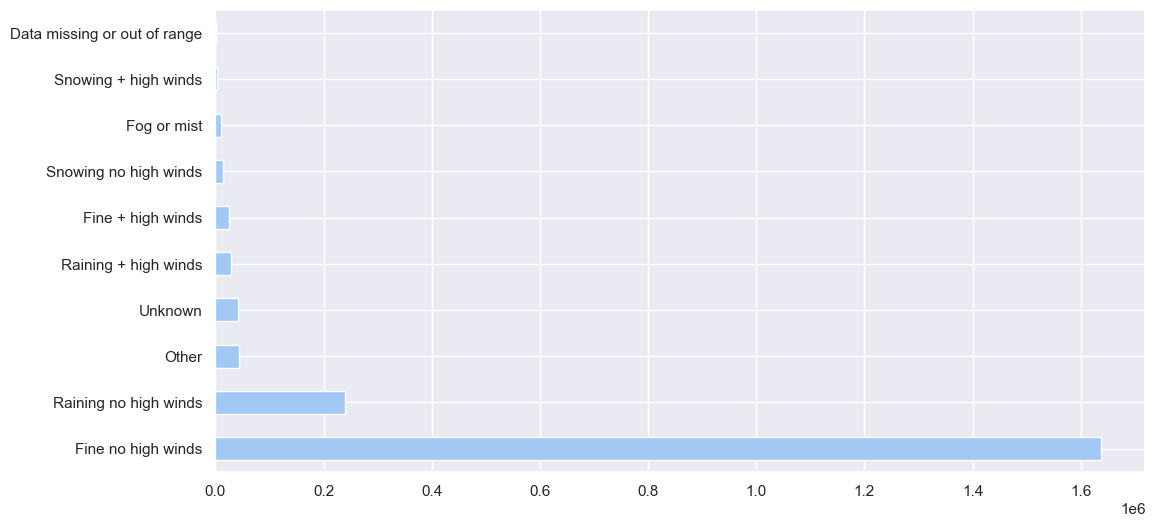

In [119]:
df_accident['weather_conditions'].value_counts().plot(kind='barh')

In [120]:
round(df_accident.groupby(
    'weather_conditions'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

weather_conditions            accident_severity
Data missing or out of range  Slight               89.3
                              Serious               7.7
                              Fatal                 3.0
Fine + high winds             Slight               82.9
                              Serious              15.2
                              Fatal                 1.9
Fine no high winds            Slight               84.3
                              Serious              14.4
                              Fatal                 1.3
Fog or mist                   Slight               83.0
                              Serious              14.9
                              Fatal                 2.2
Other                         Slight               87.6
                              Serious              11.5
                              Fatal                 0.9
Raining + high winds          Slight               84.8
                              Serious              13.8


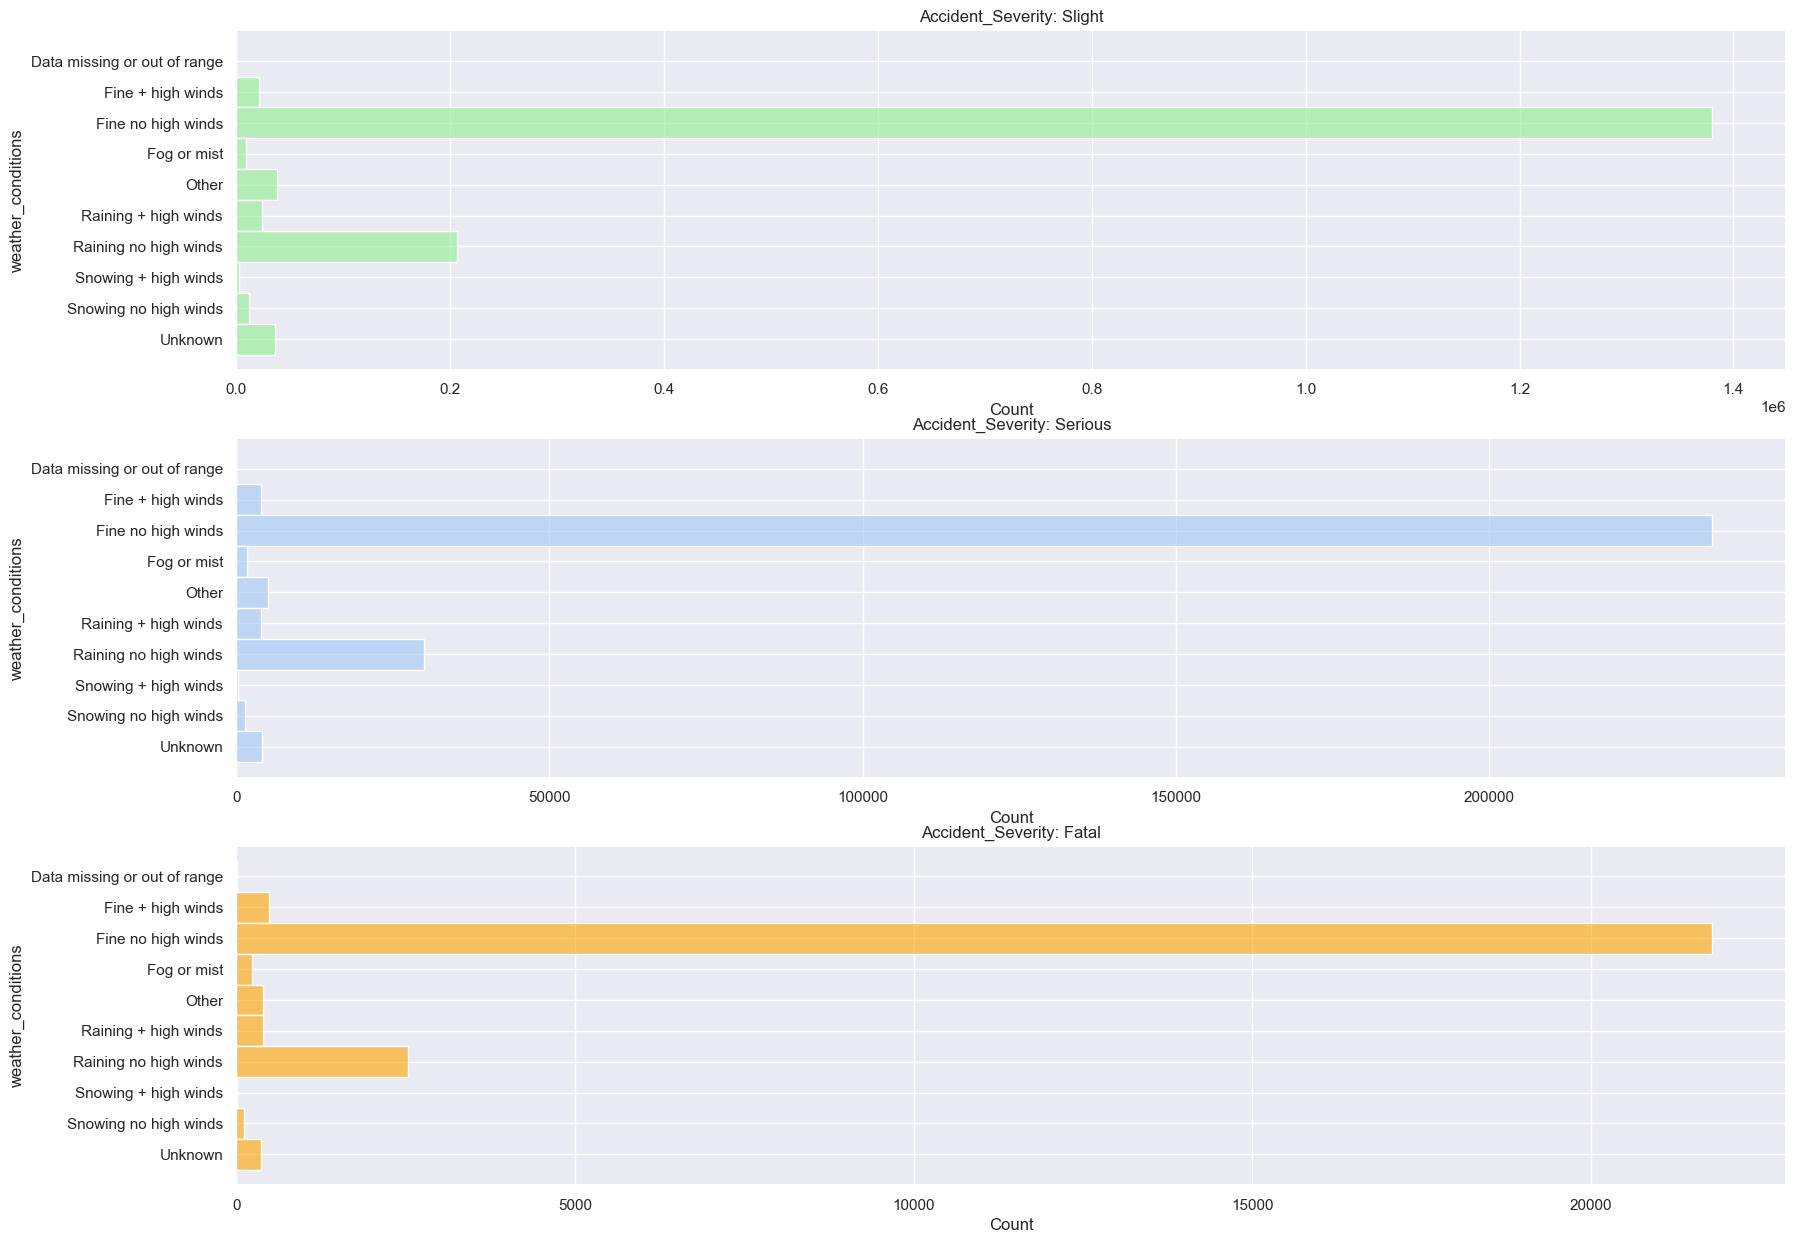

In [121]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.histplot(df_accident[df_accident['accident_severity'] == 'Slight'],
             y='weather_conditions',
             color='lightgreen', alpha=0.6, bins=3, ax=ax[0]
             ).set(title=f"Accident_Severity: Slight")

sns.histplot(df_accident[df_accident["accident_severity"] == "Serious"],
             y='weather_conditions',
             alpha=0.6, bins=3, ax=ax[1]
             ).set(title=f"Accident_Severity: Serious")

sns.histplot(df_accident[df_accident["accident_severity"] == "Fatal"],
             y='weather_conditions',
             color='orange', alpha=0.6, bins=3, ax=ax[2]
             ).set(title=f"Accident_Severity: Fatal")

plt.show()

### Feature - **'number_of_casualties'**

A casualty is classed as any human death or personal injury. Lets have a look at the counts.

In [122]:
df_accident['number_of_casualties'].sum()

2750345

In [123]:
df_accident.groupby('accident_severity')['number_of_casualties'].sum()

accident_severity
Fatal        49086
Serious     412967
Slight     2288292
Name: number_of_casualties, dtype: int32

In [124]:
df_accident.groupby('police_force')['number_of_casualties'].sum()

police_force
Avon and Somerset         66603
Bedfordshire              28329
Cambridgeshire            43704
Central                    9589
Cheshire                  54054
City of London             4920
Cleveland                 18207
Cumbria                   25924
Derbyshire                47437
Devon and Cornwall        79918
Dorset                    34715
Dumfries and Galloway      6227
Durham                    26188
Dyfed-Powys               27383
Essex                     72960
Fife                       8656
Gloucestershire           20686
Grampian                  15912
Greater Manchester       100094
Gwent                     16473
Hampshire                 79283
Hertfordshire             52513
Humberside                47475
Kent                      89416
Lancashire                81266
Leicestershire            44573
Lincolnshire              41729
Lothian and Borders       37539
Merseyside                61641
Metropolitan Police      375959
Norfolk                   3

In [125]:
(df_accident.groupby('accident_severity')['number_of_casualties'].sum() / 6) / 365

accident_severity
Fatal        22.413699
Serious     188.569406
Slight     1044.882192
Name: number_of_casualties, dtype: float64

We can see that during the **2005** to **2010** time period, the average death toll on UK roads was approx **12** per day, **one death every two hours**.

In [126]:
df_accident['number_of_casualties'].describe()

count    2.042842e+06
mean     1.346333e+00
std      8.185036e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.300000e+01
Name: number_of_casualties, dtype: float64

We can see we have a large range of numbers, however the **min**, **25%**, **50%** and **75%** are all **1**, and the **max** is **68**.  
  
Lets plot the numbers

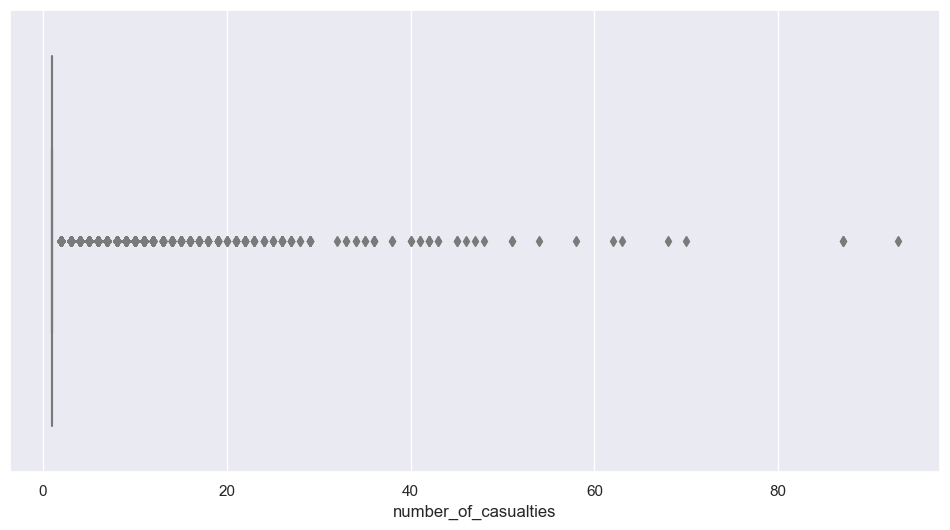

In [127]:
sns.boxplot(data=df_accident, x='number_of_casualties')

plt.show()

On further investigation we found a collision with 68 casualties involving a coach overturning trying to exit a motorway.  
  
[Link for Coach Accident](https://www.theguardian.com/uk/2007/jan/04/transport.world1)

### Feature - **'number_of_vehicles'**

Lets take a look at **'number_of_vehicles'**.

In [128]:
df_accident['number_of_vehicles'].describe()

count    2.042842e+06
mean     1.833805e+00
std      7.152689e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      6.700000e+01
Name: number_of_vehicles, dtype: float64

In [129]:
round(df_accident.groupby(
    'number_of_vehicles'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

number_of_vehicles  accident_severity
1                   Slight                78.0
                    Serious               20.0
                    Fatal                  1.9
2                   Slight                87.8
                    Serious               11.3
                                         ...  
37                  Serious                0.0
                    Slight                 0.0
67                  Serious              100.0
                    Fatal                  0.0
                    Slight                 0.0
Name: accident_severity, Length: 87, dtype: float64

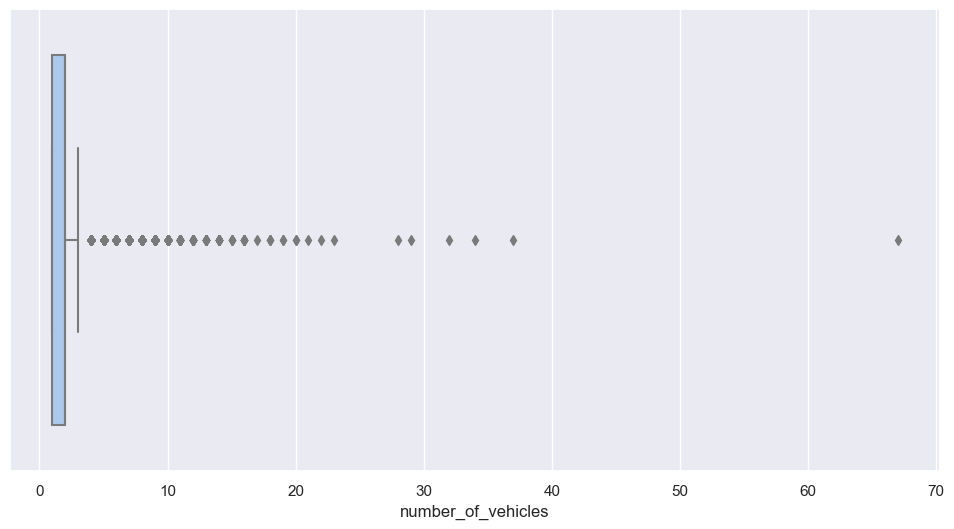

In [130]:
sns.boxplot(data=df_accident, x='number_of_vehicles')

plt.show()

In [131]:
round((df_accident.groupby('accident_severity')['number_of_vehicles'].sum() / 6) / 365, 1)

accident_severity
Fatal        21.4
Serious     220.6
Slight     1468.6
Name: number_of_vehicles, dtype: float64

As we can see, on average over **850** vehicles per day are involved in an **RTC** during the 2005 to 2010 time period.

In [132]:
df_accident['accident_severity'].value_counts()

Slight     1730496
Serious     286005
Fatal        26341
Name: accident_severity, dtype: int64

In [133]:
(df_accident['number_of_vehicles'].sum() / 6) / 365

1710.5817351598175

### Feature - **'speed_limit'**

Lets take a look at **'speed_limit'**.

In [134]:
df_accident['speed_limit'].value_counts(ascending=False)

30.0    1302889
60.0     317295
40.0     168184
70.0     147204
50.0      69401
20.0      37833
10.0         19
15.0         16
0.0           1
Name: speed_limit, dtype: int64

In [135]:
thirty = len(df_accident[df_accident['speed_limit'] == 30]) / len(df_accident)
print(f'The 30mph has an accident rate of', f'{thirty:.1%}')

The 30mph has an accident rate of 63.8%


As we can see there is a 63.5% rate of **RTC's** in the **30mph** speed limit areas.  
  
These are usual urban areas.

In [136]:
round(df_accident.groupby(
    'speed_limit'
)['accident_severity'].value_counts(ascending=False, normalize=True), 3) * 100

speed_limit  accident_severity
0.0          Slight               100.0
             Fatal                  0.0
             Serious                0.0
10.0         Slight                73.7
             Fatal                 15.8
             Serious               10.5
15.0         Slight                93.8
             Serious                6.2
             Fatal                  0.0
20.0         Slight                84.7
             Serious               14.8
             Fatal                  0.5
30.0         Slight                86.5
             Serious               12.8
             Fatal                  0.7
40.0         Slight                84.4
             Serious               14.1
             Fatal                  1.5
50.0         Slight                82.5
             Serious               15.3
             Fatal                  2.2
60.0         Slight                77.5
             Serious               19.3
             Fatal                  3.2
70.0     

We can also see here that the average percentage of **Fatal** **RTC's** rise as the speed limit increases.

### Features - **'local_authority_district'**

In [137]:
df_accident.columns

Index(['accident_index', '1st_road_class', '2nd_road_class',
       'accident_severity', 'carriageway_hazards', 'date', 'day_of_week',
       'junction_control', 'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'longitude', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year', 'hour', 'day', 'month', 'season'],
      dtype='object')

In [138]:
df_accident['local_authority_district'].value_counts(ascending=False).head(10)

Birmingham            39615
Leeds                 27327
Westminster           19572
Glasgow City          18554
Bradford              18143
Manchester            18110
Sheffield             17309
Liverpool             17274
Edinburgh, City of    15766
Lambeth               14810
Name: local_authority_district, dtype: int64

We can see that **Birmingham** has the highest rate of accidents.

### Features - **'police_force'**

In [139]:
df_accident['police_force'].value_counts(ascending=False).head(10)

Metropolitan Police    312769
West Midlands           85967
West Yorkshire          75151
Thames Valley           75106
Greater Manchester      71800
Kent                    65959
Hampshire               62825
Devon and Cornwall      58256
Sussex                  57050
Lancashire              56512
Name: police_force, dtype: int64

We can see that **Metropolitan Police** has the highest count beating its next in line by nearly 100,000.

### Features - **'latitude' and 'longitude'**

In [140]:
df_accident['date'] = df_accident['date'].dt.strftime('%d/%m/%Y')

In [141]:
def map_rtc(data, year, pforce):
    cond = (data['year'] == year) & (data['police_force'] == pforce)

    lat = data[cond]['latitude'].tolist()
    lon = data[cond]['longitude'].tolist()
    nam = data[cond]['police_force'].tolist()
    sev = data[cond]['accident_severity'].tolist()
    cas = data[cond]['number_of_casualties'].tolist()
    veh = data[cond]['number_of_vehicles'].tolist()
    dat = data[cond]['date'].tolist()

    def color_producer(status):
        if 'Slight' in status:
            return 'green'
        elif 'Serious' in status:
            return 'blue'
        else:
            return 'orange'

    html = '''<h4>Collision Information</h4>
    <b>%s</b> <br /><br />
    <b>Severity: </b> %s <br />
    <b>Casualties: </b> %s <br />
    <b>Vehicles: </b> %s <br />
    <b>Date: </b> %s
    '''
    map = flm.Map(location=[lat[1], lon[1]], zoom_start=12, scrollWheelZoom=False)

    fg = flm.FeatureGroup(name='My V Map')

    for lt, ln, nm, st, ca, ve, da in zip((lat), (lon), (nam), (sev), (cas), (veh), (dat)):
        iframe = flm.IFrame(html = html % ((nm), (st), (ca), (ve), (da)), height = 165)
        popup = flm.Popup(iframe, min_width=200, max_width=500)
        fg.add_child(flm.CircleMarker(location = [lt, ln], popup = (popup), fill_color=color_producer(st), color='None', radius=10, fill_opacity = 0.7))
        map.add_child(fg)

    map.save('C:/Users/kmedr/My Drive/Omdena_Predicting_RTC_main/reports/map.html')
    return map

In [142]:
map_rtc(df_accident, 2010, 'Thames Valley')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/kmedr/My Drive/Omdena_Predicting_RTC_main/reports/map.html'

## Conclusions